#Model Notebook

This is the notebook for model in age gender detector.Here,we will extract the data ,train it and fit in into our model,and will
evaluate our results and optimize the model for better results.

#step 1 
Import the necessary libraries

In [1]:
pip install opencv--python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop

#step 2
Extract data from the dataset

In [ ]:
#If data has not been downloaded yet,download it from kaggle.com

In [3]:
fldr="./UTKFace" #fldr variable name

In [4]:
import os
flies=os.listdir(fldr)

#step 3 Create List of images from the dataset

In [5]:
ages=[]
genders=[]
images=[]

for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    print(total)
    image=cv2.imread(total)
    
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)

./UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
./UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
./UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
./UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
./UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
./UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
./UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
./UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
./UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
./UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/101_1_2_20170105174739309.jpg.chip.jpg
./UTKFace/103_0_2_20170112213001988.jpg.chip.jpg
./UTKFace/105_0_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213021902.jpg.chip.jpg
./UTKFace/105_1_0_20170112213507183.jpg.chip.jpg
./UTKFace/105_1_1_20170112213303693.jpg.chip.jpg
./UTKFace/10_0_0_20161220222308131.jpg.chip.jpg
./UTKFace/10_0_0_2017

./UTKFace/12_0_0_20170110224833703.jpg.chip.jpg
./UTKFace/12_0_0_20170110224843637.jpg.chip.jpg
./UTKFace/12_0_0_20170110225028524.jpg.chip.jpg
./UTKFace/12_0_0_20170110225257257.jpg.chip.jpg
./UTKFace/12_0_0_20170110225330874.jpg.chip.jpg
./UTKFace/12_0_0_20170110225348936.jpg.chip.jpg
./UTKFace/12_0_0_20170110225540554.jpg.chip.jpg
./UTKFace/12_0_0_20170110225553717.jpg.chip.jpg
./UTKFace/12_0_0_20170110232735095.jpg.chip.jpg
./UTKFace/12_0_0_20170117133903517.jpg.chip.jpg
./UTKFace/12_0_0_20170117141849040.jpg.chip.jpg
./UTKFace/12_0_0_20170117145849076.jpg.chip.jpg
./UTKFace/12_0_0_20170117165940524.jpg.chip.jpg
./UTKFace/12_0_0_20170117182308749.jpg.chip.jpg
./UTKFace/12_0_0_20170117190914091.jpg.chip.jpg
./UTKFace/12_0_1_20170110224244673.jpg.chip.jpg
./UTKFace/12_0_1_20170110225335956.jpg.chip.jpg
./UTKFace/12_0_2_20161219212833549.jpg.chip.jpg
./UTKFace/12_0_2_20170104012525810.jpg.chip.jpg
./UTKFace/12_0_2_20170104013228314.jpg.chip.jpg
./UTKFace/12_0_2_20170105000510274.jpg.c

./UTKFace/13_1_0_20170109205237062.jpg.chip.jpg
./UTKFace/13_1_0_20170109212934682.jpg.chip.jpg
./UTKFace/13_1_0_20170109213526011.jpg.chip.jpg
./UTKFace/13_1_0_20170109214314841.jpg.chip.jpg
./UTKFace/13_1_0_20170109214402325.jpg.chip.jpg
./UTKFace/13_1_0_20170109214425620.jpg.chip.jpg
./UTKFace/13_1_0_20170109214635943.jpg.chip.jpg
./UTKFace/13_1_0_20170110220422857.jpg.chip.jpg
./UTKFace/13_1_0_20170110224453650.jpg.chip.jpg
./UTKFace/13_1_0_20170120133325603.jpg.chip.jpg
./UTKFace/13_1_1_20170109203928107.jpg.chip.jpg
./UTKFace/13_1_1_20170109204443201.jpg.chip.jpg
./UTKFace/13_1_2_20170104013444322.jpg.chip.jpg
./UTKFace/13_1_3_20170109205242338.jpg.chip.jpg
./UTKFace/13_1_3_20170109213029072.jpg.chip.jpg
./UTKFace/13_1_3_20170117181350659.jpg.chip.jpg
./UTKFace/13_1_4_20170103200733438.jpg.chip.jpg
./UTKFace/13_1_4_20170103200913055.jpg.chip.jpg
./UTKFace/13_1_4_20170103201542217.jpg.chip.jpg
./UTKFace/13_1_4_20170103212548662.jpg.chip.jpg
./UTKFace/13_1_4_20170104005210478.jpg.c

./UTKFace/15_0_0_20170103201110847.jpg.chip.jpg
./UTKFace/15_0_0_20170103201301966.jpg.chip.jpg
./UTKFace/15_0_0_20170103201316167.jpg.chip.jpg
./UTKFace/15_0_0_20170104002211388.jpg.chip.jpg
./UTKFace/15_0_0_20170104011728017.jpg.chip.jpg
./UTKFace/15_0_0_20170104011743800.jpg.chip.jpg
./UTKFace/15_0_0_20170104012102240.jpg.chip.jpg
./UTKFace/15_0_0_20170104012346994.jpg.chip.jpg
./UTKFace/15_0_0_20170104012550546.jpg.chip.jpg
./UTKFace/15_0_0_20170104013333801.jpg.chip.jpg
./UTKFace/15_0_0_20170104225947233.jpg.chip.jpg
./UTKFace/15_0_0_20170105183251055.jpg.chip.jpg
./UTKFace/15_0_0_20170105183254311.jpg.chip.jpg
./UTKFace/15_0_0_20170110223430616.jpg.chip.jpg
./UTKFace/15_0_0_20170110224250144.jpg.chip.jpg
./UTKFace/15_0_0_20170110224312647.jpg.chip.jpg
./UTKFace/15_0_0_20170110224324459.jpg.chip.jpg
./UTKFace/15_0_0_20170110225410802.jpg.chip.jpg
./UTKFace/15_0_0_20170110225440579.jpg.chip.jpg
./UTKFace/15_0_0_20170110225617650.jpg.chip.jpg
./UTKFace/15_0_0_20170110225622776.jpg.c

./UTKFace/16_0_0_20170110231520320.jpg.chip.jpg
./UTKFace/16_0_0_20170110231521377.jpg.chip.jpg
./UTKFace/16_0_0_20170110231526097.jpg.chip.jpg
./UTKFace/16_0_0_20170110231527285.jpg.chip.jpg
./UTKFace/16_0_0_20170110231529568.jpg.chip.jpg
./UTKFace/16_0_0_20170110231532894.jpg.chip.jpg
./UTKFace/16_0_0_20170110231533988.jpg.chip.jpg
./UTKFace/16_0_0_20170110231553413.jpg.chip.jpg
./UTKFace/16_0_0_20170110231617005.jpg.chip.jpg
./UTKFace/16_0_0_20170110231627902.jpg.chip.jpg
./UTKFace/16_0_0_20170110231633585.jpg.chip.jpg
./UTKFace/16_0_0_20170110231636100.jpg.chip.jpg
./UTKFace/16_0_0_20170110231645188.jpg.chip.jpg
./UTKFace/16_0_0_20170110231646278.jpg.chip.jpg
./UTKFace/16_0_0_20170110231647118.jpg.chip.jpg
./UTKFace/16_0_0_20170110231647962.jpg.chip.jpg
./UTKFace/16_0_0_20170110231648820.jpg.chip.jpg
./UTKFace/16_0_0_20170110231700274.jpg.chip.jpg
./UTKFace/16_0_0_20170110231707270.jpg.chip.jpg
./UTKFace/16_0_0_20170110231720674.jpg.chip.jpg
./UTKFace/16_0_0_20170110231725022.jpg.c

./UTKFace/16_1_0_20170117133441179.jpg.chip.jpg
./UTKFace/16_1_0_20170117175202679.jpg.chip.jpg
./UTKFace/16_1_0_20170117193255060.jpg.chip.jpg
./UTKFace/16_1_0_20170119155149354.jpg.chip.jpg
./UTKFace/16_1_1_20170109212835445.jpg.chip.jpg
./UTKFace/16_1_1_20170109213003514.jpg.chip.jpg
./UTKFace/16_1_1_20170109214053896.jpg.chip.jpg
./UTKFace/16_1_1_20170109214212884.jpg.chip.jpg
./UTKFace/16_1_1_20170112191148791.jpg.chip.jpg
./UTKFace/16_1_1_20170112191246585.jpg.chip.jpg
./UTKFace/16_1_1_20170112230648917.jpg.chip.jpg
./UTKFace/16_1_1_20170114025506835.jpg.chip.jpg
./UTKFace/16_1_1_20170114025512971.jpg.chip.jpg
./UTKFace/16_1_1_20170114025520014.jpg.chip.jpg
./UTKFace/16_1_1_20170114030930183.jpg.chip.jpg
./UTKFace/16_1_1_20170116204334206.jpg.chip.jpg
./UTKFace/16_1_1_20170117172336195.jpg.chip.jpg
./UTKFace/16_1_1_20170117194816437.jpg.chip.jpg
./UTKFace/16_1_2_20170109214153823.jpg.chip.jpg
./UTKFace/16_1_2_20170109214552372.jpg.chip.jpg
./UTKFace/16_1_2_20170116162343874.jpg.c

./UTKFace/17_1_1_20170114030034621.jpg.chip.jpg
./UTKFace/17_1_1_20170114030037010.jpg.chip.jpg
./UTKFace/17_1_1_20170116234754901.jpg.chip.jpg
./UTKFace/17_1_1_20170117134939470.jpg.chip.jpg
./UTKFace/17_1_2_20161219190706307.jpg.chip.jpg
./UTKFace/17_1_2_20170104020251980.jpg.chip.jpg
./UTKFace/17_1_3_20170104221735351.jpg.chip.jpg
./UTKFace/17_1_3_20170104221822223.jpg.chip.jpg
./UTKFace/17_1_3_20170104221840229.jpg.chip.jpg
./UTKFace/17_1_3_20170104222027959.jpg.chip.jpg
./UTKFace/17_1_3_20170104222038870.jpg.chip.jpg
./UTKFace/17_1_3_20170104223349358.jpg.chip.jpg
./UTKFace/17_1_3_20170117143037796.jpg.chip.jpg
./UTKFace/17_1_3_20170119153612825.jpg.chip.jpg
./UTKFace/17_1_3_20170119153627673.jpg.chip.jpg
./UTKFace/17_1_4_20161223214728028.jpg.chip.jpg
./UTKFace/17_1_4_20170102234911226.jpg.chip.jpg
./UTKFace/17_1_4_20170103201233799.jpg.chip.jpg
./UTKFace/17_1_4_20170103201513799.jpg.chip.jpg
./UTKFace/17_1_4_20170103212235036.jpg.chip.jpg
./UTKFace/17_1_4_20170103222920542.jpg.c

./UTKFace/18_1_0_20170109214156684.jpg.chip.jpg
./UTKFace/18_1_0_20170109214215051.jpg.chip.jpg
./UTKFace/18_1_0_20170109214216731.jpg.chip.jpg
./UTKFace/18_1_0_20170109214239711.jpg.chip.jpg
./UTKFace/18_1_0_20170109214241069.jpg.chip.jpg
./UTKFace/18_1_0_20170109214248716.jpg.chip.jpg
./UTKFace/18_1_0_20170109214251980.jpg.chip.jpg
./UTKFace/18_1_0_20170109214254732.jpg.chip.jpg
./UTKFace/18_1_0_20170109214309566.jpg.chip.jpg
./UTKFace/18_1_0_20170109214336149.jpg.chip.jpg
./UTKFace/18_1_0_20170109214453184.jpg.chip.jpg
./UTKFace/18_1_0_20170109214455239.jpg.chip.jpg
./UTKFace/18_1_0_20170109214503497.jpg.chip.jpg
./UTKFace/18_1_0_20170109214512153.jpg.chip.jpg
./UTKFace/18_1_0_20170109214527742.jpg.chip.jpg
./UTKFace/18_1_0_20170109214554528.jpg.chip.jpg
./UTKFace/18_1_0_20170109214557098.jpg.chip.jpg
./UTKFace/18_1_0_20170109214559082.jpg.chip.jpg
./UTKFace/18_1_0_20170109214601671.jpg.chip.jpg
./UTKFace/18_1_0_20170109214608184.jpg.chip.jpg
./UTKFace/18_1_0_20170109214610454.jpg.c

./UTKFace/19_1_1_20170112191242381.jpg.chip.jpg
./UTKFace/19_1_1_20170112231417629.jpg.chip.jpg
./UTKFace/19_1_1_20170113012937783.jpg.chip.jpg
./UTKFace/19_1_1_20170114030819891.jpg.chip.jpg
./UTKFace/19_1_1_20170114030824961.jpg.chip.jpg
./UTKFace/19_1_1_20170117124021486.jpg.chip.jpg
./UTKFace/19_1_1_20170117195435822.jpg.chip.jpg
./UTKFace/19_1_2_20170104005053831.jpg.chip.jpg
./UTKFace/19_1_2_20170104015921814.jpg.chip.jpg
./UTKFace/19_1_2_20170104021632526.jpg.chip.jpg
./UTKFace/19_1_2_20170116163806963.jpg.chip.jpg
./UTKFace/19_1_2_20170116212110227.jpg.chip.jpg
./UTKFace/19_1_3_20170104221744823.jpg.chip.jpg
./UTKFace/19_1_3_20170104221847479.jpg.chip.jpg
./UTKFace/19_1_3_20170104221938894.jpg.chip.jpg
./UTKFace/19_1_3_20170104222642335.jpg.chip.jpg
./UTKFace/19_1_3_20170104223253815.jpg.chip.jpg
./UTKFace/19_1_3_20170104231315881.jpg.chip.jpg
./UTKFace/19_1_3_20170104231453195.jpg.chip.jpg
./UTKFace/19_1_3_20170119145633822.jpg.chip.jpg
./UTKFace/19_1_3_20170119152816720.jpg.c

./UTKFace/1_0_1_20170110213810856.jpg.chip.jpg
./UTKFace/1_0_1_20170112211228948.jpg.chip.jpg
./UTKFace/1_0_1_20170117130048013.jpg.chip.jpg
./UTKFace/1_0_2_20161219140525218.jpg.chip.jpg
./UTKFace/1_0_2_20161219140530307.jpg.chip.jpg
./UTKFace/1_0_2_20161219140540938.jpg.chip.jpg
./UTKFace/1_0_2_20161219140744200.jpg.chip.jpg
./UTKFace/1_0_2_20161219140748280.jpg.chip.jpg
./UTKFace/1_0_2_20161219140756601.jpg.chip.jpg
./UTKFace/1_0_2_20161219140811232.jpg.chip.jpg
./UTKFace/1_0_2_20161219140913256.jpg.chip.jpg
./UTKFace/1_0_2_20161219140929864.jpg.chip.jpg
./UTKFace/1_0_2_20161219140952943.jpg.chip.jpg
./UTKFace/1_0_2_20161219141023272.jpg.chip.jpg
./UTKFace/1_0_2_20161219141101408.jpg.chip.jpg
./UTKFace/1_0_2_20161219141226856.jpg.chip.jpg
./UTKFace/1_0_2_20161219141529089.jpg.chip.jpg
./UTKFace/1_0_2_20161219141758721.jpg.chip.jpg
./UTKFace/1_0_2_20161219141817185.jpg.chip.jpg
./UTKFace/1_0_2_20161219141824081.jpg.chip.jpg
./UTKFace/1_0_2_20161219141908313.jpg.chip.jpg
./UTKFace/1_0

./UTKFace/1_0_2_20161219204010237.jpg.chip.jpg
./UTKFace/1_0_2_20161219204012884.jpg.chip.jpg
./UTKFace/1_0_2_20161219204024196.jpg.chip.jpg
./UTKFace/1_0_2_20161219204108580.jpg.chip.jpg
./UTKFace/1_0_2_20161219204151442.jpg.chip.jpg
./UTKFace/1_0_2_20161219204156668.jpg.chip.jpg
./UTKFace/1_0_2_20161219204252348.jpg.chip.jpg
./UTKFace/1_0_2_20161219204409620.jpg.chip.jpg
./UTKFace/1_0_2_20161219204418485.jpg.chip.jpg
./UTKFace/1_0_2_20161219204515493.jpg.chip.jpg
./UTKFace/1_0_2_20161219204634589.jpg.chip.jpg
./UTKFace/1_0_2_20161219204653181.jpg.chip.jpg
./UTKFace/1_0_2_20161219204655933.jpg.chip.jpg
./UTKFace/1_0_2_20161219204736996.jpg.chip.jpg
./UTKFace/1_0_2_20161219204836612.jpg.chip.jpg
./UTKFace/1_0_2_20161219204845029.jpg.chip.jpg
./UTKFace/1_0_2_20161219204848341.jpg.chip.jpg
./UTKFace/1_0_2_20161219204858548.jpg.chip.jpg
./UTKFace/1_0_2_20161219204951309.jpg.chip.jpg
./UTKFace/1_0_2_20161219204958037.jpg.chip.jpg
./UTKFace/1_0_2_20161219205016902.jpg.chip.jpg
./UTKFace/1_0

./UTKFace/1_0_3_20161220145416255.jpg.chip.jpg
./UTKFace/1_0_3_20161220145532127.jpg.chip.jpg
./UTKFace/1_0_3_20161220145820446.jpg.chip.jpg
./UTKFace/1_0_3_20161220215943341.jpg.chip.jpg
./UTKFace/1_0_3_20161220215945524.jpg.chip.jpg
./UTKFace/1_0_3_20161220220036937.jpg.chip.jpg
./UTKFace/1_0_3_20161220220038618.jpg.chip.jpg
./UTKFace/1_0_3_20161220220040611.jpg.chip.jpg
./UTKFace/1_0_3_20161220220110553.jpg.chip.jpg
./UTKFace/1_0_3_20161220220116873.jpg.chip.jpg
./UTKFace/1_0_3_20161220220154425.jpg.chip.jpg
./UTKFace/1_0_3_20161220220317465.jpg.chip.jpg
./UTKFace/1_0_3_20161220220355890.jpg.chip.jpg
./UTKFace/1_0_3_20161220220358441.jpg.chip.jpg
./UTKFace/1_0_3_20161220220411577.jpg.chip.jpg
./UTKFace/1_0_3_20161220220418690.jpg.chip.jpg
./UTKFace/1_0_3_20161220220508802.jpg.chip.jpg
./UTKFace/1_0_3_20161220220529033.jpg.chip.jpg
./UTKFace/1_0_3_20161220220544050.jpg.chip.jpg
./UTKFace/1_0_3_20161220220606705.jpg.chip.jpg
./UTKFace/1_0_3_20161220220910514.jpg.chip.jpg
./UTKFace/1_0

./UTKFace/1_1_0_20170109192015845.jpg.chip.jpg
./UTKFace/1_1_0_20170109192051442.jpg.chip.jpg
./UTKFace/1_1_0_20170109192159501.jpg.chip.jpg
./UTKFace/1_1_0_20170109192244272.jpg.chip.jpg
./UTKFace/1_1_0_20170109192245647.jpg.chip.jpg
./UTKFace/1_1_0_20170109192402736.jpg.chip.jpg
./UTKFace/1_1_0_20170109192442932.jpg.chip.jpg
./UTKFace/1_1_0_20170109192451846.jpg.chip.jpg
./UTKFace/1_1_0_20170109192728714.jpg.chip.jpg
./UTKFace/1_1_0_20170109192729677.jpg.chip.jpg
./UTKFace/1_1_0_20170109192737181.jpg.chip.jpg
./UTKFace/1_1_0_20170109192752097.jpg.chip.jpg
./UTKFace/1_1_0_20170109192755957.jpg.chip.jpg
./UTKFace/1_1_0_20170109193014933.jpg.chip.jpg
./UTKFace/1_1_0_20170109193015973.jpg.chip.jpg
./UTKFace/1_1_0_20170109193017247.jpg.chip.jpg
./UTKFace/1_1_0_20170109193018259.jpg.chip.jpg
./UTKFace/1_1_0_20170109193022683.jpg.chip.jpg
./UTKFace/1_1_0_20170109193026103.jpg.chip.jpg
./UTKFace/1_1_0_20170109193120893.jpg.chip.jpg
./UTKFace/1_1_0_20170109193401456.jpg.chip.jpg
./UTKFace/1_1

./UTKFace/1_1_2_20161219220631367.jpg.chip.jpg
./UTKFace/1_1_2_20161219221154447.jpg.chip.jpg
./UTKFace/1_1_2_20161219221229279.jpg.chip.jpg
./UTKFace/1_1_2_20161219221237927.jpg.chip.jpg
./UTKFace/1_1_2_20161219221241583.jpg.chip.jpg
./UTKFace/1_1_2_20161219221243095.jpg.chip.jpg
./UTKFace/1_1_2_20161219221253335.jpg.chip.jpg
./UTKFace/1_1_2_20161219221706807.jpg.chip.jpg
./UTKFace/1_1_2_20161219221915303.jpg.chip.jpg
./UTKFace/1_1_2_20161219221943799.jpg.chip.jpg
./UTKFace/1_1_2_20161219222021335.jpg.chip.jpg
./UTKFace/1_1_2_20161219222144951.jpg.chip.jpg
./UTKFace/1_1_2_20161219222154119.jpg.chip.jpg
./UTKFace/1_1_2_20161219222703503.jpg.chip.jpg
./UTKFace/1_1_2_20161219222758263.jpg.chip.jpg
./UTKFace/1_1_2_20161219222801647.jpg.chip.jpg
./UTKFace/1_1_2_20161220220018380.jpg.chip.jpg
./UTKFace/1_1_2_20161221192810669.jpg.chip.jpg
./UTKFace/1_1_2_20170109190752762.jpg.chip.jpg
./UTKFace/1_1_2_20170109193557242.jpg.chip.jpg
./UTKFace/1_1_2_20170109193844660.jpg.chip.jpg
./UTKFace/1_1

./UTKFace/20_0_0_20170110232156775.jpg.chip.jpg
./UTKFace/20_0_0_20170113132332102.jpg.chip.jpg
./UTKFace/20_0_0_20170113132609281.jpg.chip.jpg
./UTKFace/20_0_0_20170113133053319.jpg.chip.jpg
./UTKFace/20_0_0_20170113180905699.jpg.chip.jpg
./UTKFace/20_0_0_20170113184350758.jpg.chip.jpg
./UTKFace/20_0_0_20170116200755014.jpg.chip.jpg
./UTKFace/20_0_0_20170116201258328.jpg.chip.jpg
./UTKFace/20_0_0_20170116201311689.jpg.chip.jpg
./UTKFace/20_0_0_20170116205028194.jpg.chip.jpg
./UTKFace/20_0_0_20170116205342932.jpg.chip.jpg
./UTKFace/20_0_0_20170116205352042.jpg.chip.jpg
./UTKFace/20_0_0_20170116205525001.jpg.chip.jpg
./UTKFace/20_0_0_20170116205821909.jpg.chip.jpg
./UTKFace/20_0_0_20170116213501446.jpg.chip.jpg
./UTKFace/20_0_0_20170117003449983.jpg.chip.jpg
./UTKFace/20_0_0_20170117005807799.jpg.chip.jpg
./UTKFace/20_0_0_20170117114905086.jpg.chip.jpg
./UTKFace/20_0_0_20170117134042772.jpg.chip.jpg
./UTKFace/20_0_0_20170117134052589.jpg.chip.jpg
./UTKFace/20_0_0_20170117134213422.jpg.c

./UTKFace/20_1_1_20170116003433569.jpg.chip.jpg
./UTKFace/20_1_1_20170116162433766.jpg.chip.jpg
./UTKFace/20_1_1_20170116164052068.jpg.chip.jpg
./UTKFace/20_1_1_20170116214348718.jpg.chip.jpg
./UTKFace/20_1_1_20170116215855605.jpg.chip.jpg
./UTKFace/20_1_1_20170117132642224.jpg.chip.jpg
./UTKFace/20_1_1_20170117171757218.jpg.chip.jpg
./UTKFace/20_1_1_20170117195034455.jpg.chip.jpg
./UTKFace/20_1_2_20170103225030704.jpg.chip.jpg
./UTKFace/20_1_2_20170103234750663.jpg.chip.jpg
./UTKFace/20_1_2_20170104015622356.jpg.chip.jpg
./UTKFace/20_1_2_20170104015722028.jpg.chip.jpg
./UTKFace/20_1_2_20170104020257804.jpg.chip.jpg
./UTKFace/20_1_2_20170104020440101.jpg.chip.jpg
./UTKFace/20_1_2_20170104020725236.jpg.chip.jpg
./UTKFace/20_1_2_20170104020739364.jpg.chip.jpg
./UTKFace/20_1_2_20170104020820934.jpg.chip.jpg
./UTKFace/20_1_2_20170104021544485.jpg.chip.jpg
./UTKFace/20_1_2_20170108224234471.jpg.chip.jpg
./UTKFace/20_1_2_20170108224309241.jpg.chip.jpg
./UTKFace/20_1_2_20170109213154546.jpg.c

./UTKFace/21_1_0_20170104231331482.jpg.chip.jpg
./UTKFace/21_1_0_20170104234439209.jpg.chip.jpg
./UTKFace/21_1_0_20170104234933489.jpg.chip.jpg
./UTKFace/21_1_0_20170105002525812.jpg.chip.jpg
./UTKFace/21_1_0_20170105183508735.jpg.chip.jpg
./UTKFace/21_1_0_20170105183522855.jpg.chip.jpg
./UTKFace/21_1_0_20170109213123896.jpg.chip.jpg
./UTKFace/21_1_0_20170109213126942.jpg.chip.jpg
./UTKFace/21_1_0_20170109213135260.jpg.chip.jpg
./UTKFace/21_1_0_20170109213908912.jpg.chip.jpg
./UTKFace/21_1_0_20170109214656355.jpg.chip.jpg
./UTKFace/21_1_0_20170111182452742.jpg.chip.jpg
./UTKFace/21_1_0_20170112233431458.jpg.chip.jpg
./UTKFace/21_1_0_20170112233433959.jpg.chip.jpg
./UTKFace/21_1_0_20170112233608086.jpg.chip.jpg
./UTKFace/21_1_0_20170112233610183.jpg.chip.jpg
./UTKFace/21_1_0_20170114032157249.jpg.chip.jpg
./UTKFace/21_1_0_20170116205856338.jpg.chip.jpg
./UTKFace/21_1_0_20170116214341701.jpg.chip.jpg
./UTKFace/21_1_0_20170116214441148.jpg.chip.jpg
./UTKFace/21_1_0_20170116214444473.jpg.c

./UTKFace/21_1_3_20170117193843284.jpg.chip.jpg
./UTKFace/21_1_3_20170119150704613.jpg.chip.jpg
./UTKFace/21_1_3_20170119153944161.jpg.chip.jpg
./UTKFace/21_1_3_20170119154115689.jpg.chip.jpg
./UTKFace/21_1_3_20170119154245353.jpg.chip.jpg
./UTKFace/21_1_3_20170119154311378.jpg.chip.jpg
./UTKFace/21_1_3_20170119154352346.jpg.chip.jpg
./UTKFace/21_1_3_20170119155605098.jpg.chip.jpg
./UTKFace/21_1_3_20170119155647331.jpg.chip.jpg
./UTKFace/21_1_3_20170119155649546.jpg.chip.jpg
./UTKFace/21_1_3_20170119155651002.jpg.chip.jpg
./UTKFace/21_1_3_20170119155737580.jpg.chip.jpg
./UTKFace/21_1_3_20170119155741576.jpg.chip.jpg
./UTKFace/21_1_4_20161221193302541.jpg.chip.jpg
./UTKFace/21_1_4_20161221193306453.jpg.chip.jpg
./UTKFace/21_1_4_20161221195948192.jpg.chip.jpg
./UTKFace/21_1_4_20161223225837372.jpg.chip.jpg
./UTKFace/21_1_4_20170103180619480.jpg.chip.jpg
./UTKFace/21_1_4_20170103201905647.jpg.chip.jpg
./UTKFace/21_1_4_20170103223150726.jpg.chip.jpg
./UTKFace/21_1_4_20170103223204087.jpg.c

./UTKFace/22_1_0_20170111182452750.jpg.chip.jpg
./UTKFace/22_1_0_20170112192301390.jpg.chip.jpg
./UTKFace/22_1_0_20170112192312350.jpg.chip.jpg
./UTKFace/22_1_0_20170112233719345.jpg.chip.jpg
./UTKFace/22_1_0_20170112233731616.jpg.chip.jpg
./UTKFace/22_1_0_20170112233734192.jpg.chip.jpg
./UTKFace/22_1_0_20170112233748358.jpg.chip.jpg
./UTKFace/22_1_0_20170112233750014.jpg.chip.jpg
./UTKFace/22_1_0_20170113182819149.jpg.chip.jpg
./UTKFace/22_1_0_20170114025444380.jpg.chip.jpg
./UTKFace/22_1_0_20170114033329650.jpg.chip.jpg
./UTKFace/22_1_0_20170116205812305.jpg.chip.jpg
./UTKFace/22_1_0_20170116214314602.jpg.chip.jpg
./UTKFace/22_1_0_20170116214345265.jpg.chip.jpg
./UTKFace/22_1_0_20170116220644040.jpg.chip.jpg
./UTKFace/22_1_0_20170116220646631.jpg.chip.jpg
./UTKFace/22_1_0_20170116220816105.jpg.chip.jpg
./UTKFace/22_1_0_20170116220932996.jpg.chip.jpg
./UTKFace/22_1_0_20170116220934918.jpg.chip.jpg
./UTKFace/22_1_0_20170116220936851.jpg.chip.jpg
./UTKFace/22_1_0_20170116220938702.jpg.c

./UTKFace/23_0_0_20170105000754450.jpg.chip.jpg
./UTKFace/23_0_0_20170105184121759.jpg.chip.jpg
./UTKFace/23_0_0_20170111181750321.jpg.chip.jpg
./UTKFace/23_0_0_20170112203926171.jpg.chip.jpg
./UTKFace/23_0_0_20170113210126449.jpg.chip.jpg
./UTKFace/23_0_0_20170113210319753.jpg.chip.jpg
./UTKFace/23_0_0_20170114034609023.jpg.chip.jpg
./UTKFace/23_0_0_20170116220953152.jpg.chip.jpg
./UTKFace/23_0_0_20170116221005536.jpg.chip.jpg
./UTKFace/23_0_0_20170116221006990.jpg.chip.jpg
./UTKFace/23_0_0_20170116221012037.jpg.chip.jpg
./UTKFace/23_0_0_20170116221018206.jpg.chip.jpg
./UTKFace/23_0_0_20170116221708213.jpg.chip.jpg
./UTKFace/23_0_0_20170116221710870.jpg.chip.jpg
./UTKFace/23_0_0_20170116221722978.jpg.chip.jpg
./UTKFace/23_0_0_20170117134919191.jpg.chip.jpg
./UTKFace/23_0_0_20170117144111812.jpg.chip.jpg
./UTKFace/23_0_0_20170117144116074.jpg.chip.jpg
./UTKFace/23_0_0_20170117144406947.jpg.chip.jpg
./UTKFace/23_0_0_20170117144439657.jpg.chip.jpg
./UTKFace/23_0_0_20170117144517953.jpg.c

./UTKFace/23_1_0_20170116221827674.jpg.chip.jpg
./UTKFace/23_1_0_20170116221828462.jpg.chip.jpg
./UTKFace/23_1_0_20170116221829199.jpg.chip.jpg
./UTKFace/23_1_0_20170116221829961.jpg.chip.jpg
./UTKFace/23_1_0_20170116221851470.jpg.chip.jpg
./UTKFace/23_1_0_20170116222839270.jpg.chip.jpg
./UTKFace/23_1_0_20170117142807780.jpg.chip.jpg
./UTKFace/23_1_0_20170117144712244.jpg.chip.jpg
./UTKFace/23_1_0_20170117144727035.jpg.chip.jpg
./UTKFace/23_1_0_20170117144740562.jpg.chip.jpg
./UTKFace/23_1_0_20170117144757777.jpg.chip.jpg
./UTKFace/23_1_0_20170117144809468.jpg.chip.jpg
./UTKFace/23_1_0_20170117144812555.jpg.chip.jpg
./UTKFace/23_1_0_20170117144822363.jpg.chip.jpg
./UTKFace/23_1_0_20170117144825371.jpg.chip.jpg
./UTKFace/23_1_0_20170117144839499.jpg.chip.jpg
./UTKFace/23_1_0_20170117144901132.jpg.chip.jpg
./UTKFace/23_1_0_20170117144910291.jpg.chip.jpg
./UTKFace/23_1_0_20170117144933457.jpg.chip.jpg
./UTKFace/23_1_0_20170117144945297.jpg.chip.jpg
./UTKFace/23_1_0_20170117144947570.jpg.c

./UTKFace/24_0_0_20170117150011740.jpg.chip.jpg
./UTKFace/24_0_0_20170117150015076.jpg.chip.jpg
./UTKFace/24_0_0_20170117150031708.jpg.chip.jpg
./UTKFace/24_0_0_20170117150104363.jpg.chip.jpg
./UTKFace/24_0_0_20170117150120578.jpg.chip.jpg
./UTKFace/24_0_0_20170117150146771.jpg.chip.jpg
./UTKFace/24_0_0_20170117150217643.jpg.chip.jpg
./UTKFace/24_0_0_20170117150336900.jpg.chip.jpg
./UTKFace/24_0_0_20170117170357643.jpg.chip.jpg
./UTKFace/24_0_0_20170117194524762.jpg.chip.jpg
./UTKFace/24_0_0_20170117194602044.jpg.chip.jpg
./UTKFace/24_0_0_20170117194640228.jpg.chip.jpg
./UTKFace/24_0_0_20170117204449297.jpg.chip.jpg
./UTKFace/24_0_0_20170119150204399.jpg.chip.jpg
./UTKFace/24_0_0_20170119151341215.jpg.chip.jpg
./UTKFace/24_0_0_20170119152257171.jpg.chip.jpg
./UTKFace/24_0_1_20170102233456210.jpg.chip.jpg
./UTKFace/24_0_1_20170103181218960.jpg.chip.jpg
./UTKFace/24_0_1_20170103212749284.jpg.chip.jpg
./UTKFace/24_0_1_20170112204730931.jpg.chip.jpg
./UTKFace/24_0_1_20170113132543250.jpg.c

./UTKFace/24_1_0_20170116211912644.jpg.chip.jpg
./UTKFace/24_1_0_20170116211933213.jpg.chip.jpg
./UTKFace/24_1_0_20170116214212261.jpg.chip.jpg
./UTKFace/24_1_0_20170116214224254.jpg.chip.jpg
./UTKFace/24_1_0_20170116214235749.jpg.chip.jpg
./UTKFace/24_1_0_20170116214311227.jpg.chip.jpg
./UTKFace/24_1_0_20170116214453175.jpg.chip.jpg
./UTKFace/24_1_0_20170116214532199.jpg.chip.jpg
./UTKFace/24_1_0_20170116215624769.jpg.chip.jpg
./UTKFace/24_1_0_20170116215632635.jpg.chip.jpg
./UTKFace/24_1_0_20170116215636399.jpg.chip.jpg
./UTKFace/24_1_0_20170116215712426.jpg.chip.jpg
./UTKFace/24_1_0_20170116220128735.jpg.chip.jpg
./UTKFace/24_1_0_20170116220210491.jpg.chip.jpg
./UTKFace/24_1_0_20170116220232605.jpg.chip.jpg
./UTKFace/24_1_0_20170116220317125.jpg.chip.jpg
./UTKFace/24_1_0_20170116220453857.jpg.chip.jpg
./UTKFace/24_1_0_20170116222200924.jpg.chip.jpg
./UTKFace/24_1_0_20170116222405565.jpg.chip.jpg
./UTKFace/24_1_0_20170116222419515.jpg.chip.jpg
./UTKFace/24_1_0_20170116222429652.jpg.c

./UTKFace/24_1_2_20170116163638814.jpg.chip.jpg
./UTKFace/24_1_2_20170116163702026.jpg.chip.jpg
./UTKFace/24_1_2_20170116163720881.jpg.chip.jpg
./UTKFace/24_1_2_20170116163750637.jpg.chip.jpg
./UTKFace/24_1_2_20170116163909292.jpg.chip.jpg
./UTKFace/24_1_2_20170116164545482.jpg.chip.jpg
./UTKFace/24_1_2_20170116164559724.jpg.chip.jpg
./UTKFace/24_1_2_20170116164628750.jpg.chip.jpg
./UTKFace/24_1_2_20170116164744956.jpg.chip.jpg
./UTKFace/24_1_2_20170116164813386.jpg.chip.jpg
./UTKFace/24_1_2_20170116165003935.jpg.chip.jpg
./UTKFace/24_1_2_20170116165051346.jpg.chip.jpg
./UTKFace/24_1_2_20170116165105160.jpg.chip.jpg
./UTKFace/24_1_2_20170116165442037.jpg.chip.jpg
./UTKFace/24_1_2_20170116165445234.jpg.chip.jpg
./UTKFace/24_1_2_20170116165506261.jpg.chip.jpg
./UTKFace/24_1_2_20170116165511429.jpg.chip.jpg
./UTKFace/24_1_2_20170116165534569.jpg.chip.jpg
./UTKFace/24_1_2_20170116165537446.jpg.chip.jpg
./UTKFace/24_1_2_20170116165549493.jpg.chip.jpg
./UTKFace/24_1_2_20170116165608430.jpg.c

./UTKFace/24_1_3_20170109131845240.jpg.chip.jpg
./UTKFace/24_1_3_20170109132425493.jpg.chip.jpg
./UTKFace/24_1_3_20170109132534202.jpg.chip.jpg
./UTKFace/24_1_3_20170116220136183.jpg.chip.jpg
./UTKFace/24_1_3_20170116220311270.jpg.chip.jpg
./UTKFace/24_1_3_20170117145425107.jpg.chip.jpg
./UTKFace/24_1_3_20170117145441075.jpg.chip.jpg
./UTKFace/24_1_3_20170117145444188.jpg.chip.jpg
./UTKFace/24_1_3_20170117145624635.jpg.chip.jpg
./UTKFace/24_1_3_20170117145627980.jpg.chip.jpg
./UTKFace/24_1_3_20170117150120578.jpg.chip.jpg
./UTKFace/24_1_3_20170117150307141.jpg.chip.jpg
./UTKFace/24_1_3_20170117150320420.jpg.chip.jpg
./UTKFace/24_1_3_20170117150322043.jpg.chip.jpg
./UTKFace/24_1_3_20170117150323460.jpg.chip.jpg
./UTKFace/24_1_3_20170117150411539.jpg.chip.jpg
./UTKFace/24_1_3_20170117150509746.jpg.chip.jpg
./UTKFace/24_1_3_20170117150528724.jpg.chip.jpg
./UTKFace/24_1_3_20170117150530668.jpg.chip.jpg
./UTKFace/24_1_3_20170117150541539.jpg.chip.jpg
./UTKFace/24_1_3_20170117150549883.jpg.c

./UTKFace/25_0_0_20170117143313929.jpg.chip.jpg
./UTKFace/25_0_0_20170117143411179.jpg.chip.jpg
./UTKFace/25_0_0_20170117143430849.jpg.chip.jpg
./UTKFace/25_0_0_20170117143439000.jpg.chip.jpg
./UTKFace/25_0_0_20170117143507210.jpg.chip.jpg
./UTKFace/25_0_0_20170117143546538.jpg.chip.jpg
./UTKFace/25_0_0_20170117144403034.jpg.chip.jpg
./UTKFace/25_0_0_20170117144604250.jpg.chip.jpg
./UTKFace/25_0_0_20170117151036947.jpg.chip.jpg
./UTKFace/25_0_0_20170117151532082.jpg.chip.jpg
./UTKFace/25_0_0_20170117151628052.jpg.chip.jpg
./UTKFace/25_0_0_20170117151643003.jpg.chip.jpg
./UTKFace/25_0_0_20170117151647102.jpg.chip.jpg
./UTKFace/25_0_0_20170117151726084.jpg.chip.jpg
./UTKFace/25_0_0_20170117151831828.jpg.chip.jpg
./UTKFace/25_0_0_20170117151851107.jpg.chip.jpg
./UTKFace/25_0_0_20170117153733428.jpg.chip.jpg
./UTKFace/25_0_0_20170117175209600.jpg.chip.jpg
./UTKFace/25_0_0_20170117190329641.jpg.chip.jpg
./UTKFace/25_0_0_20170117190909786.jpg.chip.jpg
./UTKFace/25_0_0_20170117191222353.jpg.c

./UTKFace/25_0_3_20170119171837104.jpg.chip.jpg
./UTKFace/25_0_3_20170119171838017.jpg.chip.jpg
./UTKFace/25_0_3_20170119171838936.jpg.chip.jpg
./UTKFace/25_0_3_20170119171900192.jpg.chip.jpg
./UTKFace/25_0_3_20170119171953195.jpg.chip.jpg
./UTKFace/25_0_3_20170119171959592.jpg.chip.jpg
./UTKFace/25_0_3_20170119212123817.jpg.chip.jpg
./UTKFace/25_0_4_20170103230228713.jpg.chip.jpg
./UTKFace/25_0_4_20170103233741427.jpg.chip.jpg
./UTKFace/25_0_4_20170103235109805.jpg.chip.jpg
./UTKFace/25_0_4_20170103235145124.jpg.chip.jpg
./UTKFace/25_0_4_20170113133140464.jpg.chip.jpg
./UTKFace/25_0_4_20170113133224545.jpg.chip.jpg
./UTKFace/25_0_4_20170113180523812.jpg.chip.jpg
./UTKFace/25_0_4_20170114034244572.jpg.chip.jpg
./UTKFace/25_0_4_20170116001358842.jpg.chip.jpg
./UTKFace/25_0_4_20170116003106425.jpg.chip.jpg
./UTKFace/25_0_4_20170117144100122.jpg.chip.jpg
./UTKFace/25_0_4_20170117151003346.jpg.chip.jpg
./UTKFace/25_0_4_20170117151354244.jpg.chip.jpg
./UTKFace/25_0_4_20170117151414412.jpg.c

./UTKFace/25_1_1_20170114030910094.jpg.chip.jpg
./UTKFace/25_1_1_20170114031711223.jpg.chip.jpg
./UTKFace/25_1_1_20170114032215402.jpg.chip.jpg
./UTKFace/25_1_1_20170116001314901.jpg.chip.jpg
./UTKFace/25_1_1_20170116001332046.jpg.chip.jpg
./UTKFace/25_1_1_20170116001337504.jpg.chip.jpg
./UTKFace/25_1_1_20170116001414790.jpg.chip.jpg
./UTKFace/25_1_1_20170116001921217.jpg.chip.jpg
./UTKFace/25_1_1_20170116001936456.jpg.chip.jpg
./UTKFace/25_1_1_20170116001945041.jpg.chip.jpg
./UTKFace/25_1_1_20170116002112614.jpg.chip.jpg
./UTKFace/25_1_1_20170116003155558.jpg.chip.jpg
./UTKFace/25_1_1_20170116003157389.jpg.chip.jpg
./UTKFace/25_1_1_20170116003216605.jpg.chip.jpg
./UTKFace/25_1_1_20170116003230778.jpg.chip.jpg
./UTKFace/25_1_1_20170116003258343.jpg.chip.jpg
./UTKFace/25_1_1_20170116003309994.jpg.chip.jpg
./UTKFace/25_1_1_20170116003311354.jpg.chip.jpg
./UTKFace/25_1_1_20170116003320107.jpg.chip.jpg
./UTKFace/25_1_1_20170116003425155.jpg.chip.jpg
./UTKFace/25_1_1_20170116162433766.jpg.c

./UTKFace/25_1_3_20170119171923120.jpg.chip.jpg
./UTKFace/25_1_3_20170119171925976.jpg.chip.jpg
./UTKFace/25_1_3_20170119171943592.jpg.chip.jpg
./UTKFace/25_1_3_20170119171949009.jpg.chip.jpg
./UTKFace/25_1_3_20170119171956657.jpg.chip.jpg
./UTKFace/25_1_3_20170119172014464.jpg.chip.jpg
./UTKFace/25_1_3_20170119172028785.jpg.chip.jpg
./UTKFace/25_1_3_20170119172045713.jpg.chip.jpg
./UTKFace/25_1_3_20170119172047553.jpg.chip.jpg
./UTKFace/25_1_3_20170119172048666.jpg.chip.jpg
./UTKFace/25_1_3_20170119172049633.jpg.chip.jpg
./UTKFace/25_1_3_20170119172050673.jpg.chip.jpg
./UTKFace/25_1_3_20170119172052720.jpg.chip.jpg
./UTKFace/25_1_3_20170119172053938.jpg.chip.jpg
./UTKFace/25_1_3_20170119172101233.jpg.chip.jpg
./UTKFace/25_1_3_20170119172102729.jpg.chip.jpg
./UTKFace/25_1_3_20170119172104288.jpg.chip.jpg
./UTKFace/25_1_3_20170119172106986.jpg.chip.jpg
./UTKFace/25_1_3_20170119172134400.jpg.chip.jpg
./UTKFace/25_1_3_20170119172135455.jpg.chip.jpg
./UTKFace/25_1_3_20170119172136505.jpg.c

./UTKFace/26_0_0_20170116225130512.jpg.chip.jpg
./UTKFace/26_0_0_20170116232418087.jpg.chip.jpg
./UTKFace/26_0_0_20170116232422006.jpg.chip.jpg
./UTKFace/26_0_0_20170116232619054.jpg.chip.jpg
./UTKFace/26_0_0_20170116232725357.jpg.chip.jpg
./UTKFace/26_0_0_20170116232936514.jpg.chip.jpg
./UTKFace/26_0_0_20170116233047853.jpg.chip.jpg
./UTKFace/26_0_0_20170116233436547.jpg.chip.jpg
./UTKFace/26_0_0_20170116235217494.jpg.chip.jpg
./UTKFace/26_0_0_20170117000343982.jpg.chip.jpg
./UTKFace/26_0_0_20170117003310493.jpg.chip.jpg
./UTKFace/26_0_0_20170117003319885.jpg.chip.jpg
./UTKFace/26_0_0_20170117003324706.jpg.chip.jpg
./UTKFace/26_0_0_20170117003329930.jpg.chip.jpg
./UTKFace/26_0_0_20170117003342340.jpg.chip.jpg
./UTKFace/26_0_0_20170117090952435.jpg.chip.jpg
./UTKFace/26_0_0_20170117091143436.jpg.chip.jpg
./UTKFace/26_0_0_20170117091206389.jpg.chip.jpg
./UTKFace/26_0_0_20170117091213670.jpg.chip.jpg
./UTKFace/26_0_0_20170117091437385.jpg.chip.jpg
./UTKFace/26_0_0_20170117091440776.jpg.c

./UTKFace/26_0_1_20170113134332736.jpg.chip.jpg
./UTKFace/26_0_1_20170113134349843.jpg.chip.jpg
./UTKFace/26_0_1_20170113134354008.jpg.chip.jpg
./UTKFace/26_0_1_20170113134355472.jpg.chip.jpg
./UTKFace/26_0_1_20170113134356512.jpg.chip.jpg
./UTKFace/26_0_1_20170113134358506.jpg.chip.jpg
./UTKFace/26_0_1_20170113134400497.jpg.chip.jpg
./UTKFace/26_0_1_20170113134653322.jpg.chip.jpg
./UTKFace/26_0_1_20170113134729040.jpg.chip.jpg
./UTKFace/26_0_1_20170113134737474.jpg.chip.jpg
./UTKFace/26_0_1_20170113134739602.jpg.chip.jpg
./UTKFace/26_0_1_20170113134742393.jpg.chip.jpg
./UTKFace/26_0_1_20170113134802314.jpg.chip.jpg
./UTKFace/26_0_1_20170113134808970.jpg.chip.jpg
./UTKFace/26_0_1_20170113134812602.jpg.chip.jpg
./UTKFace/26_0_1_20170113135238738.jpg.chip.jpg
./UTKFace/26_0_1_20170113135240994.jpg.chip.jpg
./UTKFace/26_0_1_20170113135255058.jpg.chip.jpg
./UTKFace/26_0_1_20170113135256601.jpg.chip.jpg
./UTKFace/26_0_1_20170113135301873.jpg.chip.jpg
./UTKFace/26_0_1_20170113135304305.jpg.c

./UTKFace/26_0_1_20170116210432431.jpg.chip.jpg
./UTKFace/26_0_1_20170116210446985.jpg.chip.jpg
./UTKFace/26_0_1_20170116210505191.jpg.chip.jpg
./UTKFace/26_0_1_20170116214531552.jpg.chip.jpg
./UTKFace/26_0_1_20170116220218880.jpg.chip.jpg
./UTKFace/26_0_1_20170116220224657.jpg.chip.jpg
./UTKFace/26_0_1_20170116221022120.jpg.chip.jpg
./UTKFace/26_0_1_20170116221029791.jpg.chip.jpg
./UTKFace/26_0_1_20170116221037571.jpg.chip.jpg
./UTKFace/26_0_1_20170116224835545.jpg.chip.jpg
./UTKFace/26_0_1_20170116225054291.jpg.chip.jpg
./UTKFace/26_0_1_20170116231231576.jpg.chip.jpg
./UTKFace/26_0_1_20170116231338453.jpg.chip.jpg
./UTKFace/26_0_1_20170116233406148.jpg.chip.jpg
./UTKFace/26_0_1_20170116233450112.jpg.chip.jpg
./UTKFace/26_0_1_20170116234859005.jpg.chip.jpg
./UTKFace/26_0_1_20170116235019054.jpg.chip.jpg
./UTKFace/26_0_1_20170116235022816.jpg.chip.jpg
./UTKFace/26_0_1_20170116235506865.jpg.chip.jpg
./UTKFace/26_0_1_20170117001235514.jpg.chip.jpg
./UTKFace/26_0_1_20170117003149461.jpg.c

./UTKFace/26_0_3_20170104230341769.jpg.chip.jpg
./UTKFace/26_0_3_20170104230356601.jpg.chip.jpg
./UTKFace/26_0_3_20170104230400274.jpg.chip.jpg
./UTKFace/26_0_3_20170104230403674.jpg.chip.jpg
./UTKFace/26_0_3_20170104230413577.jpg.chip.jpg
./UTKFace/26_0_3_20170104230424841.jpg.chip.jpg
./UTKFace/26_0_3_20170104230427081.jpg.chip.jpg
./UTKFace/26_0_3_20170104230509745.jpg.chip.jpg
./UTKFace/26_0_3_20170104230513064.jpg.chip.jpg
./UTKFace/26_0_3_20170104232129634.jpg.chip.jpg
./UTKFace/26_0_3_20170104232208944.jpg.chip.jpg
./UTKFace/26_0_3_20170104232246706.jpg.chip.jpg
./UTKFace/26_0_3_20170105175308269.jpg.chip.jpg
./UTKFace/26_0_3_20170105175423430.jpg.chip.jpg
./UTKFace/26_0_3_20170113182519667.jpg.chip.jpg
./UTKFace/26_0_3_20170116232725357.jpg.chip.jpg
./UTKFace/26_0_3_20170117152547043.jpg.chip.jpg
./UTKFace/26_0_3_20170117153030981.jpg.chip.jpg
./UTKFace/26_0_3_20170117153033332.jpg.chip.jpg
./UTKFace/26_0_3_20170117153104987.jpg.chip.jpg
./UTKFace/26_0_3_20170117153142796.jpg.c

./UTKFace/26_0_4_20170103235404028.jpg.chip.jpg
./UTKFace/26_0_4_20170103235427740.jpg.chip.jpg
./UTKFace/26_0_4_20170103235429853.jpg.chip.jpg
./UTKFace/26_0_4_20170103235432764.jpg.chip.jpg
./UTKFace/26_0_4_20170103235523972.jpg.chip.jpg
./UTKFace/26_0_4_20170103235546910.jpg.chip.jpg
./UTKFace/26_0_4_20170103235609892.jpg.chip.jpg
./UTKFace/26_0_4_20170103235645596.jpg.chip.jpg
./UTKFace/26_0_4_20170104165424576.jpg.chip.jpg
./UTKFace/26_0_4_20170104170011130.jpg.chip.jpg
./UTKFace/26_0_4_20170104200600267.jpg.chip.jpg
./UTKFace/26_0_4_20170105162624331.jpg.chip.jpg
./UTKFace/26_0_4_20170105163503003.jpg.chip.jpg
./UTKFace/26_0_4_20170108224531895.jpg.chip.jpg
./UTKFace/26_0_4_20170113175636526.jpg.chip.jpg
./UTKFace/26_0_4_20170116182154649.jpg.chip.jpg
./UTKFace/26_0_4_20170116182250630.jpg.chip.jpg
./UTKFace/26_0_4_20170116183518793.jpg.chip.jpg
./UTKFace/26_0_4_20170116192438997.jpg.chip.jpg
./UTKFace/26_0_4_20170116192510762.jpg.chip.jpg
./UTKFace/26_0_4_20170116193007097.jpg.c

./UTKFace/26_1_0_20170117001121254.jpg.chip.jpg
./UTKFace/26_1_0_20170117001335885.jpg.chip.jpg
./UTKFace/26_1_0_20170117003136628.jpg.chip.jpg
./UTKFace/26_1_0_20170117003146021.jpg.chip.jpg
./UTKFace/26_1_0_20170117003208726.jpg.chip.jpg
./UTKFace/26_1_0_20170117003218198.jpg.chip.jpg
./UTKFace/26_1_0_20170117003226902.jpg.chip.jpg
./UTKFace/26_1_0_20170117003240286.jpg.chip.jpg
./UTKFace/26_1_0_20170117003243018.jpg.chip.jpg
./UTKFace/26_1_0_20170117003245354.jpg.chip.jpg
./UTKFace/26_1_0_20170117003247198.jpg.chip.jpg
./UTKFace/26_1_0_20170117003252979.jpg.chip.jpg
./UTKFace/26_1_0_20170117003258343.jpg.chip.jpg
./UTKFace/26_1_0_20170117003314278.jpg.chip.jpg
./UTKFace/26_1_0_20170117005855768.jpg.chip.jpg
./UTKFace/26_1_0_20170117005859409.jpg.chip.jpg
./UTKFace/26_1_0_20170117091325822.jpg.chip.jpg
./UTKFace/26_1_0_20170117091431823.jpg.chip.jpg
./UTKFace/26_1_0_20170117091452417.jpg.chip.jpg
./UTKFace/26_1_0_20170117091502729.jpg.chip.jpg
./UTKFace/26_1_0_20170117091638287.jpg.c

./UTKFace/26_1_1_20170112213102254.jpg.chip.jpg
./UTKFace/26_1_1_20170112213116517.jpg.chip.jpg
./UTKFace/26_1_1_20170112213129055.jpg.chip.jpg
./UTKFace/26_1_1_20170112213133100.jpg.chip.jpg
./UTKFace/26_1_1_20170112213135759.jpg.chip.jpg
./UTKFace/26_1_1_20170112213221119.jpg.chip.jpg
./UTKFace/26_1_1_20170112213253821.jpg.chip.jpg
./UTKFace/26_1_1_20170112213308487.jpg.chip.jpg
./UTKFace/26_1_1_20170112213309749.jpg.chip.jpg
./UTKFace/26_1_1_20170112213310815.jpg.chip.jpg
./UTKFace/26_1_1_20170112213354350.jpg.chip.jpg
./UTKFace/26_1_1_20170112213442439.jpg.chip.jpg
./UTKFace/26_1_1_20170112213448336.jpg.chip.jpg
./UTKFace/26_1_1_20170112224805692.jpg.chip.jpg
./UTKFace/26_1_1_20170112230436478.jpg.chip.jpg
./UTKFace/26_1_1_20170112230519613.jpg.chip.jpg
./UTKFace/26_1_1_20170112230547118.jpg.chip.jpg
./UTKFace/26_1_1_20170112230609340.jpg.chip.jpg
./UTKFace/26_1_1_20170112230617333.jpg.chip.jpg
./UTKFace/26_1_1_20170112230643812.jpg.chip.jpg
./UTKFace/26_1_1_20170112231645231.jpg.c

./UTKFace/26_1_1_20170116223107516.jpg.chip.jpg
./UTKFace/26_1_1_20170116223109423.jpg.chip.jpg
./UTKFace/26_1_1_20170116223115624.jpg.chip.jpg
./UTKFace/26_1_1_20170116223229525.jpg.chip.jpg
./UTKFace/26_1_1_20170116223404554.jpg.chip.jpg
./UTKFace/26_1_1_20170116223407063.jpg.chip.jpg
./UTKFace/26_1_1_20170116223432216.jpg.chip.jpg
./UTKFace/26_1_1_20170116224118858.jpg.chip.jpg
./UTKFace/26_1_1_20170116224121946.jpg.chip.jpg
./UTKFace/26_1_1_20170116224135754.jpg.chip.jpg
./UTKFace/26_1_1_20170116224151345.jpg.chip.jpg
./UTKFace/26_1_1_20170116224202361.jpg.chip.jpg
./UTKFace/26_1_1_20170116224953528.jpg.chip.jpg
./UTKFace/26_1_1_20170116225003486.jpg.chip.jpg
./UTKFace/26_1_1_20170116225013300.jpg.chip.jpg
./UTKFace/26_1_1_20170116225026009.jpg.chip.jpg
./UTKFace/26_1_1_20170116225222631.jpg.chip.jpg
./UTKFace/26_1_1_20170116231033348.jpg.chip.jpg
./UTKFace/26_1_1_20170116231102643.jpg.chip.jpg
./UTKFace/26_1_1_20170116231226803.jpg.chip.jpg
./UTKFace/26_1_1_20170116231444253.jpg.c

./UTKFace/26_1_2_20170116180346479.jpg.chip.jpg
./UTKFace/26_1_2_20170116180404568.jpg.chip.jpg
./UTKFace/26_1_2_20170116180422018.jpg.chip.jpg
./UTKFace/26_1_2_20170116180503250.jpg.chip.jpg
./UTKFace/26_1_2_20170116180506806.jpg.chip.jpg
./UTKFace/26_1_2_20170116180509103.jpg.chip.jpg
./UTKFace/26_1_2_20170116180511245.jpg.chip.jpg
./UTKFace/26_1_2_20170116180523022.jpg.chip.jpg
./UTKFace/26_1_2_20170116180525400.jpg.chip.jpg
./UTKFace/26_1_2_20170116180538949.jpg.chip.jpg
./UTKFace/26_1_2_20170116180541533.jpg.chip.jpg
./UTKFace/26_1_2_20170116180543835.jpg.chip.jpg
./UTKFace/26_1_2_20170116180548534.jpg.chip.jpg
./UTKFace/26_1_2_20170116180655987.jpg.chip.jpg
./UTKFace/26_1_2_20170116180658254.jpg.chip.jpg
./UTKFace/26_1_2_20170116180722613.jpg.chip.jpg
./UTKFace/26_1_2_20170116180753524.jpg.chip.jpg
./UTKFace/26_1_2_20170116180824329.jpg.chip.jpg
./UTKFace/26_1_2_20170116180828579.jpg.chip.jpg
./UTKFace/26_1_2_20170116180854138.jpg.chip.jpg
./UTKFace/26_1_2_20170116180913581.jpg.c

./UTKFace/26_1_3_20170104232333226.jpg.chip.jpg
./UTKFace/26_1_3_20170104232408872.jpg.chip.jpg
./UTKFace/26_1_3_20170104232413655.jpg.chip.jpg
./UTKFace/26_1_3_20170104232420017.jpg.chip.jpg
./UTKFace/26_1_3_20170104232435586.jpg.chip.jpg
./UTKFace/26_1_3_20170104232510106.jpg.chip.jpg
./UTKFace/26_1_3_20170104232518026.jpg.chip.jpg
./UTKFace/26_1_3_20170104232550697.jpg.chip.jpg
./UTKFace/26_1_3_20170104232952337.jpg.chip.jpg
./UTKFace/26_1_3_20170104234454339.jpg.chip.jpg
./UTKFace/26_1_3_20170104235016242.jpg.chip.jpg
./UTKFace/26_1_3_20170104235019355.jpg.chip.jpg
./UTKFace/26_1_3_20170104235102538.jpg.chip.jpg
./UTKFace/26_1_3_20170104235111171.jpg.chip.jpg
./UTKFace/26_1_3_20170104235113586.jpg.chip.jpg
./UTKFace/26_1_3_20170104235148954.jpg.chip.jpg
./UTKFace/26_1_3_20170104235151882.jpg.chip.jpg
./UTKFace/26_1_3_20170104235406507.jpg.chip.jpg
./UTKFace/26_1_3_20170104235414180.jpg.chip.jpg
./UTKFace/26_1_3_20170104235421282.jpg.chip.jpg
./UTKFace/26_1_3_20170104235435739.jpg.c

./UTKFace/26_1_3_20170119193116354.jpg.chip.jpg
./UTKFace/26_1_3_20170119193116961.jpg.chip.jpg
./UTKFace/26_1_3_20170119193117522.jpg.chip.jpg
./UTKFace/26_1_3_20170119193118067.jpg.chip.jpg
./UTKFace/26_1_3_20170119193118682.jpg.chip.jpg
./UTKFace/26_1_3_20170119193119393.jpg.chip.jpg
./UTKFace/26_1_3_20170119193120042.jpg.chip.jpg
./UTKFace/26_1_3_20170119193120649.jpg.chip.jpg
./UTKFace/26_1_3_20170119193121281.jpg.chip.jpg
./UTKFace/26_1_3_20170119193121906.jpg.chip.jpg
./UTKFace/26_1_3_20170119193122986.jpg.chip.jpg
./UTKFace/26_1_3_20170119193123985.jpg.chip.jpg
./UTKFace/26_1_3_20170119193125362.jpg.chip.jpg
./UTKFace/26_1_3_20170119193126243.jpg.chip.jpg
./UTKFace/26_1_3_20170119193126946.jpg.chip.jpg
./UTKFace/26_1_3_20170119193127730.jpg.chip.jpg
./UTKFace/26_1_3_20170119193128490.jpg.chip.jpg
./UTKFace/26_1_3_20170119193134801.jpg.chip.jpg
./UTKFace/26_1_3_20170119193135681.jpg.chip.jpg
./UTKFace/26_1_3_20170119193136450.jpg.chip.jpg
./UTKFace/26_1_3_20170119193137209.jpg.c

./UTKFace/27_0_0_20170117144431762.jpg.chip.jpg
./UTKFace/27_0_0_20170117144505322.jpg.chip.jpg
./UTKFace/27_0_0_20170117175349504.jpg.chip.jpg
./UTKFace/27_0_0_20170117175351801.jpg.chip.jpg
./UTKFace/27_0_0_20170117175356352.jpg.chip.jpg
./UTKFace/27_0_0_20170117175357929.jpg.chip.jpg
./UTKFace/27_0_0_20170117175359640.jpg.chip.jpg
./UTKFace/27_0_0_20170117175400993.jpg.chip.jpg
./UTKFace/27_0_0_20170117175604992.jpg.chip.jpg
./UTKFace/27_0_0_20170117175613066.jpg.chip.jpg
./UTKFace/27_0_0_20170117175615777.jpg.chip.jpg
./UTKFace/27_0_0_20170117175631490.jpg.chip.jpg
./UTKFace/27_0_0_20170117175751139.jpg.chip.jpg
./UTKFace/27_0_0_20170117175803620.jpg.chip.jpg
./UTKFace/27_0_0_20170117175813577.jpg.chip.jpg
./UTKFace/27_0_0_20170117175924156.jpg.chip.jpg
./UTKFace/27_0_0_20170117184509194.jpg.chip.jpg
./UTKFace/27_0_0_20170117192017055.jpg.chip.jpg
./UTKFace/27_0_0_20170117192029218.jpg.chip.jpg
./UTKFace/27_0_0_20170117195011835.jpg.chip.jpg
./UTKFace/27_0_0_20170117202049702.jpg.c

./UTKFace/27_0_3_20170119194317923.jpg.chip.jpg
./UTKFace/27_0_3_20170119194326882.jpg.chip.jpg
./UTKFace/27_0_3_20170119194349003.jpg.chip.jpg
./UTKFace/27_0_3_20170119194352188.jpg.chip.jpg
./UTKFace/27_0_3_20170119194353171.jpg.chip.jpg
./UTKFace/27_0_3_20170119194353859.jpg.chip.jpg
./UTKFace/27_0_3_20170119194354476.jpg.chip.jpg
./UTKFace/27_0_3_20170119210058457.jpg.chip.jpg
./UTKFace/27_0_3_20170119211454145.jpg.chip.jpg
./UTKFace/27_0_3_20170119211717281.jpg.chip.jpg
./UTKFace/27_0_3_20170120220034035.jpg.chip.jpg
./UTKFace/27_0_4_20161219194059843.jpg.chip.jpg
./UTKFace/27_0_4_20170103234827428.jpg.chip.jpg
./UTKFace/27_0_4_20170103235026964.jpg.chip.jpg
./UTKFace/27_0_4_20170103235409988.jpg.chip.jpg
./UTKFace/27_0_4_20170103235752276.jpg.chip.jpg
./UTKFace/27_0_4_20170103235757172.jpg.chip.jpg
./UTKFace/27_0_4_20170103235800445.jpg.chip.jpg
./UTKFace/27_0_4_20170104002159117.jpg.chip.jpg
./UTKFace/27_0_4_20170104011307960.jpg.chip.jpg
./UTKFace/27_0_4_20170104194349352.jpg.c

./UTKFace/27_1_1_20170117202242686.jpg.chip.jpg
./UTKFace/27_1_1_20170119153000146.jpg.chip.jpg
./UTKFace/27_1_2_20161219192627707.jpg.chip.jpg
./UTKFace/27_1_2_20161219195834107.jpg.chip.jpg
./UTKFace/27_1_2_20161219204245668.jpg.chip.jpg
./UTKFace/27_1_2_20161219212633638.jpg.chip.jpg
./UTKFace/27_1_2_20170104020523491.jpg.chip.jpg
./UTKFace/27_1_2_20170104020617357.jpg.chip.jpg
./UTKFace/27_1_2_20170104020735627.jpg.chip.jpg
./UTKFace/27_1_2_20170104020913116.jpg.chip.jpg
./UTKFace/27_1_2_20170104021101637.jpg.chip.jpg
./UTKFace/27_1_2_20170104021418549.jpg.chip.jpg
./UTKFace/27_1_2_20170104021735596.jpg.chip.jpg
./UTKFace/27_1_2_20170104022251917.jpg.chip.jpg
./UTKFace/27_1_2_20170105161505810.jpg.chip.jpg
./UTKFace/27_1_2_20170109132133665.jpg.chip.jpg
./UTKFace/27_1_2_20170116162015711.jpg.chip.jpg
./UTKFace/27_1_2_20170116162057519.jpg.chip.jpg
./UTKFace/27_1_2_20170116162537496.jpg.chip.jpg
./UTKFace/27_1_2_20170116162544980.jpg.chip.jpg
./UTKFace/27_1_2_20170116162949938.jpg.c

./UTKFace/28_0_0_20170113210126785.jpg.chip.jpg
./UTKFace/28_0_0_20170113210127309.jpg.chip.jpg
./UTKFace/28_0_0_20170113210127446.jpg.chip.jpg
./UTKFace/28_0_0_20170113210605140.jpg.chip.jpg
./UTKFace/28_0_0_20170114024909834.jpg.chip.jpg
./UTKFace/28_0_0_20170114030805385.jpg.chip.jpg
./UTKFace/28_0_0_20170114030950715.jpg.chip.jpg
./UTKFace/28_0_0_20170114031734642.jpg.chip.jpg
./UTKFace/28_0_0_20170114032106670.jpg.chip.jpg
./UTKFace/28_0_0_20170114033036427.jpg.chip.jpg
./UTKFace/28_0_0_20170116003131512.jpg.chip.jpg
./UTKFace/28_0_0_20170116003139657.jpg.chip.jpg
./UTKFace/28_0_0_20170116174356539.jpg.chip.jpg
./UTKFace/28_0_0_20170116192500842.jpg.chip.jpg
./UTKFace/28_0_0_20170116193347672.jpg.chip.jpg
./UTKFace/28_0_0_20170116194200664.jpg.chip.jpg
./UTKFace/28_0_0_20170116204038276.jpg.chip.jpg
./UTKFace/28_0_0_20170116210101534.jpg.chip.jpg
./UTKFace/28_0_0_20170116211700944.jpg.chip.jpg
./UTKFace/28_0_0_20170116212026440.jpg.chip.jpg
./UTKFace/28_0_0_20170116212053311.jpg.c

./UTKFace/28_0_1_20170113193253025.jpg.chip.jpg
./UTKFace/28_0_1_20170113195927894.jpg.chip.jpg
./UTKFace/28_0_1_20170114032935025.jpg.chip.jpg
./UTKFace/28_0_1_20170114034234198.jpg.chip.jpg
./UTKFace/28_0_1_20170115235544908.jpg.chip.jpg
./UTKFace/28_0_1_20170116002343175.jpg.chip.jpg
./UTKFace/28_0_1_20170116002900246.jpg.chip.jpg
./UTKFace/28_0_1_20170116005324543.jpg.chip.jpg
./UTKFace/28_0_1_20170116010545437.jpg.chip.jpg
./UTKFace/28_0_1_20170116024731879.jpg.chip.jpg
./UTKFace/28_0_1_20170116025822052.jpg.chip.jpg
./UTKFace/28_0_1_20170116143149179.jpg.chip.jpg
./UTKFace/28_0_1_20170116152956497.jpg.chip.jpg
./UTKFace/28_0_1_20170116190105438.jpg.chip.jpg
./UTKFace/28_0_1_20170116192030399.jpg.chip.jpg
./UTKFace/28_0_1_20170116192119455.jpg.chip.jpg
./UTKFace/28_0_1_20170116192206580.jpg.chip.jpg
./UTKFace/28_0_1_20170116192346678.jpg.chip.jpg
./UTKFace/28_0_1_20170116192538185.jpg.chip.jpg
./UTKFace/28_0_1_20170116192822460.jpg.chip.jpg
./UTKFace/28_0_1_20170116193402600.jpg.c

./UTKFace/28_0_3_20170119194513954.jpg.chip.jpg
./UTKFace/28_0_3_20170119194514838.jpg.chip.jpg
./UTKFace/28_0_3_20170119194526899.jpg.chip.jpg
./UTKFace/28_0_3_20170119194554827.jpg.chip.jpg
./UTKFace/28_0_3_20170119194622939.jpg.chip.jpg
./UTKFace/28_0_3_20170119194624019.jpg.chip.jpg
./UTKFace/28_0_3_20170119194658235.jpg.chip.jpg
./UTKFace/28_0_3_20170119194719106.jpg.chip.jpg
./UTKFace/28_0_3_20170119194725939.jpg.chip.jpg
./UTKFace/28_0_3_20170119194726564.jpg.chip.jpg
./UTKFace/28_0_3_20170119194727459.jpg.chip.jpg
./UTKFace/28_0_3_20170119194803955.jpg.chip.jpg
./UTKFace/28_0_3_20170119194805417.jpg.chip.jpg
./UTKFace/28_0_3_20170119194806419.jpg.chip.jpg
./UTKFace/28_0_3_20170119194807411.jpg.chip.jpg
./UTKFace/28_0_3_20170119194808322.jpg.chip.jpg
./UTKFace/28_0_3_20170119194816922.jpg.chip.jpg
./UTKFace/28_0_3_20170119194817585.jpg.chip.jpg
./UTKFace/28_0_3_20170119194818178.jpg.chip.jpg
./UTKFace/28_0_3_20170119194818890.jpg.chip.jpg
./UTKFace/28_0_3_20170119194819469.jpg.c

./UTKFace/28_1_0_20170117202621022.jpg.chip.jpg
./UTKFace/28_1_0_20170117204457679.jpg.chip.jpg
./UTKFace/28_1_0_20170119155143777.jpg.chip.jpg
./UTKFace/28_1_0_20170119194946890.jpg.chip.jpg
./UTKFace/28_1_0_20170120140301800.jpg.chip.jpg
./UTKFace/28_1_1_20170103182939570.jpg.chip.jpg
./UTKFace/28_1_1_20170103225945785.jpg.chip.jpg
./UTKFace/28_1_1_20170105003322373.jpg.chip.jpg
./UTKFace/28_1_1_20170109132457432.jpg.chip.jpg
./UTKFace/28_1_1_20170109132733613.jpg.chip.jpg
./UTKFace/28_1_1_20170112202844634.jpg.chip.jpg
./UTKFace/28_1_1_20170112204434315.jpg.chip.jpg
./UTKFace/28_1_1_20170112204611851.jpg.chip.jpg
./UTKFace/28_1_1_20170112204756098.jpg.chip.jpg
./UTKFace/28_1_1_20170112204819027.jpg.chip.jpg
./UTKFace/28_1_1_20170112210934053.jpg.chip.jpg
./UTKFace/28_1_1_20170112211124102.jpg.chip.jpg
./UTKFace/28_1_1_20170112211316328.jpg.chip.jpg
./UTKFace/28_1_1_20170112211531805.jpg.chip.jpg
./UTKFace/28_1_1_20170112211535716.jpg.chip.jpg
./UTKFace/28_1_1_20170112211545692.jpg.c

./UTKFace/28_1_2_20170116165143580.jpg.chip.jpg
./UTKFace/28_1_2_20170116165147900.jpg.chip.jpg
./UTKFace/28_1_2_20170116165438870.jpg.chip.jpg
./UTKFace/28_1_2_20170116165503355.jpg.chip.jpg
./UTKFace/28_1_2_20170116165514344.jpg.chip.jpg
./UTKFace/28_1_2_20170116165530274.jpg.chip.jpg
./UTKFace/28_1_2_20170116165553955.jpg.chip.jpg
./UTKFace/28_1_2_20170116165557121.jpg.chip.jpg
./UTKFace/28_1_2_20170116165616595.jpg.chip.jpg
./UTKFace/28_1_2_20170116165649025.jpg.chip.jpg
./UTKFace/28_1_2_20170116165935678.jpg.chip.jpg
./UTKFace/28_1_2_20170116170001611.jpg.chip.jpg
./UTKFace/28_1_2_20170116170809755.jpg.chip.jpg
./UTKFace/28_1_2_20170116170932358.jpg.chip.jpg
./UTKFace/28_1_2_20170116170937606.jpg.chip.jpg
./UTKFace/28_1_2_20170116171149086.jpg.chip.jpg
./UTKFace/28_1_2_20170116171525335.jpg.chip.jpg
./UTKFace/28_1_2_20170116171528109.jpg.chip.jpg
./UTKFace/28_1_2_20170116171538104.jpg.chip.jpg
./UTKFace/28_1_2_20170116171710952.jpg.chip.jpg
./UTKFace/28_1_2_20170116172433974.jpg.c

./UTKFace/29_0_0_20170116182424711.jpg.chip.jpg
./UTKFace/29_0_0_20170116190029257.jpg.chip.jpg
./UTKFace/29_0_0_20170116192103987.jpg.chip.jpg
./UTKFace/29_0_0_20170116192401102.jpg.chip.jpg
./UTKFace/29_0_0_20170116205219294.jpg.chip.jpg
./UTKFace/29_0_0_20170116214245025.jpg.chip.jpg
./UTKFace/29_0_0_20170116214300022.jpg.chip.jpg
./UTKFace/29_0_0_20170116214417558.jpg.chip.jpg
./UTKFace/29_0_0_20170116221002399.jpg.chip.jpg
./UTKFace/29_0_0_20170116221737674.jpg.chip.jpg
./UTKFace/29_0_0_20170116221741960.jpg.chip.jpg
./UTKFace/29_0_0_20170116224736533.jpg.chip.jpg
./UTKFace/29_0_0_20170116225141614.jpg.chip.jpg
./UTKFace/29_0_0_20170116233154004.jpg.chip.jpg
./UTKFace/29_0_0_20170117010514579.jpg.chip.jpg
./UTKFace/29_0_0_20170117010705850.jpg.chip.jpg
./UTKFace/29_0_0_20170117020823000.jpg.chip.jpg
./UTKFace/29_0_0_20170117094526002.jpg.chip.jpg
./UTKFace/29_0_0_20170117094750881.jpg.chip.jpg
./UTKFace/29_0_0_20170117104629440.jpg.chip.jpg
./UTKFace/29_0_0_20170117105025711.jpg.c

./UTKFace/29_0_3_20170117180741530.jpg.chip.jpg
./UTKFace/29_0_3_20170117180744344.jpg.chip.jpg
./UTKFace/29_0_3_20170117180746585.jpg.chip.jpg
./UTKFace/29_0_3_20170117180751226.jpg.chip.jpg
./UTKFace/29_0_3_20170117180817266.jpg.chip.jpg
./UTKFace/29_0_3_20170117180819737.jpg.chip.jpg
./UTKFace/29_0_3_20170119152247249.jpg.chip.jpg
./UTKFace/29_0_3_20170119153035762.jpg.chip.jpg
./UTKFace/29_0_3_20170119164049077.jpg.chip.jpg
./UTKFace/29_0_3_20170119164635285.jpg.chip.jpg
./UTKFace/29_0_3_20170119165447462.jpg.chip.jpg
./UTKFace/29_0_3_20170119165856407.jpg.chip.jpg
./UTKFace/29_0_3_20170119170547814.jpg.chip.jpg
./UTKFace/29_0_3_20170119171739135.jpg.chip.jpg
./UTKFace/29_0_3_20170119183457486.jpg.chip.jpg
./UTKFace/29_0_3_20170119195112307.jpg.chip.jpg
./UTKFace/29_0_3_20170119195113147.jpg.chip.jpg
./UTKFace/29_0_3_20170119195114531.jpg.chip.jpg
./UTKFace/29_0_3_20170119195115251.jpg.chip.jpg
./UTKFace/29_0_3_20170119195115853.jpg.chip.jpg
./UTKFace/29_0_3_20170119195116490.jpg.c

./UTKFace/29_1_1_20170114024847193.jpg.chip.jpg
./UTKFace/29_1_1_20170114030852380.jpg.chip.jpg
./UTKFace/29_1_1_20170114031631995.jpg.chip.jpg
./UTKFace/29_1_1_20170114032143096.jpg.chip.jpg
./UTKFace/29_1_1_20170115234825058.jpg.chip.jpg
./UTKFace/29_1_1_20170115235003672.jpg.chip.jpg
./UTKFace/29_1_1_20170115235359510.jpg.chip.jpg
./UTKFace/29_1_1_20170115235932970.jpg.chip.jpg
./UTKFace/29_1_1_20170116000522670.jpg.chip.jpg
./UTKFace/29_1_1_20170116001305894.jpg.chip.jpg
./UTKFace/29_1_1_20170116001830007.jpg.chip.jpg
./UTKFace/29_1_1_20170116002146102.jpg.chip.jpg
./UTKFace/29_1_1_20170116003342475.jpg.chip.jpg
./UTKFace/29_1_1_20170116003347103.jpg.chip.jpg
./UTKFace/29_1_1_20170116003411532.jpg.chip.jpg
./UTKFace/29_1_1_20170116010429516.jpg.chip.jpg
./UTKFace/29_1_1_20170116010545437.jpg.chip.jpg
./UTKFace/29_1_1_20170116012146662.jpg.chip.jpg
./UTKFace/29_1_1_20170116020932172.jpg.chip.jpg
./UTKFace/29_1_1_20170116021333343.jpg.chip.jpg
./UTKFace/29_1_1_20170116021359164.jpg.c

./UTKFace/2_0_0_20170110213051007.jpg.chip.jpg
./UTKFace/2_0_0_20170110213103595.jpg.chip.jpg
./UTKFace/2_0_0_20170110213128362.jpg.chip.jpg
./UTKFace/2_0_0_20170110213143544.jpg.chip.jpg
./UTKFace/2_0_0_20170110213146269.jpg.chip.jpg
./UTKFace/2_0_0_20170110213208884.jpg.chip.jpg
./UTKFace/2_0_0_20170110213227212.jpg.chip.jpg
./UTKFace/2_0_0_20170110213234033.jpg.chip.jpg
./UTKFace/2_0_0_20170110213247257.jpg.chip.jpg
./UTKFace/2_0_0_20170110213250253.jpg.chip.jpg
./UTKFace/2_0_0_20170110213349752.jpg.chip.jpg
./UTKFace/2_0_0_20170110213507337.jpg.chip.jpg
./UTKFace/2_0_0_20170110213639642.jpg.chip.jpg
./UTKFace/2_0_0_20170110213705227.jpg.chip.jpg
./UTKFace/2_0_0_20170110224316546.jpg.chip.jpg
./UTKFace/2_0_0_20170110224730142.jpg.chip.jpg
./UTKFace/2_0_0_20170110225218837.jpg.chip.jpg
./UTKFace/2_0_0_20170110225322822.jpg.chip.jpg
./UTKFace/2_0_0_20170117192756285.jpg.chip.jpg
./UTKFace/2_0_1_20170110205407227.jpg.chip.jpg
./UTKFace/2_0_1_20170110213401217.jpg.chip.jpg
./UTKFace/2_0

./UTKFace/2_0_4_20170103202421392.jpg.chip.jpg
./UTKFace/2_0_4_20170103202456584.jpg.chip.jpg
./UTKFace/2_0_4_20170103204813658.jpg.chip.jpg
./UTKFace/2_0_4_20170103205108602.jpg.chip.jpg
./UTKFace/2_0_4_20170103205319954.jpg.chip.jpg
./UTKFace/2_0_4_20170103210125060.jpg.chip.jpg
./UTKFace/2_0_4_20170103210341459.jpg.chip.jpg
./UTKFace/2_0_4_20170103210452250.jpg.chip.jpg
./UTKFace/2_0_4_20170103210801579.jpg.chip.jpg
./UTKFace/2_0_4_20170103210928251.jpg.chip.jpg
./UTKFace/2_0_4_20170103211006898.jpg.chip.jpg
./UTKFace/2_0_4_20170103212058572.jpg.chip.jpg
./UTKFace/2_0_4_20170103213256420.jpg.chip.jpg
./UTKFace/2_0_4_20170103230700225.jpg.chip.jpg
./UTKFace/2_1_0_20161219154424381.jpg.chip.jpg
./UTKFace/2_1_0_20161219154458917.jpg.chip.jpg
./UTKFace/2_1_0_20161219154620268.jpg.chip.jpg
./UTKFace/2_1_0_20161219162255926.jpg.chip.jpg
./UTKFace/2_1_0_20161219162308158.jpg.chip.jpg
./UTKFace/2_1_0_20161219190909739.jpg.chip.jpg
./UTKFace/2_1_0_20161219192513827.jpg.chip.jpg
./UTKFace/2_1

./UTKFace/2_1_4_20161221202503449.jpg.chip.jpg
./UTKFace/2_1_4_20161221202644800.jpg.chip.jpg
./UTKFace/2_1_4_20161221202842353.jpg.chip.jpg
./UTKFace/2_1_4_20161221202901201.jpg.chip.jpg
./UTKFace/2_1_4_20161221203029673.jpg.chip.jpg
./UTKFace/2_1_4_20170103202730376.jpg.chip.jpg
./UTKFace/2_1_4_20170103202812009.jpg.chip.jpg
./UTKFace/2_1_4_20170103205101618.jpg.chip.jpg
./UTKFace/2_1_4_20170103205810354.jpg.chip.jpg
./UTKFace/2_1_4_20170103210129538.jpg.chip.jpg
./UTKFace/2_1_4_20170103210335629.jpg.chip.jpg
./UTKFace/2_1_4_20170103210746899.jpg.chip.jpg
./UTKFace/2_1_4_20170103210830609.jpg.chip.jpg
./UTKFace/2_1_4_20170103210839634.jpg.chip.jpg
./UTKFace/2_1_4_20170103210934483.jpg.chip.jpg
./UTKFace/2_1_4_20170103210946139.jpg.chip.jpg
./UTKFace/2_1_4_20170103211018347.jpg.chip.jpg
./UTKFace/2_1_4_20170103212103556.jpg.chip.jpg
./UTKFace/2_1_4_20170103212142324.jpg.chip.jpg
./UTKFace/2_1_4_20170103213149252.jpg.chip.jpg
./UTKFace/2_1_4_20170103213208251.jpg.chip.jpg
./UTKFace/2_1

./UTKFace/30_0_2_20170116163631134.jpg.chip.jpg
./UTKFace/30_0_2_20170116164401454.jpg.chip.jpg
./UTKFace/30_0_2_20170116164436658.jpg.chip.jpg
./UTKFace/30_0_2_20170116164441153.jpg.chip.jpg
./UTKFace/30_0_2_20170116165112157.jpg.chip.jpg
./UTKFace/30_0_2_20170116165153226.jpg.chip.jpg
./UTKFace/30_0_2_20170116170814123.jpg.chip.jpg
./UTKFace/30_0_2_20170116170852517.jpg.chip.jpg
./UTKFace/30_0_2_20170116171830989.jpg.chip.jpg
./UTKFace/30_0_2_20170116172532435.jpg.chip.jpg
./UTKFace/30_0_2_20170116172536135.jpg.chip.jpg
./UTKFace/30_0_2_20170116172753303.jpg.chip.jpg
./UTKFace/30_0_2_20170116172833941.jpg.chip.jpg
./UTKFace/30_0_2_20170116172917302.jpg.chip.jpg
./UTKFace/30_0_2_20170116172925949.jpg.chip.jpg
./UTKFace/30_0_2_20170116173004384.jpg.chip.jpg
./UTKFace/30_0_2_20170116173046870.jpg.chip.jpg
./UTKFace/30_0_2_20170116173409625.jpg.chip.jpg
./UTKFace/30_0_2_20170116173516742.jpg.chip.jpg
./UTKFace/30_0_2_20170116173546862.jpg.chip.jpg
./UTKFace/30_0_2_20170116173633448.jpg.c

./UTKFace/30_1_0_20170117181400610.jpg.chip.jpg
./UTKFace/30_1_0_20170117181402899.jpg.chip.jpg
./UTKFace/30_1_0_20170117181416245.jpg.chip.jpg
./UTKFace/30_1_0_20170117181422492.jpg.chip.jpg
./UTKFace/30_1_0_20170117181424196.jpg.chip.jpg
./UTKFace/30_1_0_20170117181542323.jpg.chip.jpg
./UTKFace/30_1_0_20170117181545532.jpg.chip.jpg
./UTKFace/30_1_0_20170117181548404.jpg.chip.jpg
./UTKFace/30_1_0_20170117183633526.jpg.chip.jpg
./UTKFace/30_1_0_20170117193709509.jpg.chip.jpg
./UTKFace/30_1_0_20170117193827524.jpg.chip.jpg
./UTKFace/30_1_0_20170117203639423.jpg.chip.jpg
./UTKFace/30_1_0_20170117204651319.jpg.chip.jpg
./UTKFace/30_1_0_20170120133648501.jpg.chip.jpg
./UTKFace/30_1_0_20170120220732969.jpg.chip.jpg
./UTKFace/30_1_0_20170120220742867.jpg.chip.jpg
./UTKFace/30_1_1_20170110120856819.jpg.chip.jpg
./UTKFace/30_1_1_20170112193112574.jpg.chip.jpg
./UTKFace/30_1_1_20170112203939596.jpg.chip.jpg
./UTKFace/30_1_1_20170112204445843.jpg.chip.jpg
./UTKFace/30_1_1_20170112205111027.jpg.c

./UTKFace/30_1_3_20170119195853443.jpg.chip.jpg
./UTKFace/30_1_3_20170119204032119.jpg.chip.jpg
./UTKFace/30_1_3_20170119204037590.jpg.chip.jpg
./UTKFace/30_1_3_20170119204149215.jpg.chip.jpg
./UTKFace/30_1_3_20170119204403583.jpg.chip.jpg
./UTKFace/30_1_3_20170119205414159.jpg.chip.jpg
./UTKFace/30_1_3_20170119205427119.jpg.chip.jpg
./UTKFace/30_1_4_20170103181233632.jpg.chip.jpg
./UTKFace/30_1_4_20170103182430449.jpg.chip.jpg
./UTKFace/30_1_4_20170103183855083.jpg.chip.jpg
./UTKFace/30_1_4_20170103213106156.jpg.chip.jpg
./UTKFace/30_1_4_20170103225917841.jpg.chip.jpg
./UTKFace/30_1_4_20170103230152025.jpg.chip.jpg
./UTKFace/30_1_4_20170103230515409.jpg.chip.jpg
./UTKFace/30_1_4_20170104171702193.jpg.chip.jpg
./UTKFace/30_1_4_20170105165132148.jpg.chip.jpg
./UTKFace/30_1_4_20170109135421119.jpg.chip.jpg
./UTKFace/30_1_4_20170117092306526.jpg.chip.jpg
./UTKFace/30_1_4_20170117143606826.jpg.chip.jpg
./UTKFace/30_1_4_20170117143625216.jpg.chip.jpg
./UTKFace/30_1_4_20170117193820102.jpg.c

./UTKFace/31_0_3_20170119195950692.jpg.chip.jpg
./UTKFace/31_0_3_20170119195952148.jpg.chip.jpg
./UTKFace/31_0_3_20170119195953620.jpg.chip.jpg
./UTKFace/31_0_3_20170119200050628.jpg.chip.jpg
./UTKFace/31_0_3_20170119200051395.jpg.chip.jpg
./UTKFace/31_0_3_20170119200052268.jpg.chip.jpg
./UTKFace/31_0_3_20170119211535833.jpg.chip.jpg
./UTKFace/31_0_4_20170103235207122.jpg.chip.jpg
./UTKFace/31_0_4_20170104200510431.jpg.chip.jpg
./UTKFace/31_0_4_20170105161451773.jpg.chip.jpg
./UTKFace/31_0_4_20170108235352933.jpg.chip.jpg
./UTKFace/31_0_4_20170116191344848.jpg.chip.jpg
./UTKFace/31_0_4_20170116191637408.jpg.chip.jpg
./UTKFace/31_0_4_20170116193338756.jpg.chip.jpg
./UTKFace/31_0_4_20170116214318093.jpg.chip.jpg
./UTKFace/31_0_4_20170117020719427.jpg.chip.jpg
./UTKFace/31_0_4_20170117123923204.jpg.chip.jpg
./UTKFace/31_0_4_20170117153920514.jpg.chip.jpg
./UTKFace/31_0_4_20170120133240958.jpg.chip.jpg
./UTKFace/31_1_0_20170103163117935.jpg.chip.jpg
./UTKFace/31_1_0_20170103163445702.jpg.c

./UTKFace/32_0_0_20170117123747212.jpg.chip.jpg
./UTKFace/32_0_0_20170117130014250.jpg.chip.jpg
./UTKFace/32_0_0_20170117130645242.jpg.chip.jpg
./UTKFace/32_0_0_20170117133445162.jpg.chip.jpg
./UTKFace/32_0_0_20170117133447180.jpg.chip.jpg
./UTKFace/32_0_0_20170117133448148.jpg.chip.jpg
./UTKFace/32_0_0_20170117133449025.jpg.chip.jpg
./UTKFace/32_0_0_20170117133449807.jpg.chip.jpg
./UTKFace/32_0_0_20170117133625422.jpg.chip.jpg
./UTKFace/32_0_0_20170117133717614.jpg.chip.jpg
./UTKFace/32_0_0_20170117133721915.jpg.chip.jpg
./UTKFace/32_0_0_20170117133741076.jpg.chip.jpg
./UTKFace/32_0_0_20170117133749832.jpg.chip.jpg
./UTKFace/32_0_0_20170117133751253.jpg.chip.jpg
./UTKFace/32_0_0_20170117134709477.jpg.chip.jpg
./UTKFace/32_0_0_20170117134719383.jpg.chip.jpg
./UTKFace/32_0_0_20170117134725446.jpg.chip.jpg
./UTKFace/32_0_0_20170117134727342.jpg.chip.jpg
./UTKFace/32_0_0_20170117134728061.jpg.chip.jpg
./UTKFace/32_0_0_20170117134824559.jpg.chip.jpg
./UTKFace/32_0_0_20170117140140183.jpg.c

./UTKFace/32_0_3_20170119162959965.jpg.chip.jpg
./UTKFace/32_0_3_20170119164310053.jpg.chip.jpg
./UTKFace/32_0_3_20170119171305632.jpg.chip.jpg
./UTKFace/32_0_3_20170119181014212.jpg.chip.jpg
./UTKFace/32_0_3_20170119184229278.jpg.chip.jpg
./UTKFace/32_0_3_20170119192340778.jpg.chip.jpg
./UTKFace/32_0_3_20170119200203836.jpg.chip.jpg
./UTKFace/32_0_3_20170119200204548.jpg.chip.jpg
./UTKFace/32_0_3_20170119200231708.jpg.chip.jpg
./UTKFace/32_0_3_20170119200235517.jpg.chip.jpg
./UTKFace/32_0_3_20170119200236372.jpg.chip.jpg
./UTKFace/32_0_3_20170119200245532.jpg.chip.jpg
./UTKFace/32_0_3_20170119200253810.jpg.chip.jpg
./UTKFace/32_0_3_20170119200310531.jpg.chip.jpg
./UTKFace/32_0_3_20170119200318588.jpg.chip.jpg
./UTKFace/32_0_3_20170119200320269.jpg.chip.jpg
./UTKFace/32_0_3_20170119200337060.jpg.chip.jpg
./UTKFace/32_0_3_20170119200338100.jpg.chip.jpg
./UTKFace/32_0_3_20170119200338892.jpg.chip.jpg
./UTKFace/32_0_3_20170119200339548.jpg.chip.jpg
./UTKFace/32_0_3_20170119200340188.jpg.c

./UTKFace/32_1_1_20170112220401025.jpg.chip.jpg
./UTKFace/32_1_1_20170112220414584.jpg.chip.jpg
./UTKFace/32_1_1_20170112223744219.jpg.chip.jpg
./UTKFace/32_1_1_20170112224100250.jpg.chip.jpg
./UTKFace/32_1_1_20170112224337978.jpg.chip.jpg
./UTKFace/32_1_1_20170112224739469.jpg.chip.jpg
./UTKFace/32_1_1_20170112232000909.jpg.chip.jpg
./UTKFace/32_1_1_20170112234109369.jpg.chip.jpg
./UTKFace/32_1_1_20170112234515247.jpg.chip.jpg
./UTKFace/32_1_1_20170112235029546.jpg.chip.jpg
./UTKFace/32_1_1_20170113000027033.jpg.chip.jpg
./UTKFace/32_1_1_20170113000438328.jpg.chip.jpg
./UTKFace/32_1_1_20170113000450474.jpg.chip.jpg
./UTKFace/32_1_1_20170113000615118.jpg.chip.jpg
./UTKFace/32_1_1_20170113000704411.jpg.chip.jpg
./UTKFace/32_1_1_20170113000731466.jpg.chip.jpg
./UTKFace/32_1_1_20170113000950242.jpg.chip.jpg
./UTKFace/32_1_1_20170113000955116.jpg.chip.jpg
./UTKFace/32_1_1_20170113001227602.jpg.chip.jpg
./UTKFace/32_1_1_20170113001310242.jpg.chip.jpg
./UTKFace/32_1_1_20170113001546316.jpg.c

./UTKFace/33_1_0_20170105003407044.jpg.chip.jpg
./UTKFace/33_1_0_20170105161501346.jpg.chip.jpg
./UTKFace/33_1_0_20170105163852244.jpg.chip.jpg
./UTKFace/33_1_0_20170105183847334.jpg.chip.jpg
./UTKFace/33_1_0_20170107213730053.jpg.chip.jpg
./UTKFace/33_1_0_20170109001602570.jpg.chip.jpg
./UTKFace/33_1_0_20170111182452825.jpg.chip.jpg
./UTKFace/33_1_0_20170112211922374.jpg.chip.jpg
./UTKFace/33_1_0_20170112235228201.jpg.chip.jpg
./UTKFace/33_1_0_20170112235509832.jpg.chip.jpg
./UTKFace/33_1_0_20170116205749382.jpg.chip.jpg
./UTKFace/33_1_0_20170117134148014.jpg.chip.jpg
./UTKFace/33_1_0_20170117171111730.jpg.chip.jpg
./UTKFace/33_1_0_20170117174457343.jpg.chip.jpg
./UTKFace/33_1_0_20170117174727549.jpg.chip.jpg
./UTKFace/33_1_0_20170117174746798.jpg.chip.jpg
./UTKFace/33_1_0_20170117174803471.jpg.chip.jpg
./UTKFace/33_1_0_20170117174817183.jpg.chip.jpg
./UTKFace/33_1_0_20170117175140175.jpg.chip.jpg
./UTKFace/33_1_0_20170117182543343.jpg.chip.jpg
./UTKFace/33_1_0_20170117182546605.jpg.c

./UTKFace/34_0_1_20170117141132710.jpg.chip.jpg
./UTKFace/34_0_1_20170117141346326.jpg.chip.jpg
./UTKFace/34_0_1_20170117141355339.jpg.chip.jpg
./UTKFace/34_0_1_20170117141435706.jpg.chip.jpg
./UTKFace/34_0_1_20170117141457492.jpg.chip.jpg
./UTKFace/34_0_1_20170117141530204.jpg.chip.jpg
./UTKFace/34_0_1_20170117165134738.jpg.chip.jpg
./UTKFace/34_0_1_20170117173314341.jpg.chip.jpg
./UTKFace/34_0_1_20170117182640204.jpg.chip.jpg
./UTKFace/34_0_1_20170117184804228.jpg.chip.jpg
./UTKFace/34_0_1_20170117190152870.jpg.chip.jpg
./UTKFace/34_0_1_20170117203210989.jpg.chip.jpg
./UTKFace/34_0_1_20170117204703255.jpg.chip.jpg
./UTKFace/34_0_2_20170104202320617.jpg.chip.jpg
./UTKFace/34_0_2_20170105172336996.jpg.chip.jpg
./UTKFace/34_0_2_20170105173426253.jpg.chip.jpg
./UTKFace/34_0_2_20170105173641996.jpg.chip.jpg
./UTKFace/34_0_2_20170112205459219.jpg.chip.jpg
./UTKFace/34_0_2_20170116191643236.jpg.chip.jpg
./UTKFace/34_0_2_20170116191649461.jpg.chip.jpg
./UTKFace/34_0_2_20170116193015006.jpg.c

./UTKFace/34_1_1_20170112231510054.jpg.chip.jpg
./UTKFace/34_1_1_20170112234456968.jpg.chip.jpg
./UTKFace/34_1_1_20170112234631399.jpg.chip.jpg
./UTKFace/34_1_1_20170113000209880.jpg.chip.jpg
./UTKFace/34_1_1_20170113000302889.jpg.chip.jpg
./UTKFace/34_1_1_20170113001015235.jpg.chip.jpg
./UTKFace/34_1_1_20170113001409411.jpg.chip.jpg
./UTKFace/34_1_1_20170113001446387.jpg.chip.jpg
./UTKFace/34_1_1_20170113001823786.jpg.chip.jpg
./UTKFace/34_1_1_20170113002123194.jpg.chip.jpg
./UTKFace/34_1_1_20170113005245917.jpg.chip.jpg
./UTKFace/34_1_1_20170113011534310.jpg.chip.jpg
./UTKFace/34_1_1_20170113011632864.jpg.chip.jpg
./UTKFace/34_1_1_20170113011657832.jpg.chip.jpg
./UTKFace/34_1_1_20170114024710355.jpg.chip.jpg
./UTKFace/34_1_1_20170114033230436.jpg.chip.jpg
./UTKFace/34_1_1_20170114033315738.jpg.chip.jpg
./UTKFace/34_1_1_20170114033426045.jpg.chip.jpg
./UTKFace/34_1_1_20170115235526613.jpg.chip.jpg
./UTKFace/34_1_1_20170115235753191.jpg.chip.jpg
./UTKFace/34_1_1_20170116010920708.jpg.c

./UTKFace/35_0_0_20170117134938738.jpg.chip.jpg
./UTKFace/35_0_0_20170117134939473.jpg.chip.jpg
./UTKFace/35_0_0_20170117134940507.jpg.chip.jpg
./UTKFace/35_0_0_20170117134941492.jpg.chip.jpg
./UTKFace/35_0_0_20170117134946022.jpg.chip.jpg
./UTKFace/35_0_0_20170117134947221.jpg.chip.jpg
./UTKFace/35_0_0_20170117134954713.jpg.chip.jpg
./UTKFace/35_0_0_20170117134955604.jpg.chip.jpg
./UTKFace/35_0_0_20170117134959477.jpg.chip.jpg
./UTKFace/35_0_0_20170117135011230.jpg.chip.jpg
./UTKFace/35_0_0_20170117135012246.jpg.chip.jpg
./UTKFace/35_0_0_20170117135013511.jpg.chip.jpg
./UTKFace/35_0_0_20170117135019980.jpg.chip.jpg
./UTKFace/35_0_0_20170117135114172.jpg.chip.jpg
./UTKFace/35_0_0_20170117135128959.jpg.chip.jpg
./UTKFace/35_0_0_20170117135217922.jpg.chip.jpg
./UTKFace/35_0_0_20170117135251076.jpg.chip.jpg
./UTKFace/35_0_0_20170117135252857.jpg.chip.jpg
./UTKFace/35_0_0_20170117135440070.jpg.chip.jpg
./UTKFace/35_0_0_20170117140509709.jpg.chip.jpg
./UTKFace/35_0_0_20170117140922617.jpg.c

./UTKFace/35_0_1_20170116030445338.jpg.chip.jpg
./UTKFace/35_0_1_20170116164825103.jpg.chip.jpg
./UTKFace/35_0_1_20170116182401789.jpg.chip.jpg
./UTKFace/35_0_1_20170116193834444.jpg.chip.jpg
./UTKFace/35_0_1_20170116194427309.jpg.chip.jpg
./UTKFace/35_0_1_20170116195822091.jpg.chip.jpg
./UTKFace/35_0_1_20170116201805063.jpg.chip.jpg
./UTKFace/35_0_1_20170116201954407.jpg.chip.jpg
./UTKFace/35_0_1_20170116203340428.jpg.chip.jpg
./UTKFace/35_0_1_20170116222350690.jpg.chip.jpg
./UTKFace/35_0_1_20170116225124900.jpg.chip.jpg
./UTKFace/35_0_1_20170116234332976.jpg.chip.jpg
./UTKFace/35_0_1_20170116235207950.jpg.chip.jpg
./UTKFace/35_0_1_20170116235211478.jpg.chip.jpg
./UTKFace/35_0_1_20170116235848610.jpg.chip.jpg
./UTKFace/35_0_1_20170117000315372.jpg.chip.jpg
./UTKFace/35_0_1_20170117005850627.jpg.chip.jpg
./UTKFace/35_0_1_20170117010039479.jpg.chip.jpg
./UTKFace/35_0_1_20170117015451562.jpg.chip.jpg
./UTKFace/35_0_1_20170117020814210.jpg.chip.jpg
./UTKFace/35_0_1_20170117020842523.jpg.c

./UTKFace/35_0_3_20170119191930010.jpg.chip.jpg
./UTKFace/35_0_3_20170119194712751.jpg.chip.jpg
./UTKFace/35_0_3_20170119194907323.jpg.chip.jpg
./UTKFace/35_0_3_20170119200913517.jpg.chip.jpg
./UTKFace/35_0_3_20170119200930924.jpg.chip.jpg
./UTKFace/35_0_3_20170119201026253.jpg.chip.jpg
./UTKFace/35_0_3_20170119201122088.jpg.chip.jpg
./UTKFace/35_0_3_20170119201122781.jpg.chip.jpg
./UTKFace/35_0_3_20170119201209708.jpg.chip.jpg
./UTKFace/35_0_3_20170119201215829.jpg.chip.jpg
./UTKFace/35_0_3_20170119201222820.jpg.chip.jpg
./UTKFace/35_0_3_20170119201245052.jpg.chip.jpg
./UTKFace/35_0_3_20170119201257884.jpg.chip.jpg
./UTKFace/35_0_3_20170119201258580.jpg.chip.jpg
./UTKFace/35_0_3_20170119201304861.jpg.chip.jpg
./UTKFace/35_0_3_20170119201337652.jpg.chip.jpg
./UTKFace/35_0_3_20170119201338805.jpg.chip.jpg
./UTKFace/35_0_3_20170119201340627.jpg.chip.jpg
./UTKFace/35_0_3_20170119201341557.jpg.chip.jpg
./UTKFace/35_0_3_20170119201342436.jpg.chip.jpg
./UTKFace/35_0_3_20170119201343148.jpg.c

./UTKFace/35_1_0_20170117191955709.jpg.chip.jpg
./UTKFace/35_1_0_20170117192047033.jpg.chip.jpg
./UTKFace/35_1_0_20170117192840324.jpg.chip.jpg
./UTKFace/35_1_0_20170117193055396.jpg.chip.jpg
./UTKFace/35_1_0_20170117201013868.jpg.chip.jpg
./UTKFace/35_1_0_20170117203256352.jpg.chip.jpg
./UTKFace/35_1_0_20170117203321066.jpg.chip.jpg
./UTKFace/35_1_0_20170117203328856.jpg.chip.jpg
./UTKFace/35_1_0_20170117203415648.jpg.chip.jpg
./UTKFace/35_1_0_20170117203426544.jpg.chip.jpg
./UTKFace/35_1_0_20170119153703606.jpg.chip.jpg
./UTKFace/35_1_0_20170120134033334.jpg.chip.jpg
./UTKFace/35_1_0_20170120140127200.jpg.chip.jpg
./UTKFace/35_1_0_20170120220747764.jpg.chip.jpg
./UTKFace/35_1_0_20170120225310113.jpg.chip.jpg
./UTKFace/35_1_1_20170109132740903.jpg.chip.jpg
./UTKFace/35_1_1_20170112191127473.jpg.chip.jpg
./UTKFace/35_1_1_20170112191352903.jpg.chip.jpg
./UTKFace/35_1_1_20170112193019582.jpg.chip.jpg
./UTKFace/35_1_1_20170112203826226.jpg.chip.jpg
./UTKFace/35_1_1_20170112204427427.jpg.c

./UTKFace/35_1_4_20170113182827279.jpg.chip.jpg
./UTKFace/35_1_4_20170116221035151.jpg.chip.jpg
./UTKFace/35_1_4_20170117121903506.jpg.chip.jpg
./UTKFace/35_1_4_20170117193701109.jpg.chip.jpg
./UTKFace/35_1_4_20170117194818924.jpg.chip.jpg
./UTKFace/35_1_4_20170117195230500.jpg.chip.jpg
./UTKFace/35_1_4_20170117200255252.jpg.chip.jpg
./UTKFace/35_1_4_20170117200719931.jpg.chip.jpg
./UTKFace/35_1_4_20170117201052046.jpg.chip.jpg
./UTKFace/35_1_4_20170117201436958.jpg.chip.jpg
./UTKFace/35_1_4_20170117201724582.jpg.chip.jpg
./UTKFace/35_1_4_20170117201754494.jpg.chip.jpg
./UTKFace/35_1_4_20170117203326008.jpg.chip.jpg
./UTKFace/35_1_4_20170117203419569.jpg.chip.jpg
./UTKFace/35_1_4_20170117203423144.jpg.chip.jpg
./UTKFace/35_1_4_20170117203429672.jpg.chip.jpg
./UTKFace/35_1_4_20170117203433192.jpg.chip.jpg
./UTKFace/35_1_4_20170117203540087.jpg.chip.jpg
./UTKFace/35_1_4_20170117203751799.jpg.chip.jpg
./UTKFace/35_1_4_20170117203828719.jpg.chip.jpg
./UTKFace/35_1_4_20170117203924087.jpg.c

./UTKFace/36_0_1_20170117183213758.jpg.chip.jpg
./UTKFace/36_0_1_20170117194044752.jpg.chip.jpg
./UTKFace/36_0_1_20170117203439232.jpg.chip.jpg
./UTKFace/36_0_1_20170117203447808.jpg.chip.jpg
./UTKFace/36_0_1_20170119180151531.jpg.chip.jpg
./UTKFace/36_0_1_20170119183437846.jpg.chip.jpg
./UTKFace/36_0_1_20170120140727849.jpg.chip.jpg
./UTKFace/36_0_1_20170120221302965.jpg.chip.jpg
./UTKFace/36_0_2_20170103235656733.jpg.chip.jpg
./UTKFace/36_0_2_20170104165035320.jpg.chip.jpg
./UTKFace/36_0_2_20170104200528385.jpg.chip.jpg
./UTKFace/36_0_2_20170104202606050.jpg.chip.jpg
./UTKFace/36_0_2_20170104203108125.jpg.chip.jpg
./UTKFace/36_0_2_20170105163358596.jpg.chip.jpg
./UTKFace/36_0_2_20170116191916920.jpg.chip.jpg
./UTKFace/36_0_2_20170116191926914.jpg.chip.jpg
./UTKFace/36_0_2_20170116191934567.jpg.chip.jpg
./UTKFace/36_0_2_20170116191943513.jpg.chip.jpg
./UTKFace/36_0_3_20170104204425324.jpg.chip.jpg
./UTKFace/36_0_3_20170104220651390.jpg.chip.jpg
./UTKFace/36_0_3_20170104220654654.jpg.c

./UTKFace/36_1_1_20170109141849605.jpg.chip.jpg
./UTKFace/36_1_1_20170112203914370.jpg.chip.jpg
./UTKFace/36_1_1_20170112204442403.jpg.chip.jpg
./UTKFace/36_1_1_20170112210525117.jpg.chip.jpg
./UTKFace/36_1_1_20170112213416311.jpg.chip.jpg
./UTKFace/36_1_1_20170112215137928.jpg.chip.jpg
./UTKFace/36_1_1_20170112215406775.jpg.chip.jpg
./UTKFace/36_1_1_20170112224139515.jpg.chip.jpg
./UTKFace/36_1_1_20170112224156660.jpg.chip.jpg
./UTKFace/36_1_1_20170112230730598.jpg.chip.jpg
./UTKFace/36_1_1_20170112231430536.jpg.chip.jpg
./UTKFace/36_1_1_20170112231520246.jpg.chip.jpg
./UTKFace/36_1_1_20170112233326423.jpg.chip.jpg
./UTKFace/36_1_1_20170112233335504.jpg.chip.jpg
./UTKFace/36_1_1_20170112235521289.jpg.chip.jpg
./UTKFace/36_1_1_20170112235957860.jpg.chip.jpg
./UTKFace/36_1_1_20170113000218202.jpg.chip.jpg
./UTKFace/36_1_1_20170113000229769.jpg.chip.jpg
./UTKFace/36_1_1_20170113000341643.jpg.chip.jpg
./UTKFace/36_1_1_20170113000900081.jpg.chip.jpg
./UTKFace/36_1_1_20170113000937962.jpg.c

./UTKFace/37_0_0_20170117140720825.jpg.chip.jpg
./UTKFace/37_0_0_20170117140740593.jpg.chip.jpg
./UTKFace/37_0_0_20170117141403657.jpg.chip.jpg
./UTKFace/37_0_0_20170117145704297.jpg.chip.jpg
./UTKFace/37_0_0_20170117164409579.jpg.chip.jpg
./UTKFace/37_0_0_20170117171523531.jpg.chip.jpg
./UTKFace/37_0_0_20170117175931852.jpg.chip.jpg
./UTKFace/37_0_0_20170117183417406.jpg.chip.jpg
./UTKFace/37_0_0_20170117183419508.jpg.chip.jpg
./UTKFace/37_0_0_20170117183624982.jpg.chip.jpg
./UTKFace/37_0_0_20170119180034627.jpg.chip.jpg
./UTKFace/37_0_0_20170119202217510.jpg.chip.jpg
./UTKFace/37_0_0_20170119202220220.jpg.chip.jpg
./UTKFace/37_0_0_20170119202221757.jpg.chip.jpg
./UTKFace/37_0_0_20170119202224141.jpg.chip.jpg
./UTKFace/37_0_0_20170119202225685.jpg.chip.jpg
./UTKFace/37_0_0_20170119202407877.jpg.chip.jpg
./UTKFace/37_0_0_20170120221604091.jpg.chip.jpg
./UTKFace/37_0_1_20170109010710336.jpg.chip.jpg
./UTKFace/37_0_1_20170113142027250.jpg.chip.jpg
./UTKFace/37_0_1_20170113161444292.jpg.c

./UTKFace/37_1_0_20170117184728225.jpg.chip.jpg
./UTKFace/37_1_0_20170117203545246.jpg.chip.jpg
./UTKFace/37_1_0_20170119180110066.jpg.chip.jpg
./UTKFace/37_1_0_20170119202548638.jpg.chip.jpg
./UTKFace/37_1_1_20170103183005866.jpg.chip.jpg
./UTKFace/37_1_1_20170105172932885.jpg.chip.jpg
./UTKFace/37_1_1_20170112212055549.jpg.chip.jpg
./UTKFace/37_1_1_20170112215450519.jpg.chip.jpg
./UTKFace/37_1_1_20170112220107657.jpg.chip.jpg
./UTKFace/37_1_1_20170112220140249.jpg.chip.jpg
./UTKFace/37_1_1_20170113001818716.jpg.chip.jpg
./UTKFace/37_1_1_20170114024523051.jpg.chip.jpg
./UTKFace/37_1_1_20170115235037275.jpg.chip.jpg
./UTKFace/37_1_1_20170116001322849.jpg.chip.jpg
./UTKFace/37_1_1_20170116021749594.jpg.chip.jpg
./UTKFace/37_1_1_20170116021920799.jpg.chip.jpg
./UTKFace/37_1_1_20170116022100642.jpg.chip.jpg
./UTKFace/37_1_1_20170116023833744.jpg.chip.jpg
./UTKFace/37_1_1_20170116152605949.jpg.chip.jpg
./UTKFace/37_1_1_20170116153302333.jpg.chip.jpg
./UTKFace/37_1_1_20170116160528038.jpg.c

./UTKFace/38_0_3_20170119202715190.jpg.chip.jpg
./UTKFace/38_0_3_20170119202726182.jpg.chip.jpg
./UTKFace/38_0_3_20170119211500976.jpg.chip.jpg
./UTKFace/38_0_3_20170119212105475.jpg.chip.jpg
./UTKFace/38_0_4_20170103230436562.jpg.chip.jpg
./UTKFace/38_0_4_20170104000126452.jpg.chip.jpg
./UTKFace/38_0_4_20170104174520099.jpg.chip.jpg
./UTKFace/38_0_4_20170104202009825.jpg.chip.jpg
./UTKFace/38_0_4_20170104202201977.jpg.chip.jpg
./UTKFace/38_0_4_20170109011128798.jpg.chip.jpg
./UTKFace/38_0_4_20170109013315959.jpg.chip.jpg
./UTKFace/38_0_4_20170116215608653.jpg.chip.jpg
./UTKFace/38_0_4_20170117021834297.jpg.chip.jpg
./UTKFace/38_0_4_20170117151031427.jpg.chip.jpg
./UTKFace/38_1_0_20170103163147600.jpg.chip.jpg
./UTKFace/38_1_0_20170103163517069.jpg.chip.jpg
./UTKFace/38_1_0_20170103181104225.jpg.chip.jpg
./UTKFace/38_1_0_20170103181733834.jpg.chip.jpg
./UTKFace/38_1_0_20170103182017326.jpg.chip.jpg
./UTKFace/38_1_0_20170103183214380.jpg.chip.jpg
./UTKFace/38_1_0_20170103183311778.jpg.c

./UTKFace/39_0_0_20170104204646508.jpg.chip.jpg
./UTKFace/39_0_0_20170104204706825.jpg.chip.jpg
./UTKFace/39_0_0_20170104204717955.jpg.chip.jpg
./UTKFace/39_0_0_20170104204804020.jpg.chip.jpg
./UTKFace/39_0_0_20170104205032348.jpg.chip.jpg
./UTKFace/39_0_0_20170104205154433.jpg.chip.jpg
./UTKFace/39_0_0_20170104205320147.jpg.chip.jpg
./UTKFace/39_0_0_20170104210052987.jpg.chip.jpg
./UTKFace/39_0_0_20170104210107057.jpg.chip.jpg
./UTKFace/39_0_0_20170104210549580.jpg.chip.jpg
./UTKFace/39_0_0_20170105165203483.jpg.chip.jpg
./UTKFace/39_0_0_20170105172311895.jpg.chip.jpg
./UTKFace/39_0_0_20170105172344157.jpg.chip.jpg
./UTKFace/39_0_0_20170105172425829.jpg.chip.jpg
./UTKFace/39_0_0_20170105172508901.jpg.chip.jpg
./UTKFace/39_0_0_20170109002838942.jpg.chip.jpg
./UTKFace/39_0_0_20170109004718122.jpg.chip.jpg
./UTKFace/39_0_0_20170109010216194.jpg.chip.jpg
./UTKFace/39_0_0_20170109011813551.jpg.chip.jpg
./UTKFace/39_0_0_20170109133418712.jpg.chip.jpg
./UTKFace/39_0_0_20170111181750371.jpg.c

./UTKFace/39_1_1_20170112235246130.jpg.chip.jpg
./UTKFace/39_1_1_20170112235549319.jpg.chip.jpg
./UTKFace/39_1_1_20170113000820292.jpg.chip.jpg
./UTKFace/39_1_1_20170113003558579.jpg.chip.jpg
./UTKFace/39_1_1_20170113011538935.jpg.chip.jpg
./UTKFace/39_1_1_20170113012244528.jpg.chip.jpg
./UTKFace/39_1_1_20170113012723081.jpg.chip.jpg
./UTKFace/39_1_1_20170113012730059.jpg.chip.jpg
./UTKFace/39_1_1_20170113012928648.jpg.chip.jpg
./UTKFace/39_1_1_20170113012940833.jpg.chip.jpg
./UTKFace/39_1_1_20170116012217327.jpg.chip.jpg
./UTKFace/39_1_1_20170116021758628.jpg.chip.jpg
./UTKFace/39_1_1_20170116021937896.jpg.chip.jpg
./UTKFace/39_1_1_20170116160927002.jpg.chip.jpg
./UTKFace/39_1_1_20170116165532163.jpg.chip.jpg
./UTKFace/39_1_1_20170116224149881.jpg.chip.jpg
./UTKFace/39_1_1_20170116224200976.jpg.chip.jpg
./UTKFace/39_1_1_20170116225010927.jpg.chip.jpg
./UTKFace/39_1_1_20170116233647617.jpg.chip.jpg
./UTKFace/39_1_1_20170117140914763.jpg.chip.jpg
./UTKFace/39_1_1_20170117154243787.jpg.c

./UTKFace/3_1_0_20170109191344231.jpg.chip.jpg
./UTKFace/3_1_0_20170109191351622.jpg.chip.jpg
./UTKFace/3_1_0_20170109191419044.jpg.chip.jpg
./UTKFace/3_1_0_20170109191511657.jpg.chip.jpg
./UTKFace/3_1_0_20170109191527360.jpg.chip.jpg
./UTKFace/3_1_0_20170109191748314.jpg.chip.jpg
./UTKFace/3_1_0_20170109191755912.jpg.chip.jpg
./UTKFace/3_1_0_20170109191801408.jpg.chip.jpg
./UTKFace/3_1_0_20170109191815204.jpg.chip.jpg
./UTKFace/3_1_0_20170109191823943.jpg.chip.jpg
./UTKFace/3_1_0_20170109191833465.jpg.chip.jpg
./UTKFace/3_1_0_20170109191958848.jpg.chip.jpg
./UTKFace/3_1_0_20170109192003664.jpg.chip.jpg
./UTKFace/3_1_0_20170109192006973.jpg.chip.jpg
./UTKFace/3_1_0_20170109192027975.jpg.chip.jpg
./UTKFace/3_1_0_20170109192130439.jpg.chip.jpg
./UTKFace/3_1_0_20170109192304730.jpg.chip.jpg
./UTKFace/3_1_0_20170109192346475.jpg.chip.jpg
./UTKFace/3_1_0_20170109192420753.jpg.chip.jpg
./UTKFace/3_1_0_20170109192434126.jpg.chip.jpg
./UTKFace/3_1_0_20170109192746527.jpg.chip.jpg
./UTKFace/3_1

./UTKFace/40_0_0_20170105172925445.jpg.chip.jpg
./UTKFace/40_0_0_20170109012159348.jpg.chip.jpg
./UTKFace/40_0_0_20170111181750378.jpg.chip.jpg
./UTKFace/40_0_0_20170113134225018.jpg.chip.jpg
./UTKFace/40_0_0_20170113135437140.jpg.chip.jpg
./UTKFace/40_0_0_20170113141758342.jpg.chip.jpg
./UTKFace/40_0_0_20170113141815046.jpg.chip.jpg
./UTKFace/40_0_0_20170113184131287.jpg.chip.jpg
./UTKFace/40_0_0_20170113210126285.jpg.chip.jpg
./UTKFace/40_0_0_20170113210319647.jpg.chip.jpg
./UTKFace/40_0_0_20170113210319746.jpg.chip.jpg
./UTKFace/40_0_0_20170116000712384.jpg.chip.jpg
./UTKFace/40_0_0_20170116010717610.jpg.chip.jpg
./UTKFace/40_0_0_20170116182430598.jpg.chip.jpg
./UTKFace/40_0_0_20170116200949831.jpg.chip.jpg
./UTKFace/40_0_0_20170116210116677.jpg.chip.jpg
./UTKFace/40_0_0_20170116211616639.jpg.chip.jpg
./UTKFace/40_0_0_20170116211756148.jpg.chip.jpg
./UTKFace/40_0_0_20170116212308931.jpg.chip.jpg
./UTKFace/40_0_0_20170116212312565.jpg.chip.jpg
./UTKFace/40_0_0_20170116213608958.jpg.c

./UTKFace/40_0_1_20170113190544049.jpg.chip.jpg
./UTKFace/40_0_1_20170116003656859.jpg.chip.jpg
./UTKFace/40_0_1_20170116011202811.jpg.chip.jpg
./UTKFace/40_0_1_20170116143000824.jpg.chip.jpg
./UTKFace/40_0_1_20170116201948808.jpg.chip.jpg
./UTKFace/40_0_1_20170116203957000.jpg.chip.jpg
./UTKFace/40_0_1_20170116204017708.jpg.chip.jpg
./UTKFace/40_0_1_20170116233052810.jpg.chip.jpg
./UTKFace/40_0_1_20170117134411786.jpg.chip.jpg
./UTKFace/40_0_1_20170117135308283.jpg.chip.jpg
./UTKFace/40_0_1_20170117135640172.jpg.chip.jpg
./UTKFace/40_0_1_20170117141443985.jpg.chip.jpg
./UTKFace/40_0_1_20170117141835892.jpg.chip.jpg
./UTKFace/40_0_1_20170117154555325.jpg.chip.jpg
./UTKFace/40_0_1_20170117170126359.jpg.chip.jpg
./UTKFace/40_0_1_20170117170529962.jpg.chip.jpg
./UTKFace/40_0_1_20170117170545162.jpg.chip.jpg
./UTKFace/40_0_1_20170117170613429.jpg.chip.jpg
./UTKFace/40_0_1_20170117170632910.jpg.chip.jpg
./UTKFace/40_0_1_20170117170640870.jpg.chip.jpg
./UTKFace/40_0_1_20170117173250993.jpg.c

./UTKFace/40_1_0_20170117134334933.jpg.chip.jpg
./UTKFace/40_1_0_20170117134417715.jpg.chip.jpg
./UTKFace/40_1_0_20170117135406232.jpg.chip.jpg
./UTKFace/40_1_0_20170117135413979.jpg.chip.jpg
./UTKFace/40_1_0_20170117135417615.jpg.chip.jpg
./UTKFace/40_1_0_20170117135420797.jpg.chip.jpg
./UTKFace/40_1_0_20170117135425683.jpg.chip.jpg
./UTKFace/40_1_0_20170117143211602.jpg.chip.jpg
./UTKFace/40_1_0_20170117144921201.jpg.chip.jpg
./UTKFace/40_1_0_20170117150751092.jpg.chip.jpg
./UTKFace/40_1_0_20170117150823490.jpg.chip.jpg
./UTKFace/40_1_0_20170117152046787.jpg.chip.jpg
./UTKFace/40_1_0_20170117154626844.jpg.chip.jpg
./UTKFace/40_1_0_20170117154628772.jpg.chip.jpg
./UTKFace/40_1_0_20170117154646262.jpg.chip.jpg
./UTKFace/40_1_0_20170117154711395.jpg.chip.jpg
./UTKFace/40_1_0_20170117155203150.jpg.chip.jpg
./UTKFace/40_1_0_20170117160718607.jpg.chip.jpg
./UTKFace/40_1_0_20170117170612507.jpg.chip.jpg
./UTKFace/40_1_0_20170117171511139.jpg.chip.jpg
./UTKFace/40_1_0_20170117171639587.jpg.c

./UTKFace/41_0_2_20170104212909860.jpg.chip.jpg
./UTKFace/41_0_2_20170105164126307.jpg.chip.jpg
./UTKFace/41_0_2_20170108231441401.jpg.chip.jpg
./UTKFace/41_0_2_20170116192329504.jpg.chip.jpg
./UTKFace/41_0_2_20170116192512743.jpg.chip.jpg
./UTKFace/41_0_2_20170117154704827.jpg.chip.jpg
./UTKFace/41_0_3_20170104201116162.jpg.chip.jpg
./UTKFace/41_0_3_20170104215454077.jpg.chip.jpg
./UTKFace/41_0_3_20170104232812410.jpg.chip.jpg
./UTKFace/41_0_3_20170109140906863.jpg.chip.jpg
./UTKFace/41_0_3_20170119143544485.jpg.chip.jpg
./UTKFace/41_0_3_20170119162741678.jpg.chip.jpg
./UTKFace/41_0_3_20170119171541497.jpg.chip.jpg
./UTKFace/41_0_3_20170119171546296.jpg.chip.jpg
./UTKFace/41_0_3_20170119175402515.jpg.chip.jpg
./UTKFace/41_0_3_20170119181048675.jpg.chip.jpg
./UTKFace/41_0_3_20170119204219798.jpg.chip.jpg
./UTKFace/41_0_3_20170119204228535.jpg.chip.jpg
./UTKFace/41_0_3_20170119204231207.jpg.chip.jpg
./UTKFace/41_0_3_20170119204235487.jpg.chip.jpg
./UTKFace/41_0_3_20170119211820393.jpg.c

./UTKFace/42_0_2_20170112192934683.jpg.chip.jpg
./UTKFace/42_0_2_20170112215219256.jpg.chip.jpg
./UTKFace/42_0_2_20170112215341080.jpg.chip.jpg
./UTKFace/42_0_2_20170112215350320.jpg.chip.jpg
./UTKFace/42_0_2_20170116192551178.jpg.chip.jpg
./UTKFace/42_0_2_20170117130543345.jpg.chip.jpg
./UTKFace/42_0_2_20170119204318272.jpg.chip.jpg
./UTKFace/42_0_3_20170104210357420.jpg.chip.jpg
./UTKFace/42_0_3_20170105172357317.jpg.chip.jpg
./UTKFace/42_0_3_20170105175336870.jpg.chip.jpg
./UTKFace/42_0_3_20170105180921463.jpg.chip.jpg
./UTKFace/42_0_3_20170112205646694.jpg.chip.jpg
./UTKFace/42_0_3_20170112220259809.jpg.chip.jpg
./UTKFace/42_0_3_20170113142222564.jpg.chip.jpg
./UTKFace/42_0_3_20170113183757104.jpg.chip.jpg
./UTKFace/42_0_3_20170113190642809.jpg.chip.jpg
./UTKFace/42_0_3_20170117133729763.jpg.chip.jpg
./UTKFace/42_0_3_20170117135542270.jpg.chip.jpg
./UTKFace/42_0_3_20170117154750955.jpg.chip.jpg
./UTKFace/42_0_3_20170117154758183.jpg.chip.jpg
./UTKFace/42_0_3_20170117175439914.jpg.c

./UTKFace/43_0_1_20170116210444779.jpg.chip.jpg
./UTKFace/43_0_1_20170117165517973.jpg.chip.jpg
./UTKFace/43_0_1_20170117171820798.jpg.chip.jpg
./UTKFace/43_0_1_20170117175110498.jpg.chip.jpg
./UTKFace/43_0_1_20170117175231213.jpg.chip.jpg
./UTKFace/43_0_1_20170117175541909.jpg.chip.jpg
./UTKFace/43_0_1_20170117191927113.jpg.chip.jpg
./UTKFace/43_0_2_20170104210607932.jpg.chip.jpg
./UTKFace/43_0_2_20170109005254030.jpg.chip.jpg
./UTKFace/43_0_2_20170112220312529.jpg.chip.jpg
./UTKFace/43_0_2_20170116192612780.jpg.chip.jpg
./UTKFace/43_0_2_20170116234843299.jpg.chip.jpg
./UTKFace/43_0_2_20170117134842975.jpg.chip.jpg
./UTKFace/43_0_2_20170117140033069.jpg.chip.jpg
./UTKFace/43_0_3_20170104204432075.jpg.chip.jpg
./UTKFace/43_0_3_20170109015557169.jpg.chip.jpg
./UTKFace/43_0_3_20170112220309502.jpg.chip.jpg
./UTKFace/43_0_3_20170117000751907.jpg.chip.jpg
./UTKFace/43_0_3_20170119153259240.jpg.chip.jpg
./UTKFace/43_0_3_20170119162826244.jpg.chip.jpg
./UTKFace/43_0_3_20170119164231565.jpg.c

./UTKFace/44_1_1_20170117142913571.jpg.chip.jpg
./UTKFace/44_1_2_20170104185236854.jpg.chip.jpg
./UTKFace/44_1_3_20170104235304584.jpg.chip.jpg
./UTKFace/44_1_3_20170109141426511.jpg.chip.jpg
./UTKFace/44_1_3_20170119164705141.jpg.chip.jpg
./UTKFace/44_1_3_20170119165329470.jpg.chip.jpg
./UTKFace/44_1_3_20170119165505207.jpg.chip.jpg
./UTKFace/44_1_3_20170119172158321.jpg.chip.jpg
./UTKFace/44_1_3_20170119192758593.jpg.chip.jpg
./UTKFace/44_1_3_20170119192838387.jpg.chip.jpg
./UTKFace/44_1_4_20170104170219257.jpg.chip.jpg
./UTKFace/44_1_4_20170116235150272.jpg.chip.jpg
./UTKFace/45_0_0_20170104000913421.jpg.chip.jpg
./UTKFace/45_0_0_20170104002123472.jpg.chip.jpg
./UTKFace/45_0_0_20170104165204728.jpg.chip.jpg
./UTKFace/45_0_0_20170104172836234.jpg.chip.jpg
./UTKFace/45_0_0_20170104181613885.jpg.chip.jpg
./UTKFace/45_0_0_20170104184307637.jpg.chip.jpg
./UTKFace/45_0_0_20170104194418815.jpg.chip.jpg
./UTKFace/45_0_0_20170104202058505.jpg.chip.jpg
./UTKFace/45_0_0_20170104202521936.jpg.c

./UTKFace/45_0_1_20170113184154999.jpg.chip.jpg
./UTKFace/45_0_1_20170113184246839.jpg.chip.jpg
./UTKFace/45_0_1_20170113190556169.jpg.chip.jpg
./UTKFace/45_0_1_20170113190638200.jpg.chip.jpg
./UTKFace/45_0_1_20170114033528807.jpg.chip.jpg
./UTKFace/45_0_1_20170116010133085.jpg.chip.jpg
./UTKFace/45_0_1_20170116010527476.jpg.chip.jpg
./UTKFace/45_0_1_20170116022112213.jpg.chip.jpg
./UTKFace/45_0_1_20170116142935103.jpg.chip.jpg
./UTKFace/45_0_1_20170116191630240.jpg.chip.jpg
./UTKFace/45_0_1_20170116204403032.jpg.chip.jpg
./UTKFace/45_0_1_20170117135648741.jpg.chip.jpg
./UTKFace/45_0_1_20170117140113412.jpg.chip.jpg
./UTKFace/45_0_1_20170117140339396.jpg.chip.jpg
./UTKFace/45_0_1_20170117140619918.jpg.chip.jpg
./UTKFace/45_0_1_20170117141846901.jpg.chip.jpg
./UTKFace/45_0_1_20170117143253063.jpg.chip.jpg
./UTKFace/45_0_1_20170117154348380.jpg.chip.jpg
./UTKFace/45_0_1_20170117165523332.jpg.chip.jpg
./UTKFace/45_0_1_20170117165545265.jpg.chip.jpg
./UTKFace/45_0_1_20170117165650390.jpg.c

./UTKFace/45_1_0_20170117140127932.jpg.chip.jpg
./UTKFace/45_1_0_20170117145704297.jpg.chip.jpg
./UTKFace/45_1_0_20170117152126596.jpg.chip.jpg
./UTKFace/45_1_0_20170117153716084.jpg.chip.jpg
./UTKFace/45_1_0_20170117154458798.jpg.chip.jpg
./UTKFace/45_1_0_20170117170556859.jpg.chip.jpg
./UTKFace/45_1_0_20170117171159258.jpg.chip.jpg
./UTKFace/45_1_0_20170117172231634.jpg.chip.jpg
./UTKFace/45_1_0_20170117174627560.jpg.chip.jpg
./UTKFace/45_1_0_20170117174646542.jpg.chip.jpg
./UTKFace/45_1_0_20170117175326912.jpg.chip.jpg
./UTKFace/45_1_0_20170117175418025.jpg.chip.jpg
./UTKFace/45_1_0_20170117181407564.jpg.chip.jpg
./UTKFace/45_1_0_20170117181433644.jpg.chip.jpg
./UTKFace/45_1_0_20170117182517677.jpg.chip.jpg
./UTKFace/45_1_0_20170117183404676.jpg.chip.jpg
./UTKFace/45_1_0_20170117185215951.jpg.chip.jpg
./UTKFace/45_1_0_20170117190023859.jpg.chip.jpg
./UTKFace/45_1_0_20170117191302524.jpg.chip.jpg
./UTKFace/45_1_0_20170117193323733.jpg.chip.jpg
./UTKFace/45_1_0_20170117200902766.jpg.c

./UTKFace/46_1_0_20170110160643118.jpg.chip.jpg
./UTKFace/46_1_0_20170110160643141.jpg.chip.jpg
./UTKFace/46_1_0_20170117114910298.jpg.chip.jpg
./UTKFace/46_1_0_20170119192512353.jpg.chip.jpg
./UTKFace/46_1_0_20170120133524101.jpg.chip.jpg
./UTKFace/46_1_0_20170120133945310.jpg.chip.jpg
./UTKFace/46_1_1_20170111182452917.jpg.chip.jpg
./UTKFace/46_1_1_20170112211410525.jpg.chip.jpg
./UTKFace/46_1_1_20170112211415996.jpg.chip.jpg
./UTKFace/46_1_1_20170112215250704.jpg.chip.jpg
./UTKFace/46_1_1_20170112220304903.jpg.chip.jpg
./UTKFace/46_1_1_20170113001246891.jpg.chip.jpg
./UTKFace/46_1_1_20170113001257466.jpg.chip.jpg
./UTKFace/46_1_1_20170113001937835.jpg.chip.jpg
./UTKFace/46_1_1_20170113011956753.jpg.chip.jpg
./UTKFace/46_1_1_20170113012227505.jpg.chip.jpg
./UTKFace/46_1_1_20170113012755554.jpg.chip.jpg
./UTKFace/46_1_1_20170113184212578.jpg.chip.jpg
./UTKFace/46_1_1_20170116001421842.jpg.chip.jpg
./UTKFace/46_1_1_20170116001928205.jpg.chip.jpg
./UTKFace/46_1_1_20170116022038426.jpg.c

./UTKFace/47_1_1_20170113012448233.jpg.chip.jpg
./UTKFace/47_1_1_20170114033403408.jpg.chip.jpg
./UTKFace/47_1_1_20170116160632406.jpg.chip.jpg
./UTKFace/47_1_1_20170116160640036.jpg.chip.jpg
./UTKFace/47_1_2_20170105173513573.jpg.chip.jpg
./UTKFace/47_1_3_20170104235830612.jpg.chip.jpg
./UTKFace/47_1_3_20170109133358794.jpg.chip.jpg
./UTKFace/47_1_3_20170109142337247.jpg.chip.jpg
./UTKFace/47_1_3_20170119200858036.jpg.chip.jpg
./UTKFace/47_1_3_20170119202200788.jpg.chip.jpg
./UTKFace/47_1_3_20170119202206348.jpg.chip.jpg
./UTKFace/47_1_3_20170119205256352.jpg.chip.jpg
./UTKFace/47_1_4_20170103234719420.jpg.chip.jpg
./UTKFace/47_1_4_20170104181336102.jpg.chip.jpg
./UTKFace/48_0_0_20170104182220669.jpg.chip.jpg
./UTKFace/48_0_0_20170104184236333.jpg.chip.jpg
./UTKFace/48_0_0_20170104184719245.jpg.chip.jpg
./UTKFace/48_0_0_20170104184737717.jpg.chip.jpg
./UTKFace/48_0_0_20170104193619832.jpg.chip.jpg
./UTKFace/48_0_0_20170104201250552.jpg.chip.jpg
./UTKFace/48_0_0_20170104210544269.jpg.c

./UTKFace/49_0_0_20170105172956637.jpg.chip.jpg
./UTKFace/49_0_0_20170109001612820.jpg.chip.jpg
./UTKFace/49_0_0_20170109003418343.jpg.chip.jpg
./UTKFace/49_0_0_20170111181750448.jpg.chip.jpg
./UTKFace/49_0_0_20170112222149209.jpg.chip.jpg
./UTKFace/49_0_0_20170116192750301.jpg.chip.jpg
./UTKFace/49_0_0_20170117135230645.jpg.chip.jpg
./UTKFace/49_0_0_20170117135838690.jpg.chip.jpg
./UTKFace/49_0_0_20170117153916924.jpg.chip.jpg
./UTKFace/49_0_0_20170117154238339.jpg.chip.jpg
./UTKFace/49_0_0_20170117160559335.jpg.chip.jpg
./UTKFace/49_0_0_20170117163226874.jpg.chip.jpg
./UTKFace/49_0_0_20170117170554905.jpg.chip.jpg
./UTKFace/49_0_0_20170117180047148.jpg.chip.jpg
./UTKFace/49_0_0_20170117190513467.jpg.chip.jpg
./UTKFace/49_0_0_20170117190515851.jpg.chip.jpg
./UTKFace/49_0_0_20170119201555940.jpg.chip.jpg
./UTKFace/49_0_0_20170119202355566.jpg.chip.jpg
./UTKFace/49_0_0_20170119205452032.jpg.chip.jpg
./UTKFace/49_0_0_20170119211323601.jpg.chip.jpg
./UTKFace/49_0_1_20170111200637109.jpg.c

./UTKFace/4_0_0_20170110232756133.jpg.chip.jpg
./UTKFace/4_0_1_20161219230428976.jpg.chip.jpg
./UTKFace/4_0_1_20170104010848776.jpg.chip.jpg
./UTKFace/4_0_1_20170110213311678.jpg.chip.jpg
./UTKFace/4_0_1_20170110213631827.jpg.chip.jpg
./UTKFace/4_0_1_20170116153056871.jpg.chip.jpg
./UTKFace/4_0_2_20161219140938368.jpg.chip.jpg
./UTKFace/4_0_2_20161219141105897.jpg.chip.jpg
./UTKFace/4_0_2_20161219141202384.jpg.chip.jpg
./UTKFace/4_0_2_20161219141410544.jpg.chip.jpg
./UTKFace/4_0_2_20161219153822276.jpg.chip.jpg
./UTKFace/4_0_2_20161219154925917.jpg.chip.jpg
./UTKFace/4_0_2_20161219160936862.jpg.chip.jpg
./UTKFace/4_0_2_20161219160939189.jpg.chip.jpg
./UTKFace/4_0_2_20161219162919806.jpg.chip.jpg
./UTKFace/4_0_2_20161219164003879.jpg.chip.jpg
./UTKFace/4_0_2_20161219192408395.jpg.chip.jpg
./UTKFace/4_0_2_20161219194114267.jpg.chip.jpg
./UTKFace/4_0_2_20161219194118187.jpg.chip.jpg
./UTKFace/4_0_2_20161219194145563.jpg.chip.jpg
./UTKFace/4_0_2_20161219194148499.jpg.chip.jpg
./UTKFace/4_0

./UTKFace/4_1_3_20161220221856138.jpg.chip.jpg
./UTKFace/4_1_3_20161220222145586.jpg.chip.jpg
./UTKFace/4_1_3_20161220223107732.jpg.chip.jpg
./UTKFace/4_1_3_20161220223310227.jpg.chip.jpg
./UTKFace/4_1_3_20170119180337725.jpg.chip.jpg
./UTKFace/4_1_3_20170119212114153.jpg.chip.jpg
./UTKFace/4_1_4_20161220223001930.jpg.chip.jpg
./UTKFace/4_1_4_20161221193328366.jpg.chip.jpg
./UTKFace/4_1_4_20161221193345109.jpg.chip.jpg
./UTKFace/4_1_4_20161221193349166.jpg.chip.jpg
./UTKFace/4_1_4_20161221193352350.jpg.chip.jpg
./UTKFace/4_1_4_20161221193356438.jpg.chip.jpg
./UTKFace/4_1_4_20161221195434215.jpg.chip.jpg
./UTKFace/4_1_4_20161221200021608.jpg.chip.jpg
./UTKFace/4_1_4_20161221200153784.jpg.chip.jpg
./UTKFace/4_1_4_20161221201507280.jpg.chip.jpg
./UTKFace/4_1_4_20161221201901345.jpg.chip.jpg
./UTKFace/4_1_4_20161221201935361.jpg.chip.jpg
./UTKFace/4_1_4_20161221202257809.jpg.chip.jpg
./UTKFace/4_1_4_20161221202443265.jpg.chip.jpg
./UTKFace/4_1_4_20161221202534346.jpg.chip.jpg
./UTKFace/4_1

./UTKFace/50_0_1_20170113184607014.jpg.chip.jpg
./UTKFace/50_0_1_20170113185435080.jpg.chip.jpg
./UTKFace/50_0_1_20170113195720980.jpg.chip.jpg
./UTKFace/50_0_1_20170116010800352.jpg.chip.jpg
./UTKFace/50_0_1_20170116010809979.jpg.chip.jpg
./UTKFace/50_0_1_20170117001050081.jpg.chip.jpg
./UTKFace/50_0_1_20170117003124915.jpg.chip.jpg
./UTKFace/50_0_1_20170117135045974.jpg.chip.jpg
./UTKFace/50_0_1_20170117135655702.jpg.chip.jpg
./UTKFace/50_0_1_20170117154528349.jpg.chip.jpg
./UTKFace/50_0_1_20170117164310665.jpg.chip.jpg
./UTKFace/50_0_1_20170117172803693.jpg.chip.jpg
./UTKFace/50_0_1_20170117173404026.jpg.chip.jpg
./UTKFace/50_0_1_20170117173418899.jpg.chip.jpg
./UTKFace/50_0_1_20170117173432690.jpg.chip.jpg
./UTKFace/50_0_1_20170117173743345.jpg.chip.jpg
./UTKFace/50_0_1_20170117175738076.jpg.chip.jpg
./UTKFace/50_0_1_20170117181702370.jpg.chip.jpg
./UTKFace/50_0_1_20170117184611832.jpg.chip.jpg
./UTKFace/50_0_1_20170117204159441.jpg.chip.jpg
./UTKFace/50_0_1_20170120220929108.jpg.c

./UTKFace/50_1_0_20170120220951100.jpg.chip.jpg
./UTKFace/50_1_0_20170120221635036.jpg.chip.jpg
./UTKFace/50_1_0_20170120222640234.jpg.chip.jpg
./UTKFace/50_1_0_20170120222828266.jpg.chip.jpg
./UTKFace/50_1_0_20170120225451760.jpg.chip.jpg
./UTKFace/50_1_1_20170103182211471.jpg.chip.jpg
./UTKFace/50_1_1_20170110120147003.jpg.chip.jpg
./UTKFace/50_1_1_20170112210916132.jpg.chip.jpg
./UTKFace/50_1_1_20170112215232959.jpg.chip.jpg
./UTKFace/50_1_1_20170112235535579.jpg.chip.jpg
./UTKFace/50_1_1_20170113001907523.jpg.chip.jpg
./UTKFace/50_1_1_20170113002034412.jpg.chip.jpg
./UTKFace/50_1_1_20170113012828731.jpg.chip.jpg
./UTKFace/50_1_1_20170114030118769.jpg.chip.jpg
./UTKFace/50_1_1_20170114031511007.jpg.chip.jpg
./UTKFace/50_1_1_20170117001143232.jpg.chip.jpg
./UTKFace/50_1_1_20170117133207717.jpg.chip.jpg
./UTKFace/50_1_1_20170117145027850.jpg.chip.jpg
./UTKFace/50_1_1_20170117164023113.jpg.chip.jpg
./UTKFace/50_1_1_20170117185827827.jpg.chip.jpg
./UTKFace/50_1_1_20170120220813715.jpg.c

./UTKFace/52_0_0_20170104212249957.jpg.chip.jpg
./UTKFace/52_0_0_20170104212253932.jpg.chip.jpg
./UTKFace/52_0_0_20170104212257109.jpg.chip.jpg
./UTKFace/52_0_0_20170104212312373.jpg.chip.jpg
./UTKFace/52_0_0_20170104212319100.jpg.chip.jpg
./UTKFace/52_0_0_20170104212329500.jpg.chip.jpg
./UTKFace/52_0_0_20170104212331895.jpg.chip.jpg
./UTKFace/52_0_0_20170104212337021.jpg.chip.jpg
./UTKFace/52_0_0_20170104212848023.jpg.chip.jpg
./UTKFace/52_0_0_20170105173134925.jpg.chip.jpg
./UTKFace/52_0_0_20170105173214101.jpg.chip.jpg
./UTKFace/52_0_0_20170105173215909.jpg.chip.jpg
./UTKFace/52_0_0_20170105173217669.jpg.chip.jpg
./UTKFace/52_0_0_20170105173619725.jpg.chip.jpg
./UTKFace/52_0_0_20170109003616600.jpg.chip.jpg
./UTKFace/52_0_0_20170109004806666.jpg.chip.jpg
./UTKFace/52_0_0_20170109005553829.jpg.chip.jpg
./UTKFace/52_0_0_20170109132901912.jpg.chip.jpg
./UTKFace/52_0_0_20170111171747350.jpg.chip.jpg
./UTKFace/52_0_0_20170111171747376.jpg.chip.jpg
./UTKFace/52_0_0_20170111171747390.jpg.c

./UTKFace/52_1_0_20170117145704297.jpg.chip.jpg
./UTKFace/52_1_0_20170117161058646.jpg.chip.jpg
./UTKFace/52_1_0_20170119202531405.jpg.chip.jpg
./UTKFace/52_1_1_20170105003356704.jpg.chip.jpg
./UTKFace/52_1_1_20170110120153155.jpg.chip.jpg
./UTKFace/52_1_1_20170110153724776.jpg.chip.jpg
./UTKFace/52_1_1_20170113000523249.jpg.chip.jpg
./UTKFace/52_1_1_20170113000549723.jpg.chip.jpg
./UTKFace/52_1_1_20170113011248822.jpg.chip.jpg
./UTKFace/52_1_1_20170113012458376.jpg.chip.jpg
./UTKFace/52_1_1_20170113012640929.jpg.chip.jpg
./UTKFace/52_1_2_20170112205146963.jpg.chip.jpg
./UTKFace/52_1_2_20170116183832074.jpg.chip.jpg
./UTKFace/52_1_3_20170104232909130.jpg.chip.jpg
./UTKFace/52_1_3_20170105003248564.jpg.chip.jpg
./UTKFace/52_1_3_20170109133341959.jpg.chip.jpg
./UTKFace/52_1_3_20170109133955934.jpg.chip.jpg
./UTKFace/52_1_4_20170104185604990.jpg.chip.jpg
./UTKFace/53_0_0_20170104184152541.jpg.chip.jpg
./UTKFace/53_0_0_20170104184207950.jpg.chip.jpg
./UTKFace/53_0_0_20170104184408718.jpg.c

./UTKFace/53_1_0_20170110124135439.jpg.chip.jpg
./UTKFace/53_1_0_20170110131645457.jpg.chip.jpg
./UTKFace/53_1_0_20170110132139134.jpg.chip.jpg
./UTKFace/53_1_0_20170110140721731.jpg.chip.jpg
./UTKFace/53_1_0_20170110141003065.jpg.chip.jpg
./UTKFace/53_1_0_20170110141146441.jpg.chip.jpg
./UTKFace/53_1_0_20170110141257440.jpg.chip.jpg
./UTKFace/53_1_0_20170110141355976.jpg.chip.jpg
./UTKFace/53_1_0_20170110141608191.jpg.chip.jpg
./UTKFace/53_1_0_20170110141616567.jpg.chip.jpg
./UTKFace/53_1_0_20170110143325963.jpg.chip.jpg
./UTKFace/53_1_0_20170110143534851.jpg.chip.jpg
./UTKFace/53_1_0_20170110144754148.jpg.chip.jpg
./UTKFace/53_1_0_20170110153042034.jpg.chip.jpg
./UTKFace/53_1_0_20170110154320128.jpg.chip.jpg
./UTKFace/53_1_0_20170110154328866.jpg.chip.jpg
./UTKFace/53_1_0_20170110154535039.jpg.chip.jpg
./UTKFace/53_1_0_20170110154604352.jpg.chip.jpg
./UTKFace/53_1_0_20170110160643204.jpg.chip.jpg
./UTKFace/53_1_0_20170110160643219.jpg.chip.jpg
./UTKFace/53_1_0_20170110160643235.jpg.c

./UTKFace/54_0_0_20170117204552448.jpg.chip.jpg
./UTKFace/54_0_0_20170117204554999.jpg.chip.jpg
./UTKFace/54_0_0_20170119201455775.jpg.chip.jpg
./UTKFace/54_0_0_20170119210009054.jpg.chip.jpg
./UTKFace/54_0_0_20170119210011397.jpg.chip.jpg
./UTKFace/54_0_0_20170119210031536.jpg.chip.jpg
./UTKFace/54_0_0_20170120134341414.jpg.chip.jpg
./UTKFace/54_0_0_20170120222512479.jpg.chip.jpg
./UTKFace/54_0_0_20170120222607969.jpg.chip.jpg
./UTKFace/54_0_0_20170120223234975.jpg.chip.jpg
./UTKFace/54_0_0_20170120223241564.jpg.chip.jpg
./UTKFace/54_0_0_20170120223243212.jpg.chip.jpg
./UTKFace/54_0_0_20170120223246116.jpg.chip.jpg
./UTKFace/54_0_0_20170120223256415.jpg.chip.jpg
./UTKFace/54_0_0_20170120223258396.jpg.chip.jpg
./UTKFace/54_0_0_20170120223314300.jpg.chip.jpg
./UTKFace/54_0_0_20170120223316292.jpg.chip.jpg
./UTKFace/54_0_0_20170120223347588.jpg.chip.jpg
./UTKFace/54_0_0_20170120223348956.jpg.chip.jpg
./UTKFace/54_0_0_20170120223350413.jpg.chip.jpg
./UTKFace/54_0_0_20170120223352027.jpg.c

./UTKFace/54_1_0_20170110140410594.jpg.chip.jpg
./UTKFace/54_1_0_20170110141340224.jpg.chip.jpg
./UTKFace/54_1_0_20170110152827859.jpg.chip.jpg
./UTKFace/54_1_0_20170110153052834.jpg.chip.jpg
./UTKFace/54_1_0_20170110160643344.jpg.chip.jpg
./UTKFace/54_1_0_20170113002044715.jpg.chip.jpg
./UTKFace/54_1_0_20170117155551876.jpg.chip.jpg
./UTKFace/54_1_0_20170117165336562.jpg.chip.jpg
./UTKFace/54_1_0_20170117171154110.jpg.chip.jpg
./UTKFace/54_1_0_20170117171158860.jpg.chip.jpg
./UTKFace/54_1_0_20170117171243020.jpg.chip.jpg
./UTKFace/54_1_0_20170117171412187.jpg.chip.jpg
./UTKFace/54_1_0_20170117171446412.jpg.chip.jpg
./UTKFace/54_1_0_20170117171502531.jpg.chip.jpg
./UTKFace/54_1_0_20170117171505517.jpg.chip.jpg
./UTKFace/54_1_0_20170117171555172.jpg.chip.jpg
./UTKFace/54_1_0_20170117171600659.jpg.chip.jpg
./UTKFace/54_1_0_20170117171650996.jpg.chip.jpg
./UTKFace/54_1_0_20170117171651994.jpg.chip.jpg
./UTKFace/54_1_0_20170117171652901.jpg.chip.jpg
./UTKFace/54_1_0_20170117171658965.jpg.c

./UTKFace/55_0_2_20170116172931526.jpg.chip.jpg
./UTKFace/55_0_2_20170117172114356.jpg.chip.jpg
./UTKFace/55_0_2_20170117181154412.jpg.chip.jpg
./UTKFace/55_0_3_20170104205819579.jpg.chip.jpg
./UTKFace/55_0_3_20170104214223615.jpg.chip.jpg
./UTKFace/55_0_3_20170105180635542.jpg.chip.jpg
./UTKFace/55_0_3_20170117153822293.jpg.chip.jpg
./UTKFace/55_0_3_20170117155001317.jpg.chip.jpg
./UTKFace/55_0_3_20170117175457824.jpg.chip.jpg
./UTKFace/55_0_3_20170117175522223.jpg.chip.jpg
./UTKFace/55_0_3_20170117183255158.jpg.chip.jpg
./UTKFace/55_0_3_20170117191549010.jpg.chip.jpg
./UTKFace/55_0_3_20170119154102401.jpg.chip.jpg
./UTKFace/55_0_3_20170119155052371.jpg.chip.jpg
./UTKFace/55_0_3_20170119171117830.jpg.chip.jpg
./UTKFace/55_0_3_20170119171322926.jpg.chip.jpg
./UTKFace/55_0_3_20170119171327855.jpg.chip.jpg
./UTKFace/55_0_3_20170119171706159.jpg.chip.jpg
./UTKFace/55_0_3_20170119171728191.jpg.chip.jpg
./UTKFace/55_0_3_20170119171757096.jpg.chip.jpg
./UTKFace/55_0_3_20170119171804112.jpg.c

./UTKFace/56_0_0_20170117164133805.jpg.chip.jpg
./UTKFace/56_0_0_20170117165731095.jpg.chip.jpg
./UTKFace/56_0_0_20170117173638281.jpg.chip.jpg
./UTKFace/56_0_0_20170117173922109.jpg.chip.jpg
./UTKFace/56_0_0_20170117174903919.jpg.chip.jpg
./UTKFace/56_0_0_20170117191631748.jpg.chip.jpg
./UTKFace/56_0_0_20170119181226587.jpg.chip.jpg
./UTKFace/56_0_0_20170120133932247.jpg.chip.jpg
./UTKFace/56_0_0_20170120222521496.jpg.chip.jpg
./UTKFace/56_0_0_20170120222849329.jpg.chip.jpg
./UTKFace/56_0_0_20170120222907250.jpg.chip.jpg
./UTKFace/56_0_0_20170120222916505.jpg.chip.jpg
./UTKFace/56_0_0_20170120223014338.jpg.chip.jpg
./UTKFace/56_0_0_20170120223128947.jpg.chip.jpg
./UTKFace/56_0_0_20170120223807822.jpg.chip.jpg
./UTKFace/56_0_0_20170120225933785.jpg.chip.jpg
./UTKFace/56_0_1_20170111202009206.jpg.chip.jpg
./UTKFace/56_0_1_20170111211502304.jpg.chip.jpg
./UTKFace/56_0_1_20170112223748115.jpg.chip.jpg
./UTKFace/56_0_1_20170113134326090.jpg.chip.jpg
./UTKFace/56_0_1_20170113142254836.jpg.c

./UTKFace/56_1_3_20170119211416888.jpg.chip.jpg
./UTKFace/57_0_0_20170103183943554.jpg.chip.jpg
./UTKFace/57_0_0_20170104183717886.jpg.chip.jpg
./UTKFace/57_0_0_20170104184213430.jpg.chip.jpg
./UTKFace/57_0_0_20170104185225142.jpg.chip.jpg
./UTKFace/57_0_0_20170104202107434.jpg.chip.jpg
./UTKFace/57_0_0_20170104212600580.jpg.chip.jpg
./UTKFace/57_0_0_20170104212740101.jpg.chip.jpg
./UTKFace/57_0_0_20170104212808228.jpg.chip.jpg
./UTKFace/57_0_0_20170104212832053.jpg.chip.jpg
./UTKFace/57_0_0_20170104212837910.jpg.chip.jpg
./UTKFace/57_0_0_20170105173211517.jpg.chip.jpg
./UTKFace/57_0_0_20170105173447996.jpg.chip.jpg
./UTKFace/57_0_0_20170105173458901.jpg.chip.jpg
./UTKFace/57_0_0_20170105173713685.jpg.chip.jpg
./UTKFace/57_0_0_20170105184101967.jpg.chip.jpg
./UTKFace/57_0_0_20170109001651801.jpg.chip.jpg
./UTKFace/57_0_0_20170109003027076.jpg.chip.jpg
./UTKFace/57_0_0_20170109012626427.jpg.chip.jpg
./UTKFace/57_0_0_20170109012720243.jpg.chip.jpg
./UTKFace/57_0_0_20170109015522309.jpg.c

./UTKFace/58_0_0_20170117191942332.jpg.chip.jpg
./UTKFace/58_0_0_20170117191944060.jpg.chip.jpg
./UTKFace/58_0_0_20170117191947021.jpg.chip.jpg
./UTKFace/58_0_0_20170117193250787.jpg.chip.jpg
./UTKFace/58_0_0_20170117193308276.jpg.chip.jpg
./UTKFace/58_0_0_20170117193904073.jpg.chip.jpg
./UTKFace/58_0_0_20170117193906036.jpg.chip.jpg
./UTKFace/58_0_0_20170117193911971.jpg.chip.jpg
./UTKFace/58_0_0_20170117193913647.jpg.chip.jpg
./UTKFace/58_0_0_20170117193919120.jpg.chip.jpg
./UTKFace/58_0_0_20170117194037923.jpg.chip.jpg
./UTKFace/58_0_0_20170117195023639.jpg.chip.jpg
./UTKFace/58_0_0_20170117204710599.jpg.chip.jpg
./UTKFace/58_0_0_20170119211727401.jpg.chip.jpg
./UTKFace/58_0_0_20170120134510215.jpg.chip.jpg
./UTKFace/58_0_0_20170120222516888.jpg.chip.jpg
./UTKFace/58_0_0_20170120222805833.jpg.chip.jpg
./UTKFace/58_0_0_20170120224018686.jpg.chip.jpg
./UTKFace/58_0_0_20170120224028072.jpg.chip.jpg
./UTKFace/58_0_0_20170120224549744.jpg.chip.jpg
./UTKFace/58_0_0_20170120224551943.jpg.c

./UTKFace/59_0_0_20170109013159809.jpg.chip.jpg
./UTKFace/59_0_0_20170109143000485.jpg.chip.jpg
./UTKFace/59_0_0_20170111171747514.jpg.chip.jpg
./UTKFace/59_0_0_20170111171747523.jpg.chip.jpg
./UTKFace/59_0_0_20170111171747529.jpg.chip.jpg
./UTKFace/59_0_0_20170111171747533.jpg.chip.jpg
./UTKFace/59_0_0_20170111195403793.jpg.chip.jpg
./UTKFace/59_0_0_20170111201348742.jpg.chip.jpg
./UTKFace/59_0_0_20170111203716454.jpg.chip.jpg
./UTKFace/59_0_0_20170111203739692.jpg.chip.jpg
./UTKFace/59_0_0_20170111203905144.jpg.chip.jpg
./UTKFace/59_0_0_20170111203940975.jpg.chip.jpg
./UTKFace/59_0_0_20170111205304095.jpg.chip.jpg
./UTKFace/59_0_0_20170111205324096.jpg.chip.jpg
./UTKFace/59_0_0_20170113190732385.jpg.chip.jpg
./UTKFace/59_0_0_20170116215844539.jpg.chip.jpg
./UTKFace/59_0_0_20170116221951890.jpg.chip.jpg
./UTKFace/59_0_0_20170117175959580.jpg.chip.jpg
./UTKFace/59_0_0_20170117185053635.jpg.chip.jpg
./UTKFace/59_0_0_20170117195223638.jpg.chip.jpg
./UTKFace/59_0_0_20170119211444609.jpg.c

./UTKFace/5_1_0_20170117184912795.jpg.chip.jpg
./UTKFace/5_1_1_20161219190410076.jpg.chip.jpg
./UTKFace/5_1_1_20161220220819682.jpg.chip.jpg
./UTKFace/5_1_1_20170103180249368.jpg.chip.jpg
./UTKFace/5_1_1_20170104010044345.jpg.chip.jpg
./UTKFace/5_1_1_20170112210544957.jpg.chip.jpg
./UTKFace/5_1_1_20170112235010687.jpg.chip.jpg
./UTKFace/5_1_1_20170117192704482.jpg.chip.jpg
./UTKFace/5_1_2_20161219142021464.jpg.chip.jpg
./UTKFace/5_1_2_20161219142215457.jpg.chip.jpg
./UTKFace/5_1_2_20161219142421601.jpg.chip.jpg
./UTKFace/5_1_2_20161219142543345.jpg.chip.jpg
./UTKFace/5_1_2_20161219142641921.jpg.chip.jpg
./UTKFace/5_1_2_20161219151522483.jpg.chip.jpg
./UTKFace/5_1_2_20161219151834275.jpg.chip.jpg
./UTKFace/5_1_2_20161219153445412.jpg.chip.jpg
./UTKFace/5_1_2_20161219153909236.jpg.chip.jpg
./UTKFace/5_1_2_20161219160221254.jpg.chip.jpg
./UTKFace/5_1_2_20161219160435701.jpg.chip.jpg
./UTKFace/5_1_2_20161219160439406.jpg.chip.jpg
./UTKFace/5_1_2_20161219160858341.jpg.chip.jpg
./UTKFace/5_1

./UTKFace/60_0_2_20170116182752428.jpg.chip.jpg
./UTKFace/60_0_2_20170116182801456.jpg.chip.jpg
./UTKFace/60_0_2_20170116190207532.jpg.chip.jpg
./UTKFace/60_0_2_20170116191403867.jpg.chip.jpg
./UTKFace/60_0_2_20170116192532074.jpg.chip.jpg
./UTKFace/60_0_2_20170116192628656.jpg.chip.jpg
./UTKFace/60_0_2_20170116192718318.jpg.chip.jpg
./UTKFace/60_0_2_20170116193528583.jpg.chip.jpg
./UTKFace/60_0_2_20170116235410721.jpg.chip.jpg
./UTKFace/60_0_2_20170117160025977.jpg.chip.jpg
./UTKFace/60_0_2_20170117162755515.jpg.chip.jpg
./UTKFace/60_0_2_20170117171420930.jpg.chip.jpg
./UTKFace/60_0_2_20170120221617188.jpg.chip.jpg
./UTKFace/60_0_2_20170120223504413.jpg.chip.jpg
./UTKFace/60_0_3_20170104220126534.jpg.chip.jpg
./UTKFace/60_0_3_20170111203540060.jpg.chip.jpg
./UTKFace/60_0_3_20170117001217178.jpg.chip.jpg
./UTKFace/60_0_3_20170117135043467.jpg.chip.jpg
./UTKFace/60_0_3_20170117154151955.jpg.chip.jpg
./UTKFace/60_0_3_20170117155910858.jpg.chip.jpg
./UTKFace/60_0_3_20170117174145046.jpg.c

./UTKFace/60_1_3_20170119204012575.jpg.chip.jpg
./UTKFace/60_1_3_20170119205944312.jpg.chip.jpg
./UTKFace/60_1_4_20170103230632265.jpg.chip.jpg
./UTKFace/61_0_0_20170103181621665.jpg.chip.jpg
./UTKFace/61_0_0_20170104170114128.jpg.chip.jpg
./UTKFace/61_0_0_20170104185643766.jpg.chip.jpg
./UTKFace/61_0_0_20170104185715382.jpg.chip.jpg
./UTKFace/61_0_0_20170104185720734.jpg.chip.jpg
./UTKFace/61_0_0_20170104210224700.jpg.chip.jpg
./UTKFace/61_0_0_20170104212151300.jpg.chip.jpg
./UTKFace/61_0_0_20170104212950061.jpg.chip.jpg
./UTKFace/61_0_0_20170104213246805.jpg.chip.jpg
./UTKFace/61_0_0_20170104213323109.jpg.chip.jpg
./UTKFace/61_0_0_20170104213341365.jpg.chip.jpg
./UTKFace/61_0_0_20170104213537981.jpg.chip.jpg
./UTKFace/61_0_0_20170105173233956.jpg.chip.jpg
./UTKFace/61_0_0_20170105173647189.jpg.chip.jpg
./UTKFace/61_0_0_20170105173654895.jpg.chip.jpg
./UTKFace/61_0_0_20170109015526938.jpg.chip.jpg
./UTKFace/61_0_0_20170111171747565.jpg.chip.jpg
./UTKFace/61_0_0_20170111171747571.jpg.c

./UTKFace/62_0_0_20170111211200517.jpg.chip.jpg
./UTKFace/62_0_0_20170111222711250.jpg.chip.jpg
./UTKFace/62_0_0_20170112222131322.jpg.chip.jpg
./UTKFace/62_0_0_20170113185402879.jpg.chip.jpg
./UTKFace/62_0_0_20170117154834952.jpg.chip.jpg
./UTKFace/62_0_0_20170117172611801.jpg.chip.jpg
./UTKFace/62_0_0_20170117192208082.jpg.chip.jpg
./UTKFace/62_0_0_20170117192210458.jpg.chip.jpg
./UTKFace/62_0_0_20170120134041527.jpg.chip.jpg
./UTKFace/62_0_0_20170120134411415.jpg.chip.jpg
./UTKFace/62_0_0_20170120223830886.jpg.chip.jpg
./UTKFace/62_0_0_20170120223836366.jpg.chip.jpg
./UTKFace/62_0_0_20170120223929774.jpg.chip.jpg
./UTKFace/62_0_0_20170120224623104.jpg.chip.jpg
./UTKFace/62_0_0_20170120224648431.jpg.chip.jpg
./UTKFace/62_0_1_20170111203234430.jpg.chip.jpg
./UTKFace/62_0_1_20170111203832046.jpg.chip.jpg
./UTKFace/62_0_1_20170111204710125.jpg.chip.jpg
./UTKFace/62_0_1_20170111223858253.jpg.chip.jpg
./UTKFace/62_0_1_20170112215357608.jpg.chip.jpg
./UTKFace/62_0_1_20170113142229676.jpg.c

./UTKFace/64_0_0_20170104183732293.jpg.chip.jpg
./UTKFace/64_0_0_20170104185416238.jpg.chip.jpg
./UTKFace/64_0_0_20170104185632214.jpg.chip.jpg
./UTKFace/64_0_0_20170104185849414.jpg.chip.jpg
./UTKFace/64_0_0_20170105183706463.jpg.chip.jpg
./UTKFace/64_0_0_20170107214238619.jpg.chip.jpg
./UTKFace/64_0_0_20170109015151096.jpg.chip.jpg
./UTKFace/64_0_0_20170109015541505.jpg.chip.jpg
./UTKFace/64_0_0_20170111171747624.jpg.chip.jpg
./UTKFace/64_0_0_20170111200155418.jpg.chip.jpg
./UTKFace/64_0_0_20170111203901318.jpg.chip.jpg
./UTKFace/64_0_0_20170111204813415.jpg.chip.jpg
./UTKFace/64_0_0_20170111204901624.jpg.chip.jpg
./UTKFace/64_0_0_20170111222707336.jpg.chip.jpg
./UTKFace/64_0_0_20170117155540137.jpg.chip.jpg
./UTKFace/64_0_0_20170117155544840.jpg.chip.jpg
./UTKFace/64_0_0_20170117164559526.jpg.chip.jpg
./UTKFace/64_0_0_20170117194627251.jpg.chip.jpg
./UTKFace/64_0_0_20170120222811411.jpg.chip.jpg
./UTKFace/64_0_0_20170120222952994.jpg.chip.jpg
./UTKFace/64_0_0_20170120223401173.jpg.c

./UTKFace/65_0_3_20170117161025414.jpg.chip.jpg
./UTKFace/65_0_3_20170117171142579.jpg.chip.jpg
./UTKFace/65_0_3_20170117190407347.jpg.chip.jpg
./UTKFace/65_0_3_20170117191735066.jpg.chip.jpg
./UTKFace/65_0_3_20170119164246893.jpg.chip.jpg
./UTKFace/65_0_3_20170119171819688.jpg.chip.jpg
./UTKFace/65_0_3_20170119201141428.jpg.chip.jpg
./UTKFace/65_0_3_20170119203933382.jpg.chip.jpg
./UTKFace/65_0_3_20170119203936910.jpg.chip.jpg
./UTKFace/65_0_3_20170119205206575.jpg.chip.jpg
./UTKFace/65_0_3_20170119205222598.jpg.chip.jpg
./UTKFace/65_0_3_20170119205841400.jpg.chip.jpg
./UTKFace/65_0_3_20170119205855505.jpg.chip.jpg
./UTKFace/65_0_3_20170119210250623.jpg.chip.jpg
./UTKFace/65_0_3_20170120225250881.jpg.chip.jpg
./UTKFace/65_0_4_20170109005604594.jpg.chip.jpg
./UTKFace/65_1_0_20170103175408672.jpg.chip.jpg
./UTKFace/65_1_0_20170103184138483.jpg.chip.jpg
./UTKFace/65_1_0_20170110122548648.jpg.chip.jpg
./UTKFace/65_1_0_20170110122605770.jpg.chip.jpg
./UTKFace/65_1_0_20170110122721426.jpg.c

./UTKFace/67_0_0_20170104200734185.jpg.chip.jpg
./UTKFace/67_0_0_20170104212901716.jpg.chip.jpg
./UTKFace/67_0_0_20170104213103526.jpg.chip.jpg
./UTKFace/67_0_0_20170104213337429.jpg.chip.jpg
./UTKFace/67_0_0_20170104213345869.jpg.chip.jpg
./UTKFace/67_0_0_20170105172950852.jpg.chip.jpg
./UTKFace/67_0_0_20170108235729190.jpg.chip.jpg
./UTKFace/67_0_0_20170109002158153.jpg.chip.jpg
./UTKFace/67_0_0_20170109002521701.jpg.chip.jpg
./UTKFace/67_0_0_20170109002906472.jpg.chip.jpg
./UTKFace/67_0_0_20170109012902657.jpg.chip.jpg
./UTKFace/67_0_0_20170109150725032.jpg.chip.jpg
./UTKFace/67_0_0_20170111171747651.jpg.chip.jpg
./UTKFace/67_0_0_20170111193821219.jpg.chip.jpg
./UTKFace/67_0_0_20170111222156279.jpg.chip.jpg
./UTKFace/67_0_0_20170112205632732.jpg.chip.jpg
./UTKFace/67_0_0_20170113185521375.jpg.chip.jpg
./UTKFace/67_0_0_20170113185523838.jpg.chip.jpg
./UTKFace/67_0_0_20170113210319928.jpg.chip.jpg
./UTKFace/67_0_0_20170117163339177.jpg.chip.jpg
./UTKFace/67_0_0_20170117192237235.jpg.c

./UTKFace/6_0_0_20170110215629811.jpg.chip.jpg
./UTKFace/6_0_0_20170110215856827.jpg.chip.jpg
./UTKFace/6_0_0_20170110215952754.jpg.chip.jpg
./UTKFace/6_0_0_20170110221709278.jpg.chip.jpg
./UTKFace/6_0_0_20170110224301470.jpg.chip.jpg
./UTKFace/6_0_0_20170110224828816.jpg.chip.jpg
./UTKFace/6_0_0_20170116201052637.jpg.chip.jpg
./UTKFace/6_0_0_20170117192243284.jpg.chip.jpg
./UTKFace/6_0_0_20170117201323444.jpg.chip.jpg
./UTKFace/6_0_1_20170113135520697.jpg.chip.jpg
./UTKFace/6_0_2_20161219190713643.jpg.chip.jpg
./UTKFace/6_0_2_20161219192348922.jpg.chip.jpg
./UTKFace/6_0_2_20161219195226635.jpg.chip.jpg
./UTKFace/6_0_2_20170103210440650.jpg.chip.jpg
./UTKFace/6_0_3_20161220145323231.jpg.chip.jpg
./UTKFace/6_0_3_20161220145338758.jpg.chip.jpg
./UTKFace/6_0_3_20161220145408151.jpg.chip.jpg
./UTKFace/6_0_3_20161220145409927.jpg.chip.jpg
./UTKFace/6_0_3_20161220222811027.jpg.chip.jpg
./UTKFace/6_0_3_20170110213739717.jpg.chip.jpg
./UTKFace/6_0_3_20170119145452429.jpg.chip.jpg
./UTKFace/6_0

./UTKFace/70_0_0_20170120222625010.jpg.chip.jpg
./UTKFace/70_0_0_20170120223159907.jpg.chip.jpg
./UTKFace/70_0_0_20170120223312220.jpg.chip.jpg
./UTKFace/70_0_0_20170120223341037.jpg.chip.jpg
./UTKFace/70_0_0_20170120225631818.jpg.chip.jpg
./UTKFace/70_0_1_20170109150936134.jpg.chip.jpg
./UTKFace/70_0_1_20170111201412415.jpg.chip.jpg
./UTKFace/70_0_1_20170113175514412.jpg.chip.jpg
./UTKFace/70_0_1_20170113184357359.jpg.chip.jpg
./UTKFace/70_0_1_20170116214435321.jpg.chip.jpg
./UTKFace/70_0_1_20170117173252160.jpg.chip.jpg
./UTKFace/70_0_1_20170117174954253.jpg.chip.jpg
./UTKFace/70_0_1_20170117175512623.jpg.chip.jpg
./UTKFace/70_0_1_20170117194145056.jpg.chip.jpg
./UTKFace/70_0_1_20170120223446317.jpg.chip.jpg
./UTKFace/70_0_1_20170120225116936.jpg.chip.jpg
./UTKFace/70_0_2_20161219160529735.jpg.chip.jpg
./UTKFace/70_0_2_20161219193557323.jpg.chip.jpg
./UTKFace/70_0_2_20170112215112703.jpg.chip.jpg
./UTKFace/70_0_2_20170116173622688.jpg.chip.jpg
./UTKFace/70_0_2_20170116192621613.jpg.c

./UTKFace/72_1_0_20170110175634167.jpg.chip.jpg
./UTKFace/72_1_0_20170110180409214.jpg.chip.jpg
./UTKFace/72_1_0_20170110180453423.jpg.chip.jpg
./UTKFace/72_1_0_20170110180527464.jpg.chip.jpg
./UTKFace/72_1_0_20170110180536025.jpg.chip.jpg
./UTKFace/72_1_0_20170110181628038.jpg.chip.jpg
./UTKFace/72_1_0_20170110182012800.jpg.chip.jpg
./UTKFace/72_1_0_20170110182955408.jpg.chip.jpg
./UTKFace/72_1_0_20170110183029618.jpg.chip.jpg
./UTKFace/72_1_0_20170110183342670.jpg.chip.jpg
./UTKFace/72_1_0_20170110183416570.jpg.chip.jpg
./UTKFace/72_1_0_20170110183431246.jpg.chip.jpg
./UTKFace/72_1_0_20170110183657201.jpg.chip.jpg
./UTKFace/72_1_0_20170110183814706.jpg.chip.jpg
./UTKFace/72_1_0_20170110183821487.jpg.chip.jpg
./UTKFace/72_1_0_20170110184007710.jpg.chip.jpg
./UTKFace/72_1_0_20170110184104942.jpg.chip.jpg
./UTKFace/72_1_0_20170120223859838.jpg.chip.jpg
./UTKFace/72_1_0_20170120224942952.jpg.chip.jpg
./UTKFace/72_1_1_20170112215442392.jpg.chip.jpg
./UTKFace/72_1_1_20170116182041881.jpg.c

./UTKFace/75_0_1_20170111210115928.jpg.chip.jpg
./UTKFace/75_0_1_20170111210608046.jpg.chip.jpg
./UTKFace/75_0_1_20170111211400077.jpg.chip.jpg
./UTKFace/75_0_1_20170111221655006.jpg.chip.jpg
./UTKFace/75_0_1_20170111221706652.jpg.chip.jpg
./UTKFace/75_0_1_20170113135403273.jpg.chip.jpg
./UTKFace/75_0_1_20170113185328144.jpg.chip.jpg
./UTKFace/75_0_1_20170116204836635.jpg.chip.jpg
./UTKFace/75_0_1_20170117183723984.jpg.chip.jpg
./UTKFace/75_0_2_20170110131323894.jpg.chip.jpg
./UTKFace/75_0_2_20170111200448875.jpg.chip.jpg
./UTKFace/75_0_2_20170111204729431.jpg.chip.jpg
./UTKFace/75_0_2_20170111210029130.jpg.chip.jpg
./UTKFace/75_0_2_20170112202930960.jpg.chip.jpg
./UTKFace/75_0_2_20170112205221689.jpg.chip.jpg
./UTKFace/75_0_2_20170112205312755.jpg.chip.jpg
./UTKFace/75_0_2_20170112205315834.jpg.chip.jpg
./UTKFace/75_0_2_20170112205449036.jpg.chip.jpg
./UTKFace/75_0_2_20170112211826867.jpg.chip.jpg
./UTKFace/75_0_2_20170112220429241.jpg.chip.jpg
./UTKFace/75_0_2_20170112220535400.jpg.c

./UTKFace/78_0_3_20170105175706078.jpg.chip.jpg
./UTKFace/78_1_0_20170110131945504.jpg.chip.jpg
./UTKFace/78_1_0_20170110141052049.jpg.chip.jpg
./UTKFace/78_1_0_20170110180142396.jpg.chip.jpg
./UTKFace/78_1_0_20170110181107549.jpg.chip.jpg
./UTKFace/78_1_0_20170110181616162.jpg.chip.jpg
./UTKFace/78_1_0_20170120140110282.jpg.chip.jpg
./UTKFace/78_1_0_20170120140748041.jpg.chip.jpg
./UTKFace/78_1_0_20170120223855310.jpg.chip.jpg
./UTKFace/78_1_0_20170120224727472.jpg.chip.jpg
./UTKFace/78_1_0_20170120225556721.jpg.chip.jpg
./UTKFace/78_1_0_20170120230348881.jpg.chip.jpg
./UTKFace/78_1_0_20170120230432160.jpg.chip.jpg
./UTKFace/78_1_0_20170120230523930.jpg.chip.jpg
./UTKFace/78_1_0_20170120230525666.jpg.chip.jpg
./UTKFace/78_1_1_20170113011857601.jpg.chip.jpg
./UTKFace/78_1_1_20170113011906240.jpg.chip.jpg
./UTKFace/78_1_1_20170120225425945.jpg.chip.jpg
./UTKFace/78_1_2_20170112205322682.jpg.chip.jpg
./UTKFace/79_0_0_20170111200506756.jpg.chip.jpg
./UTKFace/79_0_0_20170111205953011.jpg.c

./UTKFace/80_0_0_20170111202811684.jpg.chip.jpg
./UTKFace/80_0_0_20170111205531200.jpg.chip.jpg
./UTKFace/80_0_0_20170111205541652.jpg.chip.jpg
./UTKFace/80_0_0_20170111205626183.jpg.chip.jpg
./UTKFace/80_0_0_20170111205921074.jpg.chip.jpg
./UTKFace/80_0_0_20170111210128898.jpg.chip.jpg
./UTKFace/80_0_0_20170111210305500.jpg.chip.jpg
./UTKFace/80_0_0_20170111211324676.jpg.chip.jpg
./UTKFace/80_0_0_20170111211335909.jpg.chip.jpg
./UTKFace/80_0_0_20170111211441005.jpg.chip.jpg
./UTKFace/80_0_0_20170111211457352.jpg.chip.jpg
./UTKFace/80_0_0_20170111211508161.jpg.chip.jpg
./UTKFace/80_0_0_20170111211628015.jpg.chip.jpg
./UTKFace/80_0_0_20170111211700924.jpg.chip.jpg
./UTKFace/80_0_0_20170111221815342.jpg.chip.jpg
./UTKFace/80_0_0_20170111221949087.jpg.chip.jpg
./UTKFace/80_0_0_20170111222041471.jpg.chip.jpg
./UTKFace/80_0_0_20170111222138149.jpg.chip.jpg
./UTKFace/80_0_0_20170111222225975.jpg.chip.jpg
./UTKFace/80_0_0_20170111223549819.jpg.chip.jpg
./UTKFace/80_0_0_20170111224036667.jpg.c

./UTKFace/83_0_0_20170111221828238.jpg.chip.jpg
./UTKFace/83_0_0_20170111223725228.jpg.chip.jpg
./UTKFace/83_0_0_20170117195413882.jpg.chip.jpg
./UTKFace/83_0_0_20170120225615281.jpg.chip.jpg
./UTKFace/83_0_0_20170120230512130.jpg.chip.jpg
./UTKFace/83_0_2_20170112223921515.jpg.chip.jpg
./UTKFace/83_0_2_20170112224652531.jpg.chip.jpg
./UTKFace/83_1_0_20170109221112556.jpg.chip.jpg
./UTKFace/83_1_0_20170110131402507.jpg.chip.jpg
./UTKFace/83_1_0_20170110160644142.jpg.chip.jpg
./UTKFace/83_1_0_20170110181333958.jpg.chip.jpg
./UTKFace/83_1_0_20170120224721561.jpg.chip.jpg
./UTKFace/83_1_0_20170120225627516.jpg.chip.jpg
./UTKFace/83_1_0_20170120225955850.jpg.chip.jpg
./UTKFace/83_1_0_20170120230224530.jpg.chip.jpg
./UTKFace/83_1_0_20170120230355596.jpg.chip.jpg
./UTKFace/83_1_0_20170120230456826.jpg.chip.jpg
./UTKFace/84_0_0_20170111211153326.jpg.chip.jpg
./UTKFace/84_0_1_20170117192953555.jpg.chip.jpg
./UTKFace/84_1_0_20170109150746501.jpg.chip.jpg
./UTKFace/84_1_0_20170109150838156.jpg.c

./UTKFace/85_1_3_20170110183438488.jpg.chip.jpg
./UTKFace/85_1_3_20170110183506044.jpg.chip.jpg
./UTKFace/85_1_3_20170110183946188.jpg.chip.jpg
./UTKFace/85_1_4_20170110184012572.jpg.chip.jpg
./UTKFace/86_0_0_20170111210513628.jpg.chip.jpg
./UTKFace/86_0_0_20170111210655997.jpg.chip.jpg
./UTKFace/86_0_0_20170111210757200.jpg.chip.jpg
./UTKFace/86_0_0_20170111222700442.jpg.chip.jpg
./UTKFace/86_0_0_20170111223837209.jpg.chip.jpg
./UTKFace/86_0_0_20170112224722395.jpg.chip.jpg
./UTKFace/86_0_0_20170120225623186.jpg.chip.jpg
./UTKFace/86_0_1_20170120230044602.jpg.chip.jpg
./UTKFace/86_0_2_20170105174932870.jpg.chip.jpg
./UTKFace/86_0_2_20170111210346308.jpg.chip.jpg
./UTKFace/86_0_2_20170112191332213.jpg.chip.jpg
./UTKFace/86_0_2_20170112220210391.jpg.chip.jpg
./UTKFace/86_0_2_20170112224559130.jpg.chip.jpg
./UTKFace/86_0_3_20170111223908826.jpg.chip.jpg
./UTKFace/86_1_0_20170109150945088.jpg.chip.jpg
./UTKFace/86_1_0_20170110153717173.jpg.chip.jpg
./UTKFace/86_1_0_20170110173815028.jpg.c

./UTKFace/8_0_4_20170103200427437.jpg.chip.jpg
./UTKFace/8_0_4_20170103201939191.jpg.chip.jpg
./UTKFace/8_0_4_20170117133054476.jpg.chip.jpg
./UTKFace/8_1_0_20161220223020578.jpg.chip.jpg
./UTKFace/8_1_0_20170103162925343.jpg.chip.jpg
./UTKFace/8_1_0_20170103200353070.jpg.chip.jpg
./UTKFace/8_1_0_20170103200956895.jpg.chip.jpg
./UTKFace/8_1_0_20170104005606487.jpg.chip.jpg
./UTKFace/8_1_0_20170109194048333.jpg.chip.jpg
./UTKFace/8_1_0_20170109200833660.jpg.chip.jpg
./UTKFace/8_1_0_20170109200841548.jpg.chip.jpg
./UTKFace/8_1_0_20170109200918322.jpg.chip.jpg
./UTKFace/8_1_0_20170109201053203.jpg.chip.jpg
./UTKFace/8_1_0_20170109201107015.jpg.chip.jpg
./UTKFace/8_1_0_20170109201110396.jpg.chip.jpg
./UTKFace/8_1_0_20170109201536853.jpg.chip.jpg
./UTKFace/8_1_0_20170109201654441.jpg.chip.jpg
./UTKFace/8_1_0_20170109201701754.jpg.chip.jpg
./UTKFace/8_1_0_20170109201705598.jpg.chip.jpg
./UTKFace/8_1_0_20170109201714114.jpg.chip.jpg
./UTKFace/8_1_0_20170109201724457.jpg.chip.jpg
./UTKFace/8_1

./UTKFace/8_1_4_20170103200419199.jpg.chip.jpg
./UTKFace/8_1_4_20170103210016155.jpg.chip.jpg
./UTKFace/8_1_4_20170103212955884.jpg.chip.jpg
./UTKFace/8_1_4_20170103214220325.jpg.chip.jpg
./UTKFace/8_1_4_20170103233220163.jpg.chip.jpg
./UTKFace/8_1_4_20170104005228631.jpg.chip.jpg
./UTKFace/8_1_4_20170104005426863.jpg.chip.jpg
./UTKFace/8_1_4_20170104005525759.jpg.chip.jpg
./UTKFace/8_1_4_20170104010936352.jpg.chip.jpg
./UTKFace/8_1_4_20170109201742209.jpg.chip.jpg
./UTKFace/8_1_4_20170109201844552.jpg.chip.jpg
./UTKFace/8_1_4_20170109202334991.jpg.chip.jpg
./UTKFace/8_1_4_20170109202358152.jpg.chip.jpg
./UTKFace/8_1_4_20170109202746183.jpg.chip.jpg
./UTKFace/8_1_4_20170109202753127.jpg.chip.jpg
./UTKFace/8_1_4_20170117192945532.jpg.chip.jpg
./UTKFace/90_0_0_20170110175833643.jpg.chip.jpg
./UTKFace/90_0_0_20170111205428761.jpg.chip.jpg
./UTKFace/90_0_0_20170111205657119.jpg.chip.jpg
./UTKFace/90_0_0_20170111210057456.jpg.chip.jpg
./UTKFace/90_0_0_20170111210151491.jpg.chip.jpg
./UTKFac

./UTKFace/9_0_0_20170110220625994.jpg.chip.jpg
./UTKFace/9_0_0_20170110220658769.jpg.chip.jpg
./UTKFace/9_0_0_20170110220700428.jpg.chip.jpg
./UTKFace/9_0_0_20170110220712974.jpg.chip.jpg
./UTKFace/9_0_0_20170110221659430.jpg.chip.jpg
./UTKFace/9_0_0_20170110221701052.jpg.chip.jpg
./UTKFace/9_0_0_20170110221716630.jpg.chip.jpg
./UTKFace/9_0_0_20170110221721404.jpg.chip.jpg
./UTKFace/9_0_0_20170110221723108.jpg.chip.jpg
./UTKFace/9_0_0_20170110221724498.jpg.chip.jpg
./UTKFace/9_0_0_20170110221815301.jpg.chip.jpg
./UTKFace/9_0_0_20170110222903669.jpg.chip.jpg
./UTKFace/9_0_0_20170110223421536.jpg.chip.jpg
./UTKFace/9_0_0_20170110223423662.jpg.chip.jpg
./UTKFace/9_0_0_20170110223425782.jpg.chip.jpg
./UTKFace/9_0_0_20170110223500322.jpg.chip.jpg
./UTKFace/9_0_0_20170110223916896.jpg.chip.jpg
./UTKFace/9_0_0_20170110224240532.jpg.chip.jpg
./UTKFace/9_0_0_20170110224305302.jpg.chip.jpg
./UTKFace/9_0_0_20170110224351698.jpg.chip.jpg
./UTKFace/9_0_0_20170110224404052.jpg.chip.jpg
./UTKFace/9_0

#step 4 Create List of Age and Gender From the dataset

In [6]:
for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

In [ ]:
#viewing a sample

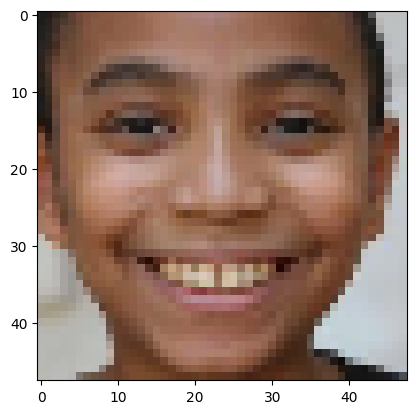

In [7]:
plt.imshow(images[87])

In [8]:
print(ages[87])

10


In [9]:
print(genders[87])

0


#step 5
saving images array,ages array,gender array in the system

In [10]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [11]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

#Plotting samples

In [13]:
#Finding the no of Male and Female samples respectively

In [12]:
values,counts=np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317]


In [19]:
#Plotting the no. of Male and Female samples

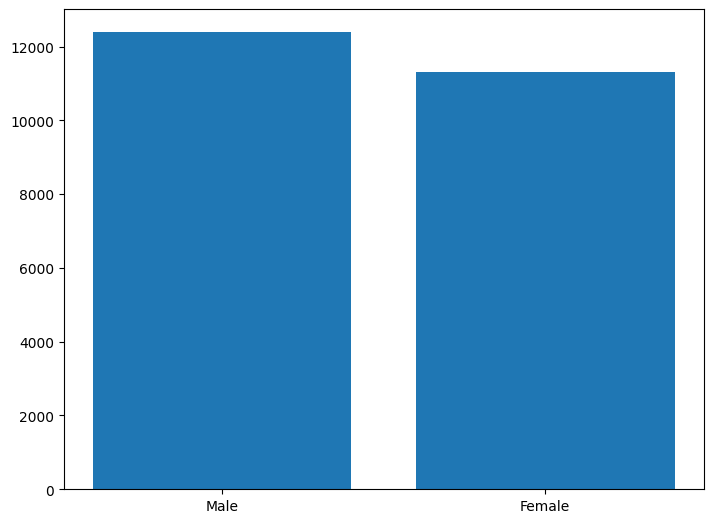

In [13]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[12391,11317]
ax.bar(gender,values)
plt.show()

In [14]:
#Finding the no of samples in each age
values,counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [ ]:

#converting Age Counts to lists

In [15]:
val=values.tolist()
cnt=counts.tolist()

In [ ]:
##Plotting the samples Agewise

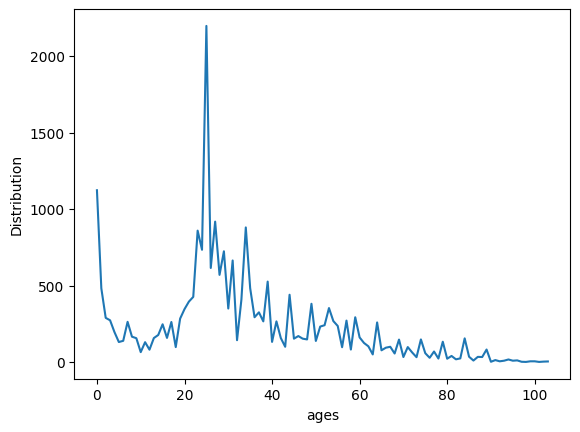

In [16]:
plt.plot(counts)
plt.xlabel('ages')
plt.ylabel('Distribution')
plt.show()

#Definig Labels for Output

In [ ]:
#Splitting The Date:-

In [17]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

In [ ]:
#Creating another list of images from existing one
#For better learning

In [18]:
images_f_2=images_f/255

In [19]:
images_f_2.shape

(23708, 48, 48, 3)

In [20]:
labels_f=np.array(labels)

##Splitting the Dataset into test and train

In [21]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [24]:
Y_train[0:5] 

array([[52,  0],
       [ 6,  1],
       [70,  0],
       [40,  1],
       [65,  0]])

#Splitting 'Y_test' and 'Y_train' further
#For better understanding

In [25]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [26]:
Y_train_2[0][0:5]

array([0, 1, 0, 1, 0])

In [27]:
Y_train_2[1][0:5]

array([52,  6, 70, 40, 65])

##Defining the Model

In [ ]:
#define model which will be convolutional model
#save file in h5 weight file and use in gui file

In [ ]:
#We define convolutional

In [28]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [29]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    flatten=Flatten()(maxp_4)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2=Dense(2,activation='relu',name='age_out')(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=["accuracy"])
    return model

In [30]:
Model=model((48,48,3))

In [31]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 48, 48, 32)           896       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 48, 48, 32)           0         ['conv2d[0][0]']              
                                                                                                  
 activation (Activation)     (None, 48, 48, 32)           0         ['dropout[0][0]']             
                                                                                              

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [33]:
fle_s='Age_Sex_Detection.h5'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

In [34]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=250,callbacks=callback_list)

Epoch 1/250


278/278 [==============================] - ETA: 0s - loss: 17.1638 - sex_out_loss: 0.6978 - age_out_loss: 16.2865 - sex_out_accuracy: 0.5222 - age_out_accuracy: 0.0233
Epoch 1: val_loss improved from inf to 17.18790, saving model to Age_Sex_Detection.h5


C:\Users\preet\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


278/278 [==============================] - 79s 265ms/step - loss: 17.1638 - sex_out_loss: 0.6978 - age_out_loss: 16.2865 - sex_out_accuracy: 0.5222 - age_out_accuracy: 0.0233 - val_loss: 17.1879 - val_sex_out_loss: 0.6927 - val_age_out_loss: 16.3427 - val_sex_out_accuracy: 0.5186 - val_age_out_accuracy: 0.0337
Epoch 2/250
278/278 [==============================] - ETA: 0s - loss: 15.2229 - sex_out_loss: 0.6911 - age_out_loss: 14.3715 - sex_out_accuracy: 0.5345 - age_out_accuracy: 0.0242
Epoch 2: val_loss improved from 17.18790 to 14.65225, saving model to Age_Sex_Detection.h5
278/278 [==============================] - 70s 250ms/step - loss: 15.2229 - sex_out_loss: 0.6911 - age_out_loss: 14.3715 - sex_out_accuracy: 0.5345 - age_out_accuracy: 0.0242 - val_loss: 14.6522 - val_sex_out_loss: 0.6722 - val_age_out_loss: 13.7909 - val_sex_out_accuracy: 0.6723 - val_age_out_accuracy: 0.0496
Epoch 3/250
278/278 [==============================] - ETA: 0s - loss: 12.6892 - sex_out_loss: 0.6607 - a

278/278 [==============================] - ETA: 0s - loss: 7.7634 - sex_out_loss: 0.3764 - age_out_loss: 6.9245 - sex_out_accuracy: 0.8393 - age_out_accuracy: 0.0061
Epoch 16: val_loss did not improve from 8.17399
278/278 [==============================] - 69s 248ms/step - loss: 7.7634 - sex_out_loss: 0.3764 - age_out_loss: 6.9245 - sex_out_accuracy: 0.8393 - age_out_accuracy: 0.0061 - val_loss: 10.2358 - val_sex_out_loss: 0.3358 - val_age_out_loss: 9.4329 - val_sex_out_accuracy: 0.8643 - val_age_out_accuracy: 0.0020
Epoch 17/250
278/278 [==============================] - ETA: 0s - loss: 7.6213 - sex_out_loss: 0.3529 - age_out_loss: 6.7947 - sex_out_accuracy: 0.8497 - age_out_accuracy: 0.0025
Epoch 17: val_loss did not improve from 8.17399
278/278 [==============================] - 69s 248ms/step - loss: 7.6213 - sex_out_loss: 0.3529 - age_out_loss: 6.7947 - sex_out_accuracy: 0.8497 - age_out_accuracy: 0.0025 - val_loss: 8.8815 - val_sex_out_loss: 0.3220 - val_age_out_loss: 8.0793 - va

278/278 [==============================] - ETA: 0s - loss: 6.7968 - sex_out_loss: 0.2594 - age_out_loss: 5.8904 - sex_out_accuracy: 0.8955 - age_out_accuracy: 0.0378
Epoch 31: val_loss improved from 7.79005 to 7.40866, saving model to Age_Sex_Detection.h5
278/278 [==============================] - 69s 248ms/step - loss: 6.7968 - sex_out_loss: 0.2594 - age_out_loss: 5.8904 - sex_out_accuracy: 0.8955 - age_out_accuracy: 0.0378 - val_loss: 7.4087 - val_sex_out_loss: 0.2561 - val_age_out_loss: 6.5022 - val_sex_out_accuracy: 0.8821 - val_age_out_accuracy: 0.0430
Epoch 32/250
278/278 [==============================] - ETA: 0s - loss: 6.6830 - sex_out_loss: 0.2612 - age_out_loss: 5.7667 - sex_out_accuracy: 0.8938 - age_out_accuracy: 0.0350
Epoch 32: val_loss did not improve from 7.40866
278/278 [==============================] - 84s 304ms/step - loss: 6.6830 - sex_out_loss: 0.2612 - age_out_loss: 5.7667 - sex_out_accuracy: 0.8938 - age_out_accuracy: 0.0350 - val_loss: 8.0822 - val_sex_out_los

278/278 [==============================] - ETA: 0s - loss: 6.4120 - sex_out_loss: 0.2277 - age_out_loss: 5.4110 - sex_out_accuracy: 0.9062 - age_out_accuracy: 0.0449
Epoch 46: val_loss did not improve from 7.40866
278/278 [==============================] - 45s 163ms/step - loss: 6.4120 - sex_out_loss: 0.2277 - age_out_loss: 5.4110 - sex_out_accuracy: 0.9062 - age_out_accuracy: 0.0449 - val_loss: 7.9591 - val_sex_out_loss: 0.2526 - val_age_out_loss: 6.9288 - val_sex_out_accuracy: 0.8851 - val_age_out_accuracy: 0.0506
Epoch 47/250
278/278 [==============================] - ETA: 0s - loss: 6.3735 - sex_out_loss: 0.2243 - age_out_loss: 5.3673 - sex_out_accuracy: 0.9083 - age_out_accuracy: 0.0457
Epoch 47: val_loss did not improve from 7.40866
278/278 [==============================] - 47s 168ms/step - loss: 6.3735 - sex_out_loss: 0.2243 - age_out_loss: 5.3673 - sex_out_accuracy: 0.9083 - age_out_accuracy: 0.0457 - val_loss: 9.2760 - val_sex_out_loss: 0.2624 - val_age_out_loss: 8.2279 - val

278/278 [==============================] - ETA: 0s - loss: 5.9943 - sex_out_loss: 0.2076 - age_out_loss: 4.9199 - sex_out_accuracy: 0.9164 - age_out_accuracy: 0.0142
Epoch 61: val_loss did not improve from 7.40866
278/278 [==============================] - 47s 169ms/step - loss: 5.9943 - sex_out_loss: 0.2076 - age_out_loss: 4.9199 - sex_out_accuracy: 0.9164 - age_out_accuracy: 0.0142 - val_loss: 7.7499 - val_sex_out_loss: 0.2524 - val_age_out_loss: 6.6278 - val_sex_out_accuracy: 0.8903 - val_age_out_accuracy: 0.0504
Epoch 62/250
278/278 [==============================] - ETA: 0s - loss: 6.1497 - sex_out_loss: 0.1978 - age_out_loss: 5.0795 - sex_out_accuracy: 0.9182 - age_out_accuracy: 0.0432
Epoch 62: val_loss did not improve from 7.40866
278/278 [==============================] - 47s 169ms/step - loss: 6.1497 - sex_out_loss: 0.1978 - age_out_loss: 5.0795 - sex_out_accuracy: 0.9182 - age_out_accuracy: 0.0432 - val_loss: 8.0316 - val_sex_out_loss: 0.2713 - val_age_out_loss: 6.8855 - val

278/278 [==============================] - 47s 168ms/step - loss: 6.0229 - sex_out_loss: 0.1881 - age_out_loss: 4.9092 - sex_out_accuracy: 0.9263 - age_out_accuracy: 0.0281 - val_loss: 8.1562 - val_sex_out_loss: 0.2574 - val_age_out_loss: 6.9702 - val_sex_out_accuracy: 0.8853 - val_age_out_accuracy: 3.3744e-04
Epoch 77/250
278/278 [==============================] - ETA: 0s - loss: 5.9318 - sex_out_loss: 0.1999 - age_out_loss: 4.8015 - sex_out_accuracy: 0.9190 - age_out_accuracy: 0.0123
Epoch 77: val_loss did not improve from 7.40866
278/278 [==============================] - 48s 172ms/step - loss: 5.9318 - sex_out_loss: 0.1999 - age_out_loss: 4.8015 - sex_out_accuracy: 0.9190 - age_out_accuracy: 0.0123 - val_loss: 8.1086 - val_sex_out_loss: 0.2566 - val_age_out_loss: 6.9204 - val_sex_out_accuracy: 0.8917 - val_age_out_accuracy: 0.0000e+00
Epoch 78/250
278/278 [==============================] - ETA: 0s - loss: 5.9684 - sex_out_loss: 0.1919 - age_out_loss: 4.8433 - sex_out_accuracy: 0.92

Epoch 92/250
278/278 [==============================] - ETA: 0s - loss: 5.8912 - sex_out_loss: 0.1803 - age_out_loss: 4.7430 - sex_out_accuracy: 0.9295 - age_out_accuracy: 0.0190
Epoch 92: val_loss did not improve from 7.40866
278/278 [==============================] - 56s 202ms/step - loss: 5.8912 - sex_out_loss: 0.1803 - age_out_loss: 4.7430 - sex_out_accuracy: 0.9295 - age_out_accuracy: 0.0190 - val_loss: 8.2187 - val_sex_out_loss: 0.2640 - val_age_out_loss: 6.9864 - val_sex_out_accuracy: 0.8897 - val_age_out_accuracy: 0.0506
Epoch 93/250
278/278 [==============================] - ETA: 0s - loss: 5.8983 - sex_out_loss: 0.1811 - age_out_loss: 4.7479 - sex_out_accuracy: 0.9262 - age_out_accuracy: 0.0405
Epoch 93: val_loss did not improve from 7.40866
278/278 [==============================] - 51s 183ms/step - loss: 5.8983 - sex_out_loss: 0.1811 - age_out_loss: 4.7479 - sex_out_accuracy: 0.9262 - age_out_accuracy: 0.0405 - val_loss: 8.2131 - val_sex_out_loss: 0.2801 - val_age_out_loss:

In [ ]:
#Plotting Results

In [35]:
Model.evaluate(X_test,Y_test_2)

186/186 [==============================] - 4s 23ms/step - loss: 7.4087 - sex_out_loss: 0.2561 - age_out_loss: 6.5022 - sex_out_accuracy: 0.8821 - age_out_accuracy: 0.0430


[7.408657550811768,
 0.2561046779155731,
 6.502196788787842,
 0.8820651173591614,
 0.043023452162742615]

In [138]:
pred=Model.predict(X_test)

186/186 [==============================] - 7s 37ms/step


In [105]:
pred[1]

array([[38.222466, 38.2471  ],
       [14.925672, 14.931429],
       [64.08376 , 64.12616 ],
       ...,
       [46.110657, 46.1398  ],
       [22.095613, 22.113605],
       [27.745035, 27.765263]], dtype=float32)

In [140]:
pred[1].flatten()

array([ 8.012214,  8.008204, 33.085865, ..., 53.958275, 43.723045,
       43.750015], dtype=float32)

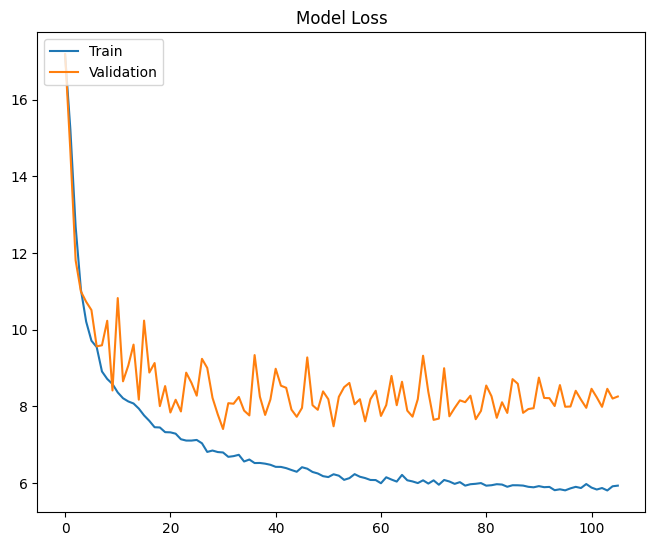

In [141]:
#plot model for accuracy and loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

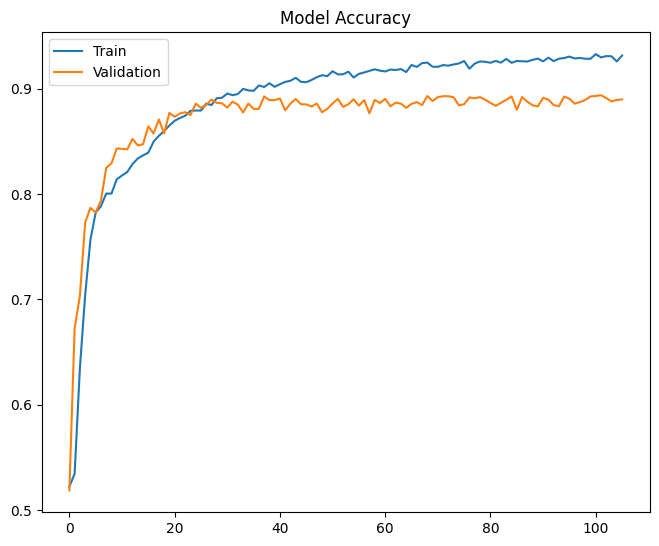

In [142]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

In [143]:
#90 % is decent model (validation)

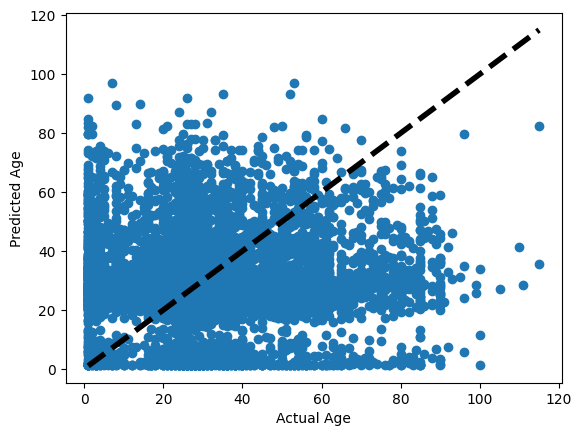

In [218]:

# Assuming Y_test_2 and pred are numpy arrays or lists
actual_values = Y_test_2[1]
predicted_values = pred[1].flatten()

# Make sure both arrays have the same length
min_length = min(len(actual_values), len(predicted_values))
actual_values = actual_values[:min_length]
predicted_values = predicted_values[:min_length]

# Create a scatter plot
fig, ax = plt.subplots()
ax.scatter(actual_values, predicted_values)
ax.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'k--', lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

#Making report of the Model (Gender Only)

In [145]:
i=0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1

C:\Users\preet\AppData\Local\Temp\ipykernel_12784\4197083195.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Pred_l.append(int(np.round(pred[0][i])))


In [146]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [147]:
report=classification_report(Y_test_2[0],Pred_l)

In [211]:
print(report) #gender only because it gives best result

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      3074
           1       0.88      0.87      0.88      2853

    accuracy                           0.88      5927
   macro avg       0.88      0.88      0.88      5927
weighted avg       0.88      0.88      0.88      5927



#Making Heatmap of the Model(Gender Only)

In [149]:
results=confusion_matrix(Y_test_2[0],Pred_l)

In [151]:
#seaborn install

<Axes: >

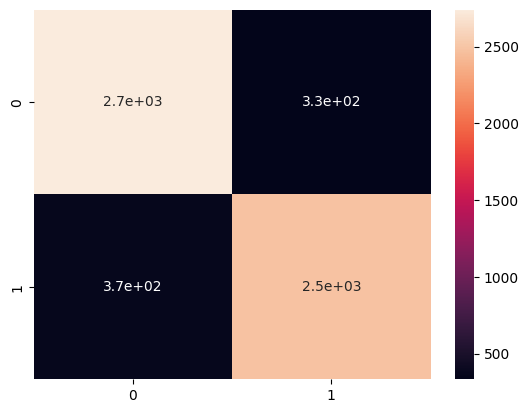

In [152]:
import seaborn as sns
sns.heatmap(results,annot=True)

#Testing The Images Ourself

In [212]:
def test_image(ind, images_f, images_f_2, Model):
    plt.imshow(images_f[ind])

    image_test = images_f_2[ind]
    pred_l = Model.predict(np.array([image_test]))
    sex_f = ['Male', 'Female']

    age= int(np.round(pred_l[1][0, 0]))
    sex= int(np.round(pred_l[0][0, 0]))

    print(f"Predicted Age is {age}")
    print(f"Predicted Gender is {sex_f[sex]}")

In [187]:
#test for images

In [188]:
#Test 1

1/1 [==============================] - 0s 63ms/step
Predicted Age is 91
Predicted Gender is Female


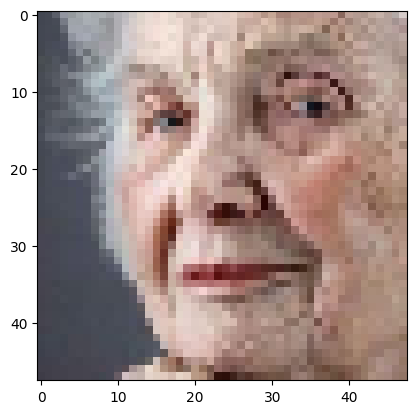

In [213]:
test_image(4,images_f,images_f_2,Model)


In [190]:
#Test 2

1/1 [==============================] - 0s 63ms/step
Predicted Age is 7
Predicted Gender is Male


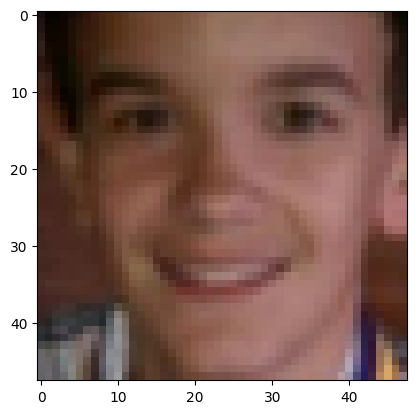

In [214]:
test_image(23,images_f,images_f_2,Model)

In [192]:
#Test 3

1/1 [==============================] - 0s 78ms/step
Predicted Age is 14
Predicted Gender is Female


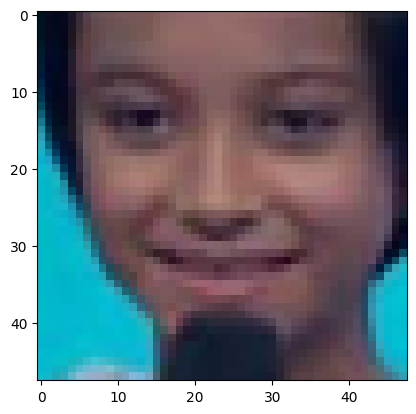

In [215]:
test_image(168,images_f,images_f_2,Model)

In [194]:
#Test 4 Error in age in this case

1/1 [==============================] - 0s 62ms/step
Predicted Age is 26
Predicted Gender is Male


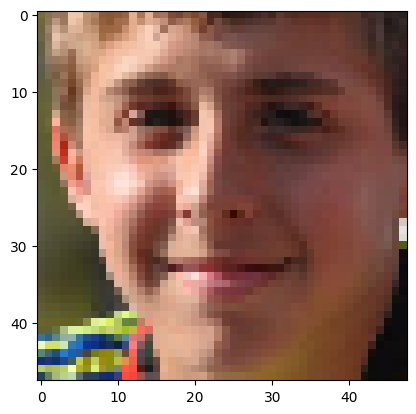

In [216]:
test_image(888,images_f,images_f_2,Model) #drawback

In [182]:
#Test 5

1/1 [==============================] - 0s 47ms/step
Predicted Age is 24
Predicted Gender is Female


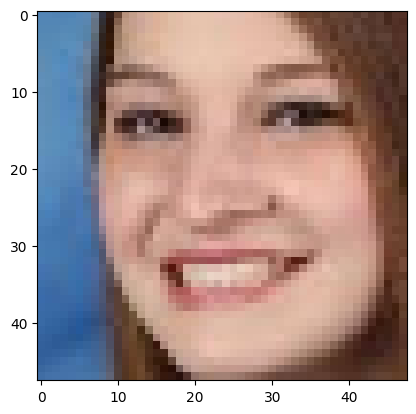

In [217]:
test_image(1288,images_f,images_f_2,Model)